<a href="https://colab.research.google.com/github/rivanachristie/Exploratory-Analysis-of-COVID-19-Data/blob/main/Exploratory_Analysis_of_COVID_19_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%matplotlib inline

In [2]:
# Creating a dataframe from the csv file containing COVID-19 data provided by JHU
url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
covid19_data = pd.read_csv(url)

In [3]:
# Converting the Date column to a datetime type
covid19_data['Date'] = pd.to_datetime(covid19_data['Date'])

# Filling blank or NaN values as 0
covid19_data['Recovered'] = covid19_data['Recovered'].fillna(0)
covid19_data['Confirmed'] = covid19_data['Confirmed'].fillna(0)
covid19_data['Deaths'] = covid19_data['Deaths'].fillna(0)

# Converting the datatype to int
covid19_data['Recovered'] = covid19_data['Recovered'].astype('int64')
covid19_data['Confirmed'] = covid19_data['Confirmed'].astype('int64')
covid19_data['Deaths'] = covid19_data['Deaths'].astype('int64')

In [4]:
# Single Time-series for each country
covid19_data_grouped = covid19_data.groupby(['Country/Region', 'Date']).sum()
print('Time-series for each country:')
print(covid19_data_grouped)
print()

# Grouping the raw data to get the data for the last reported day
latest_day = covid19_data_grouped.groupby('Country/Region').max()

# Confirmed cases and deaths for each country in the last reported day
print('Confirmed cases and deaths in each country:')
confirmed_cases = latest_day[['Confirmed', 'Deaths']].sort_values('Confirmed', ascending=False)
print(confirmed_cases)

Time-series for each country:
                           Confirmed  Recovered  Deaths
Country/Region Date                                    
Afghanistan    2020-01-22          0          0       0
               2020-01-23          0          0       0
               2020-01-24          0          0       0
               2020-01-25          0          0       0
               2020-01-26          0          0       0
...                              ...        ...     ...
Zimbabwe       2022-04-12     247094          0    5460
               2022-04-13     247160          0    5460
               2022-04-14     247208          0    5462
               2022-04-15     247237          0    5462
               2022-04-16     247237          0    5462

[161568 rows x 3 columns]

Confirmed cases and deaths in each country:
                  Confirmed  Deaths
Country/Region                     
US                 80625120  988609
India              43042097  521751
Brazil             3025007

<ipython-input-4-bb04d4e4293e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid19_data_grouped = covid19_data.groupby(['Country/Region', 'Date']).sum()


In [5]:
# Top 10 countries with highest number of confirmed cases
print('Top 10 countries with highest number of confirmed cases:')
print(latest_day.nlargest(10, 'Confirmed')['Confirmed'])

Top 10 countries with highest number of confirmed cases:
Country/Region
US                80625120
India             43042097
Brazil            30250077
France            27874269
Germany           23416663
United Kingdom    21916961
Russia            17801103
Korea, South      16305752
Italy             15659835
Turkey            14991669
Name: Confirmed, dtype: int64


In [6]:
# Top 10 countries with highest number of deaths
print('Top 10 countries with highest number of deaths:')
print(latest_day.nlargest(10, 'Deaths')['Deaths'])

Top 10 countries with highest number of deaths:
Country/Region
US                988609
Brazil            662185
India             521751
Russia            365774
Mexico            323938
Peru              212619
United Kingdom    172014
Italy             161602
Indonesia         155844
France            145159
Name: Deaths, dtype: int64


<ipython-input-7-d35b6fd3a798>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-7-d35b6fd3a798>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-7-d35b6fd3a798>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-7-d35b6fd3a798>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-7-d35b6fd3a798>:11: MatplotlibDeprecationWarning: Auto-removal of

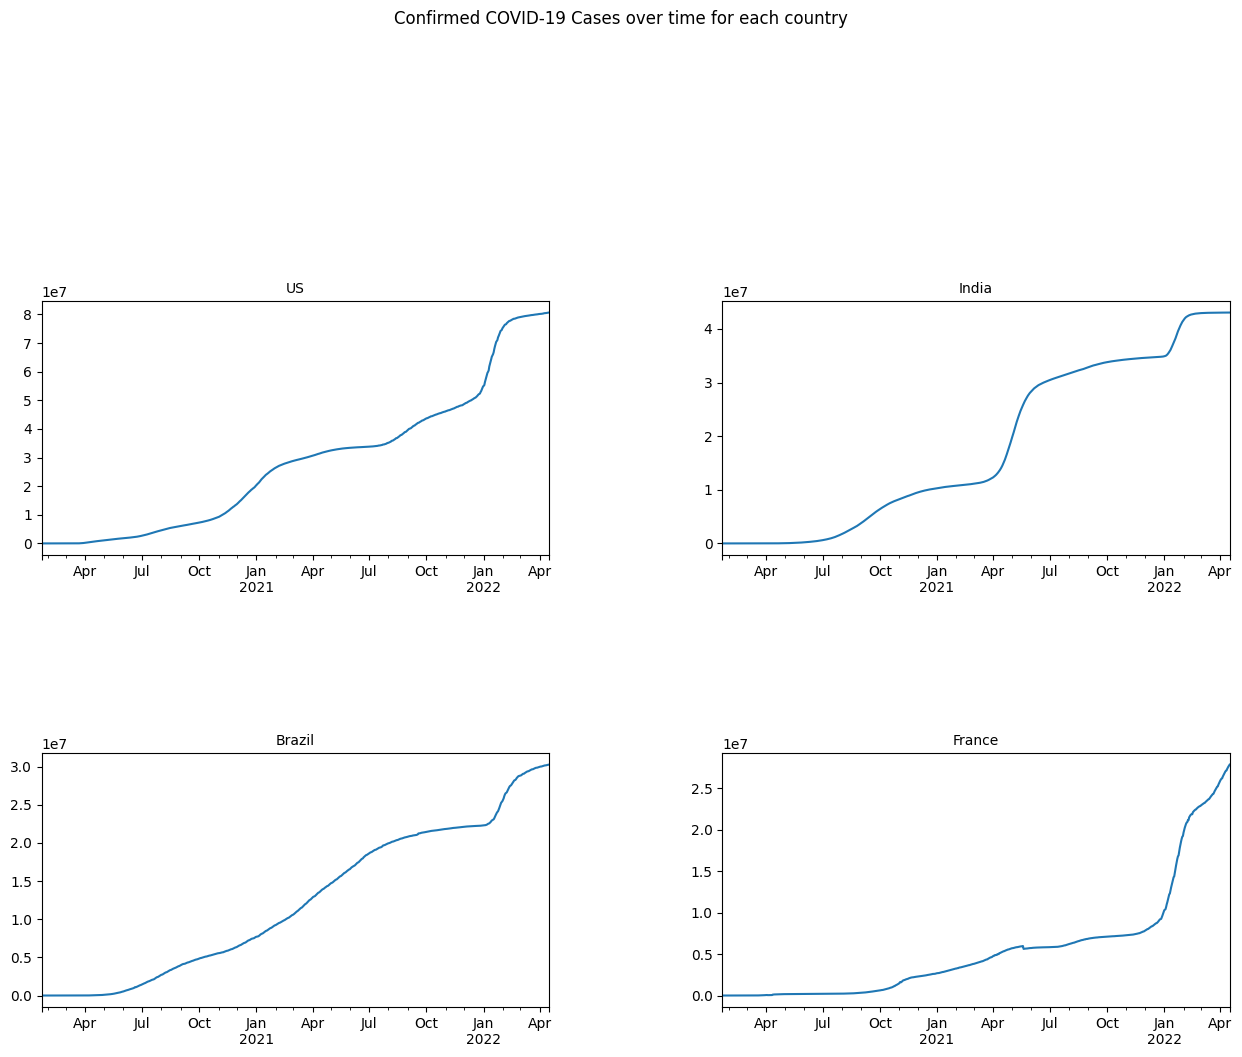

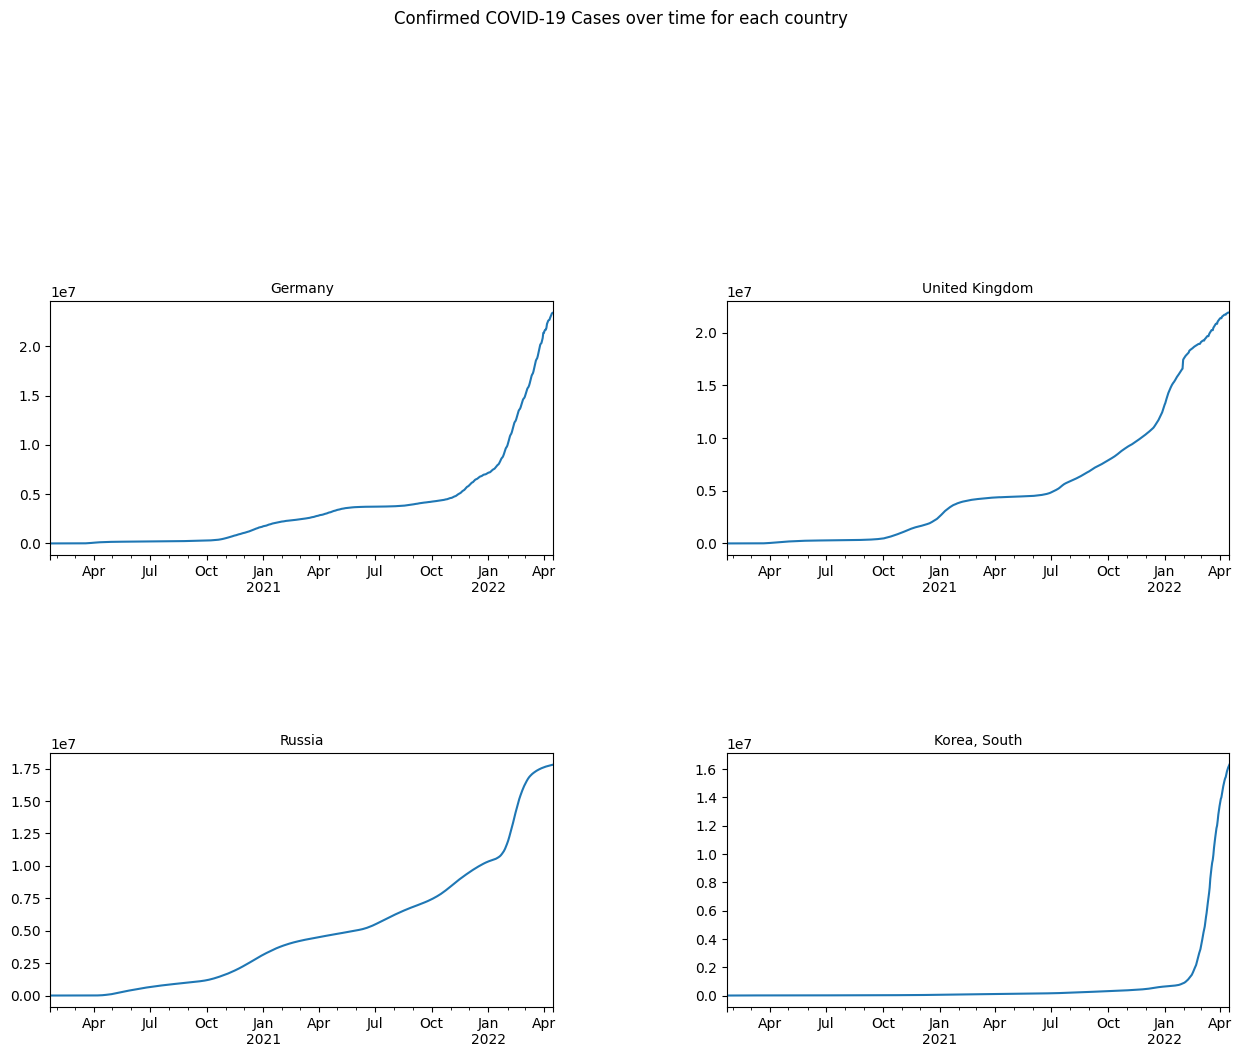

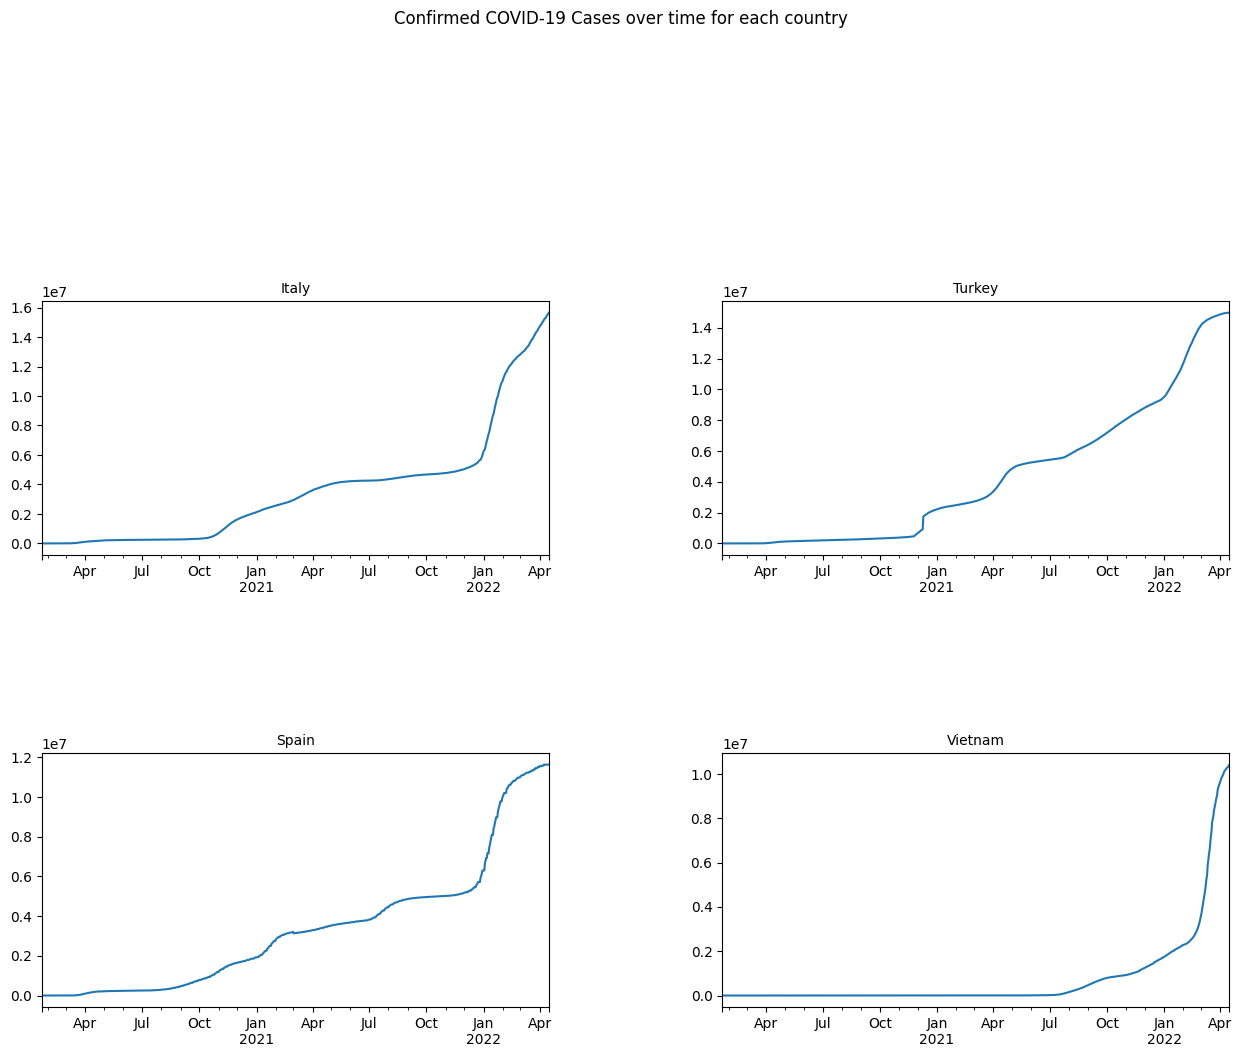

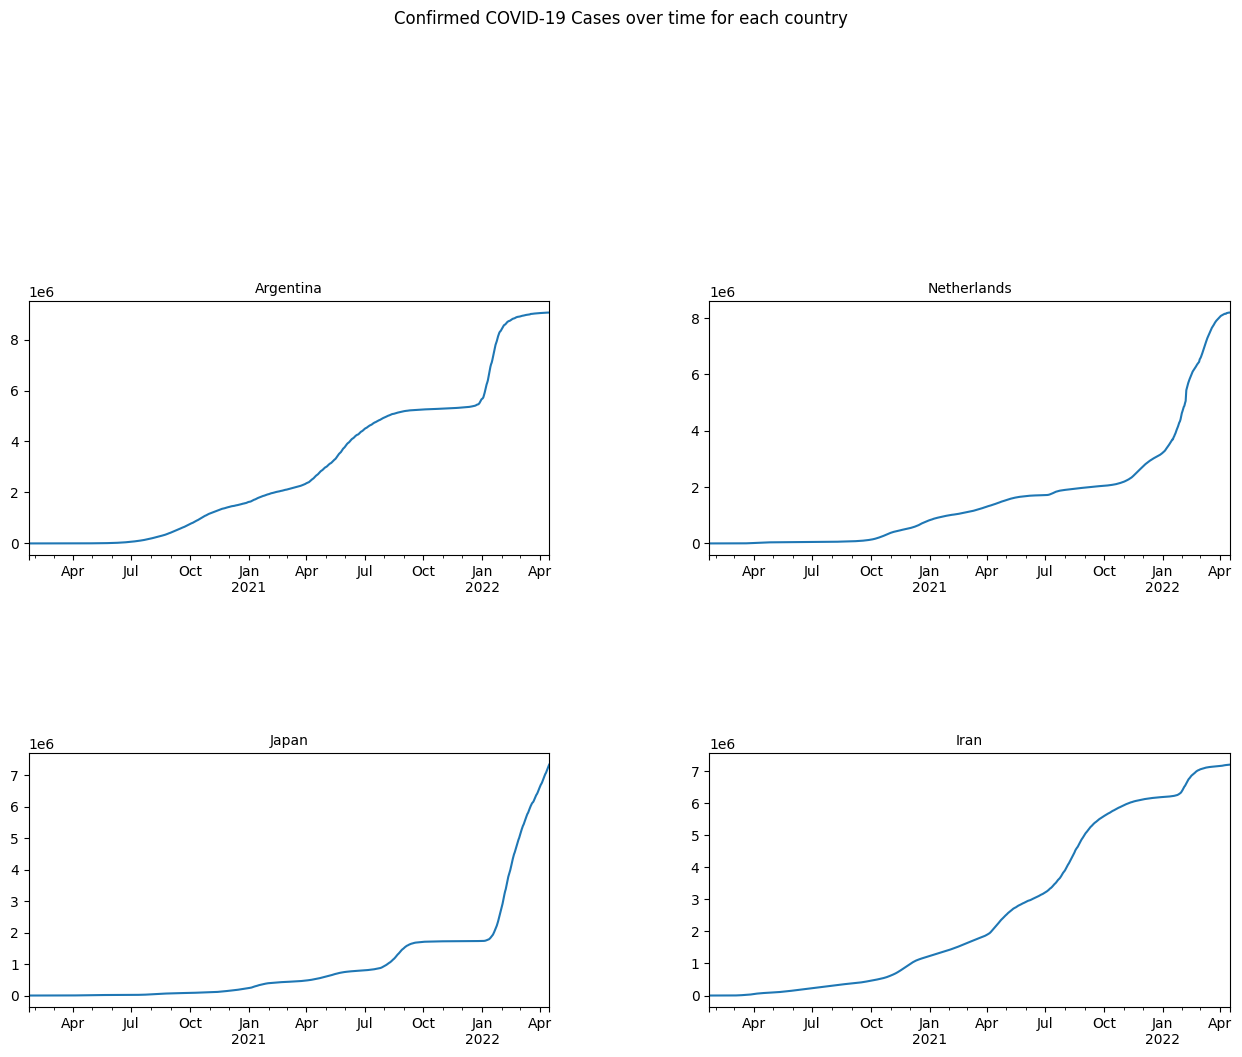

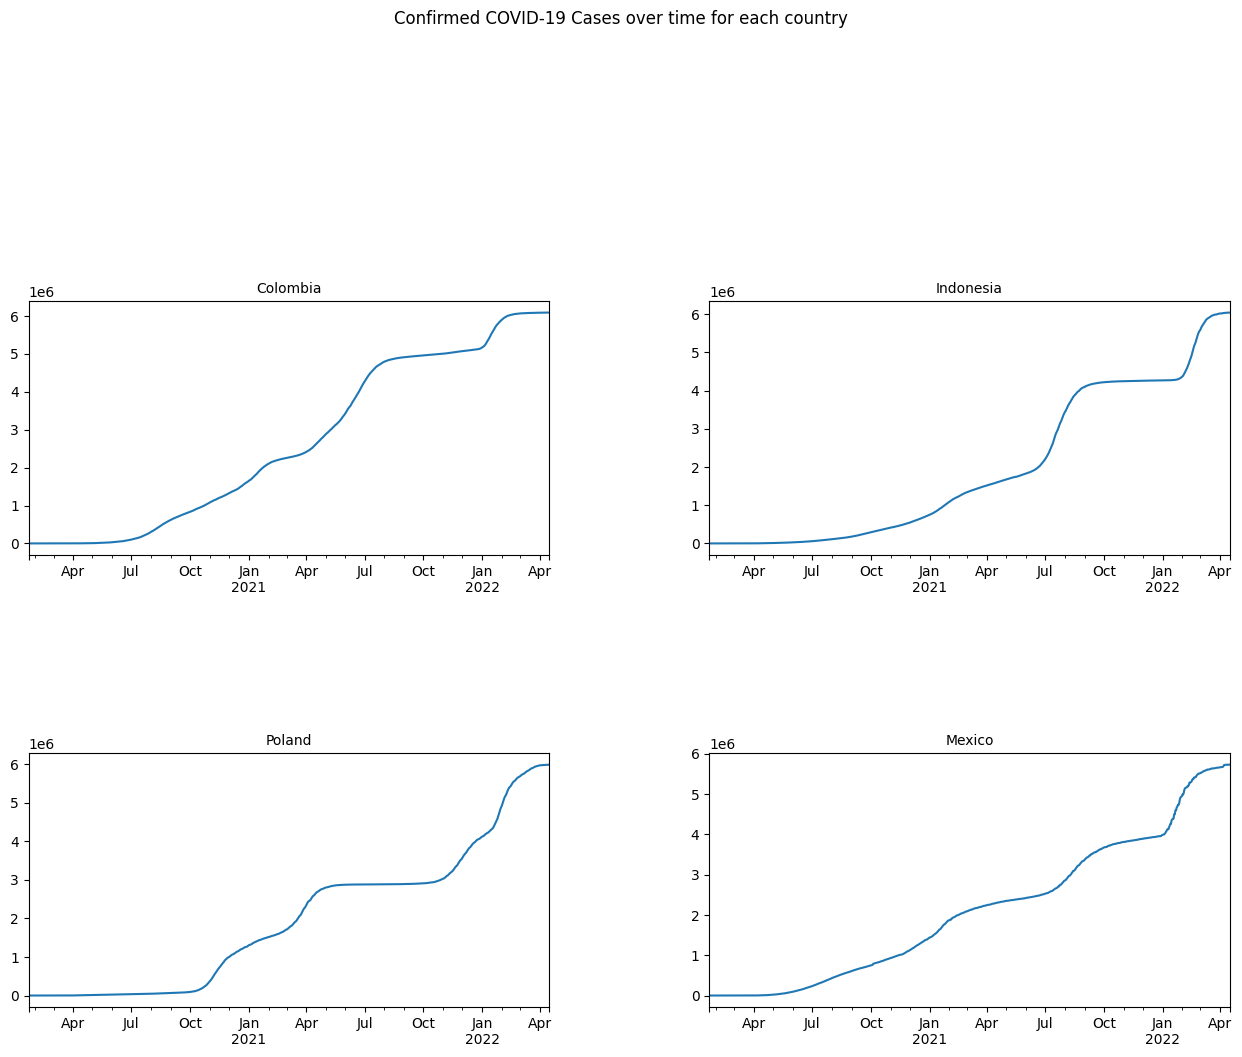

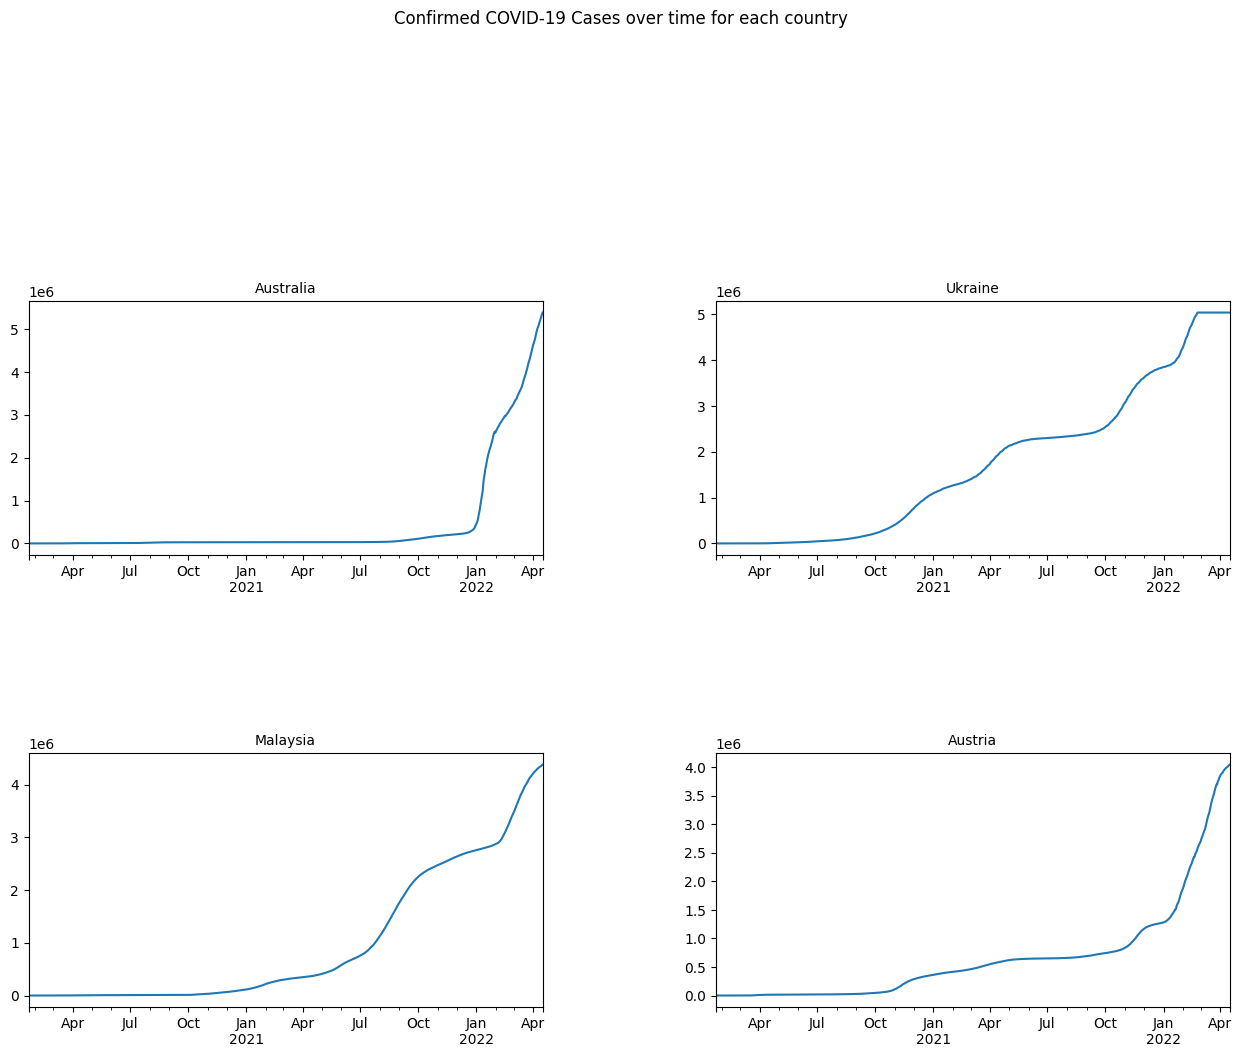

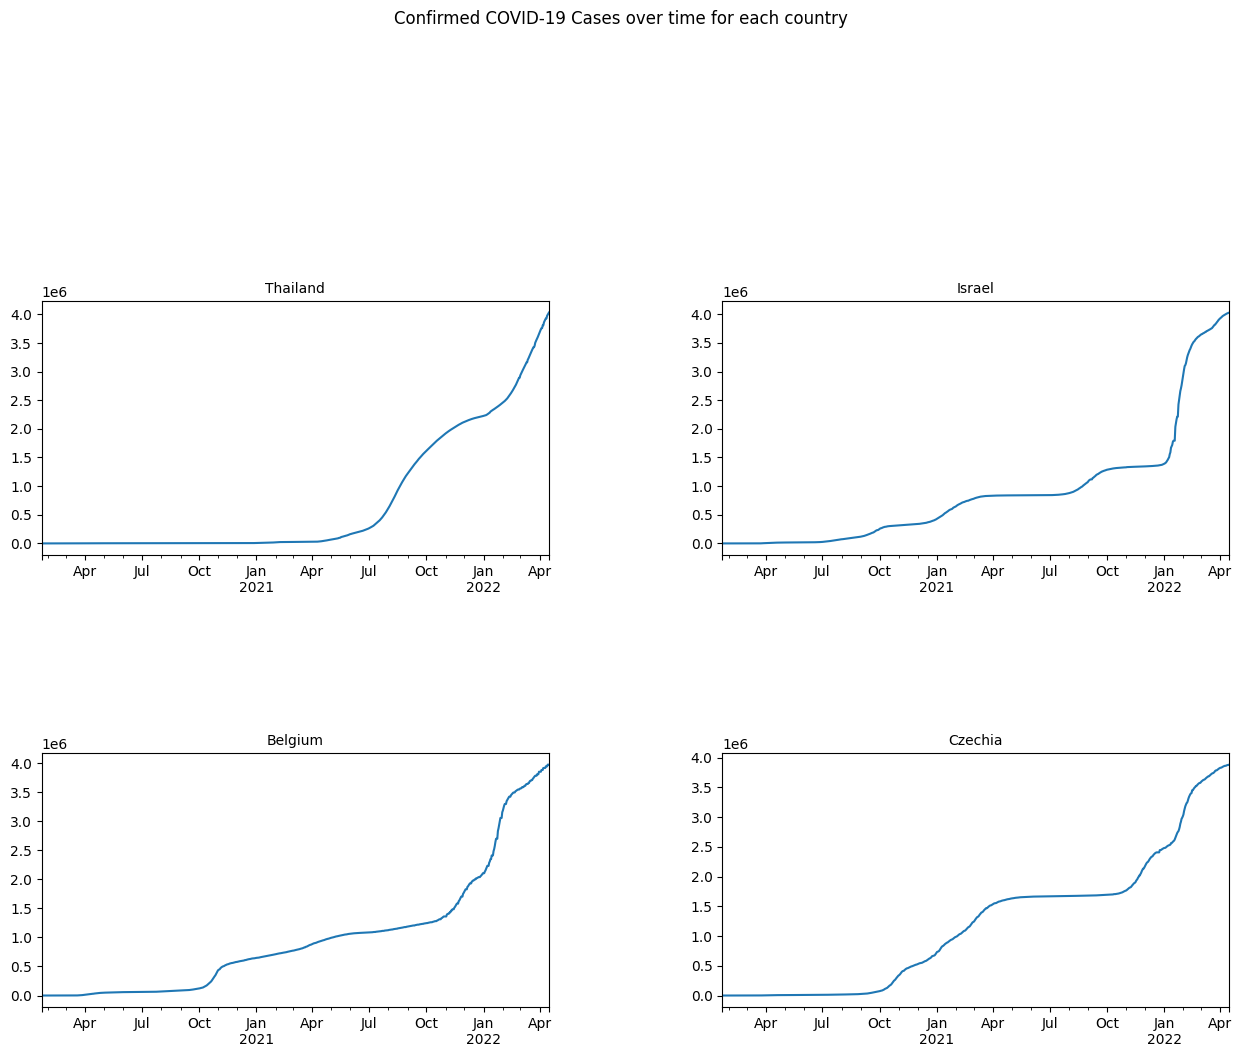

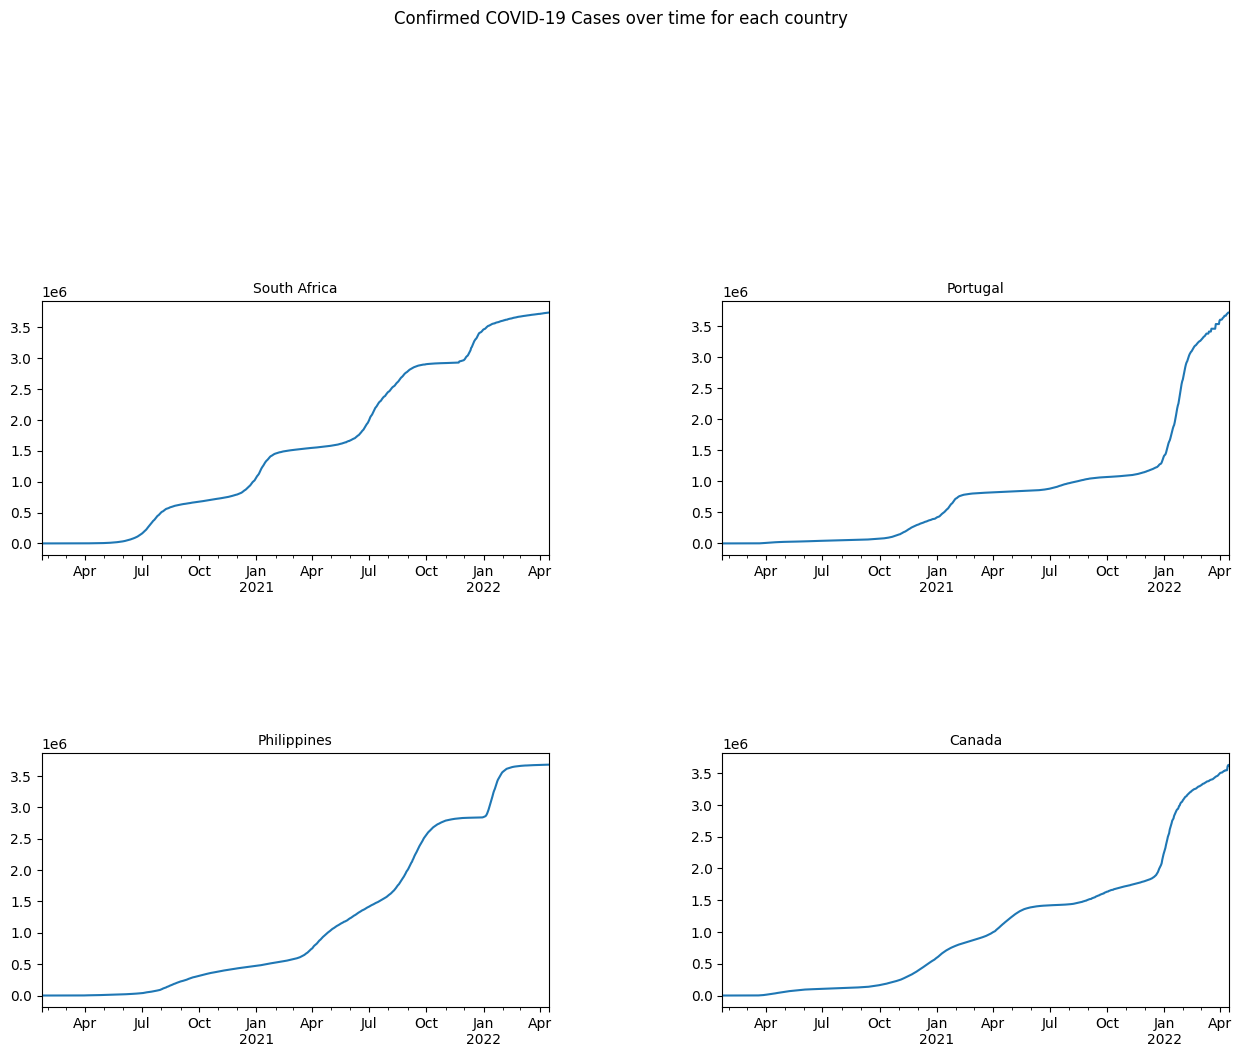

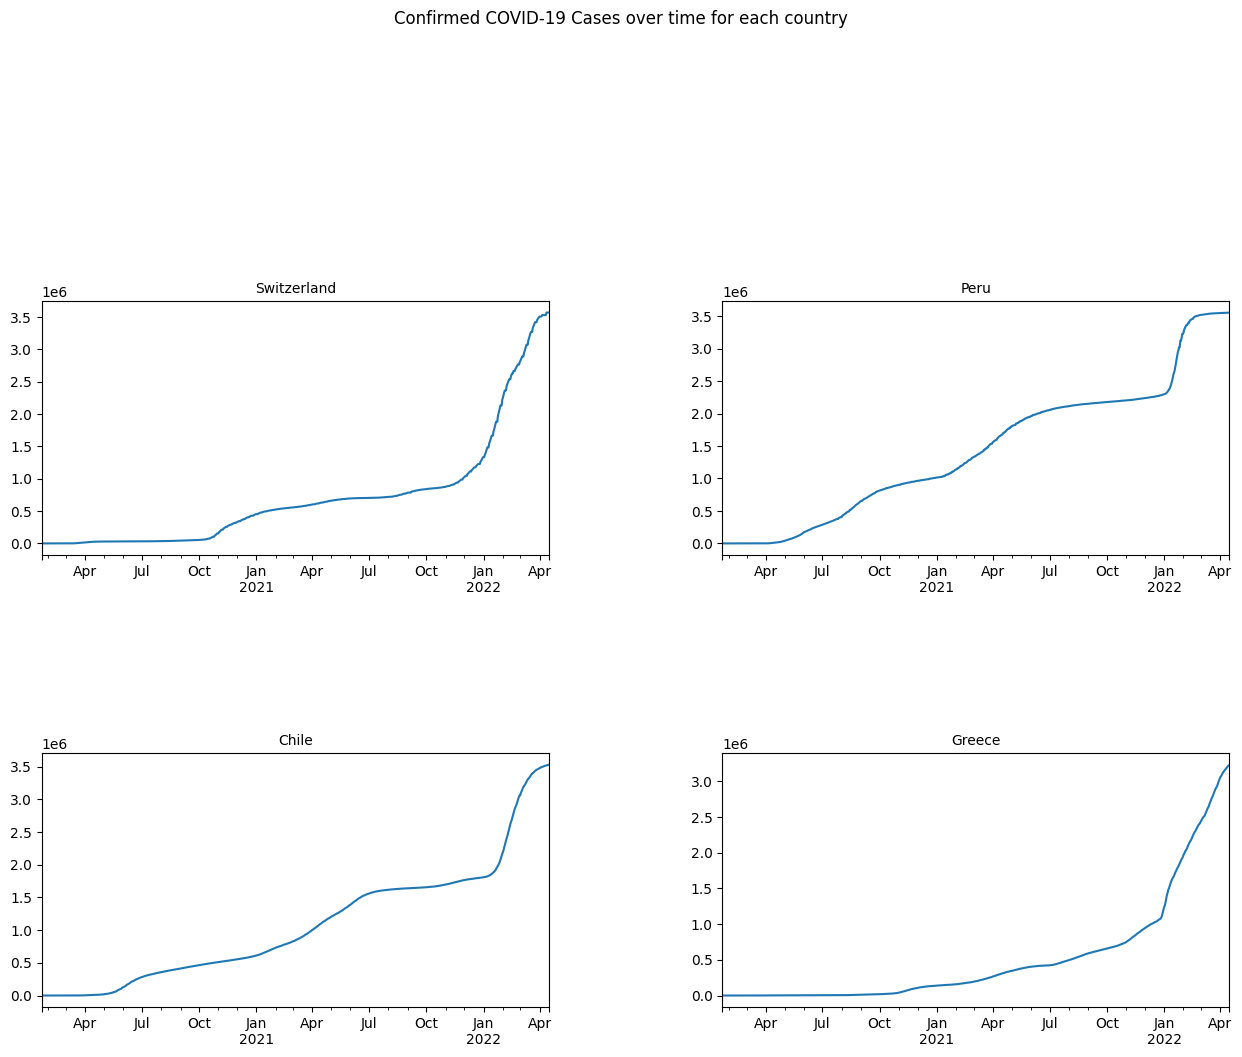

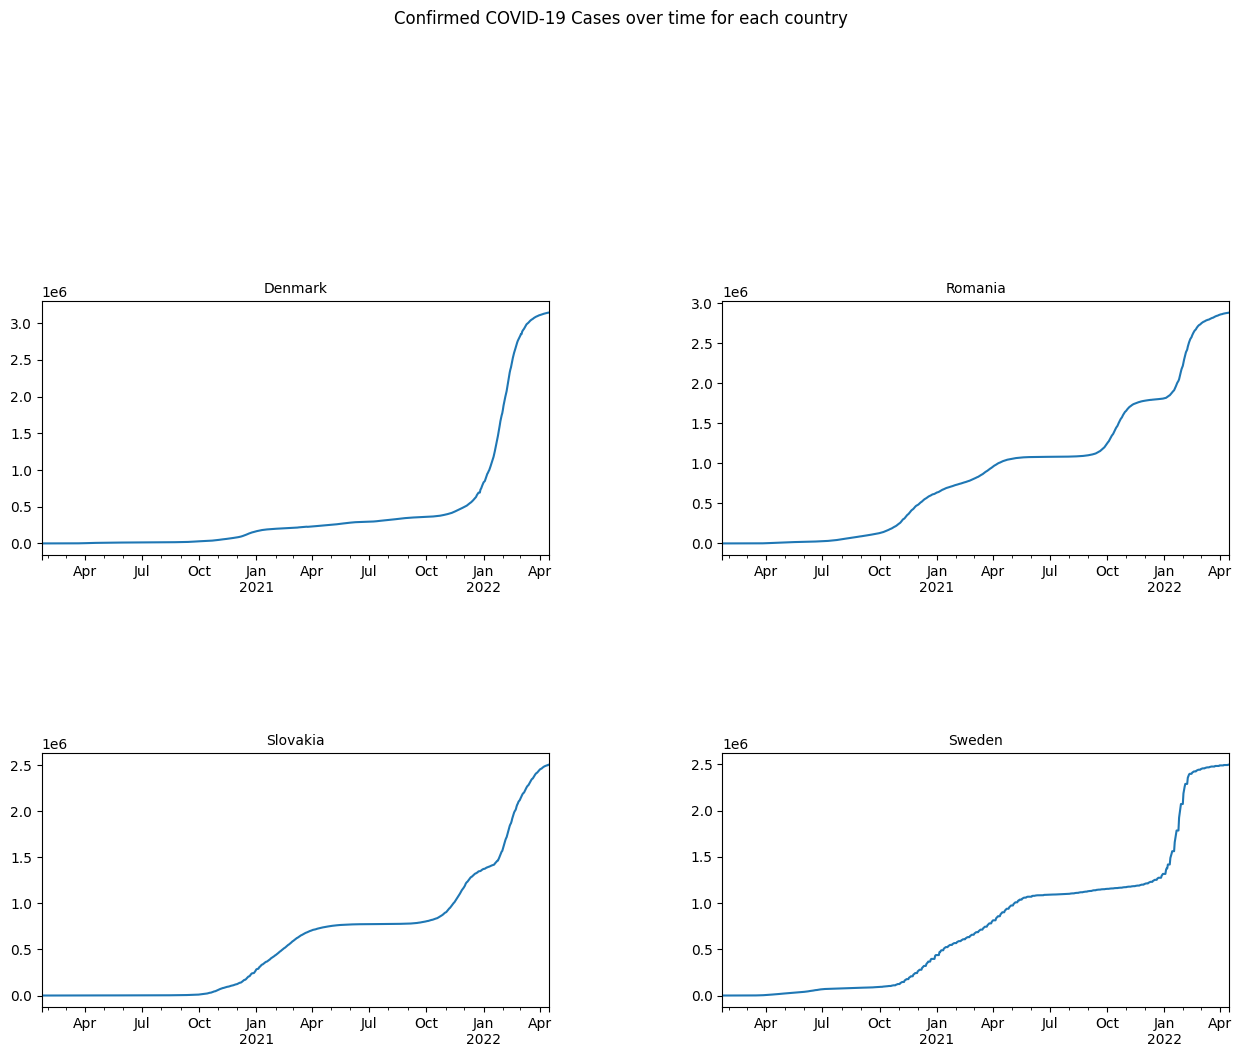

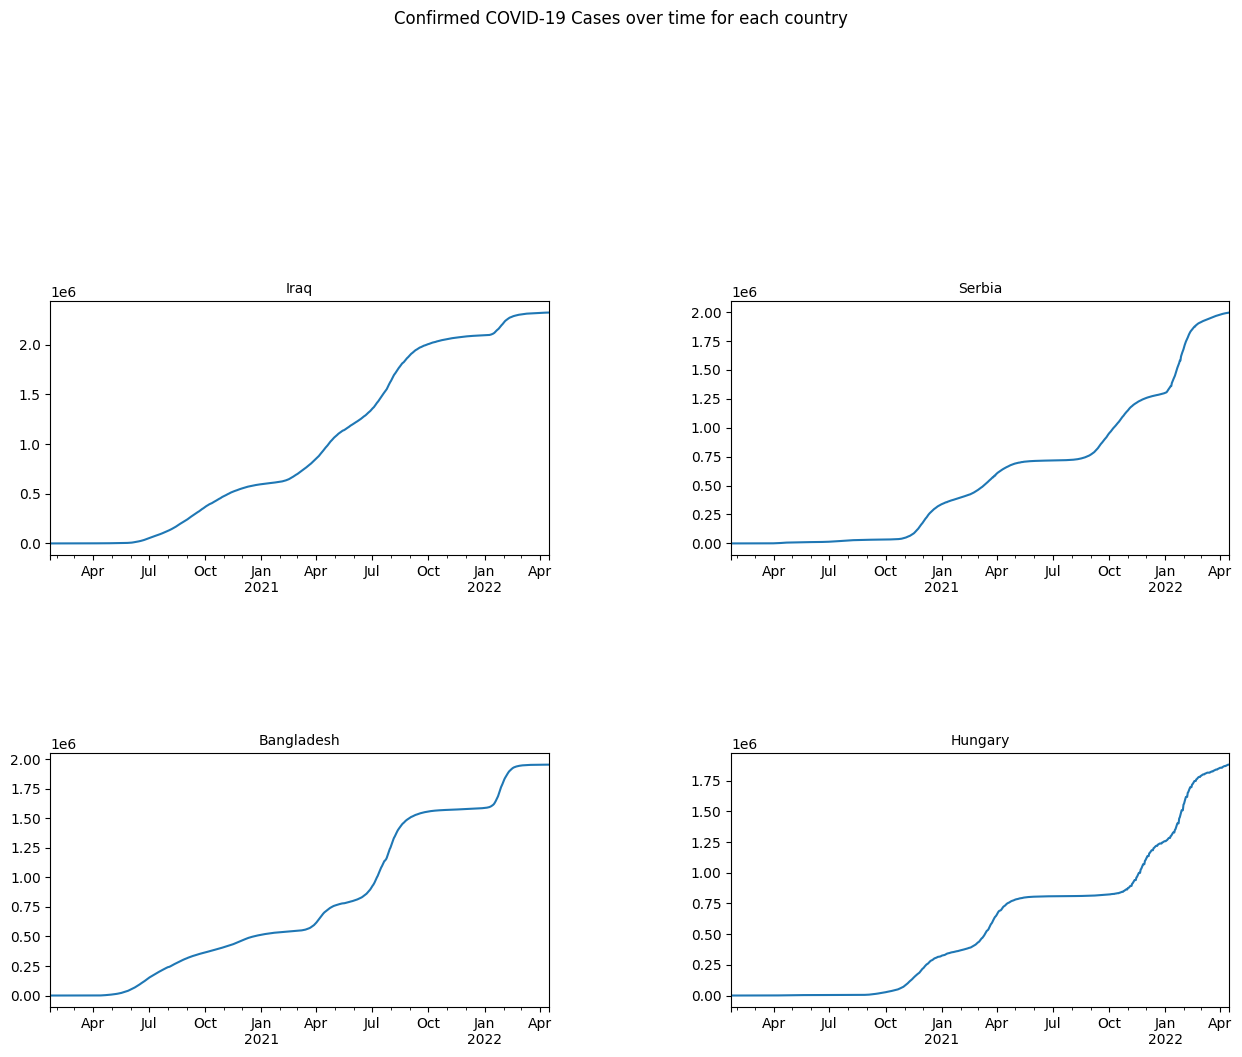

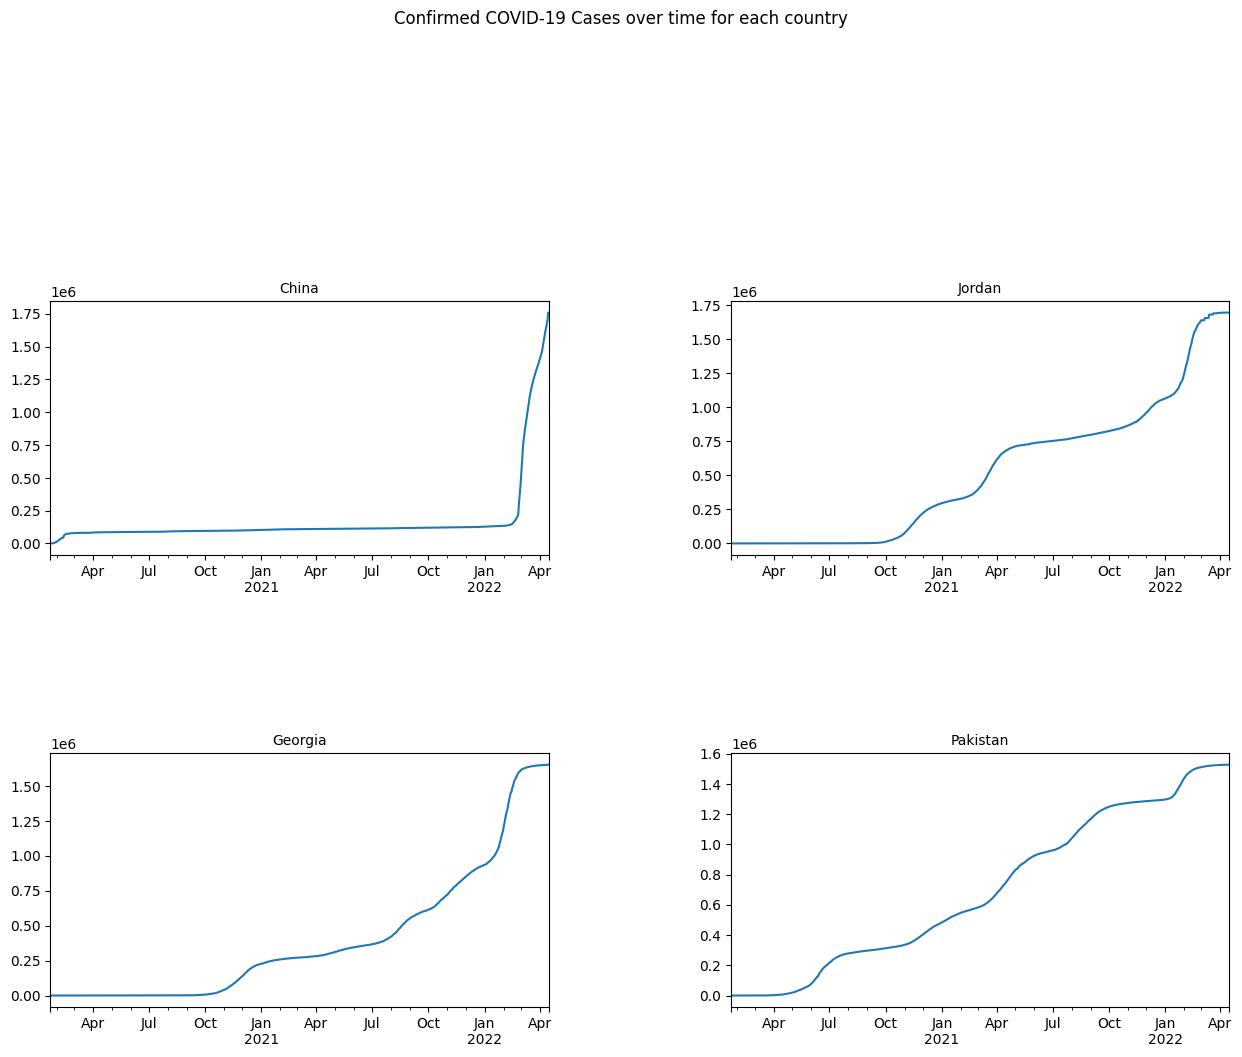

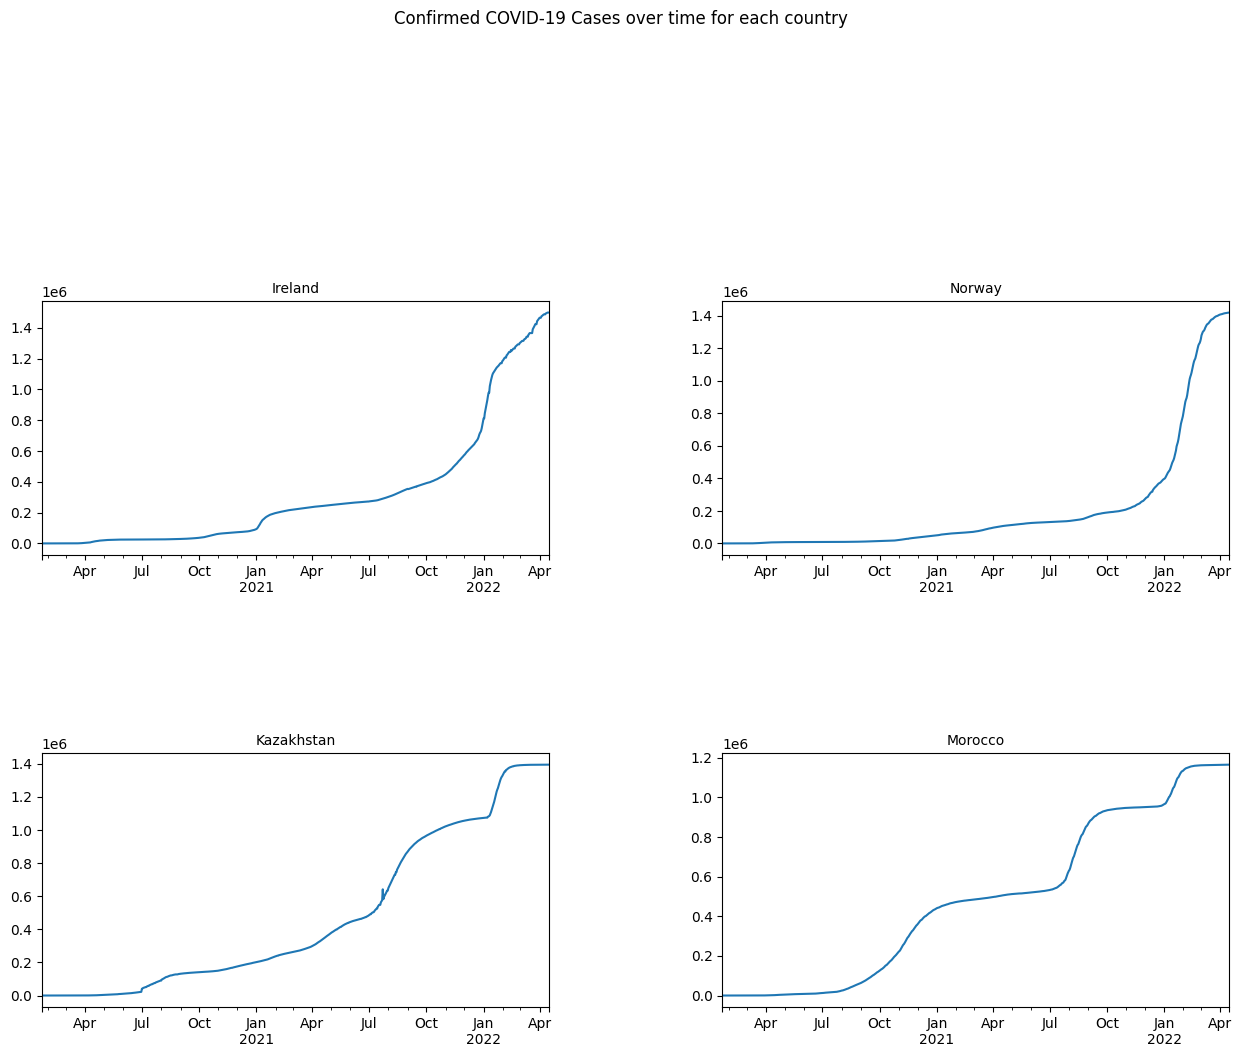

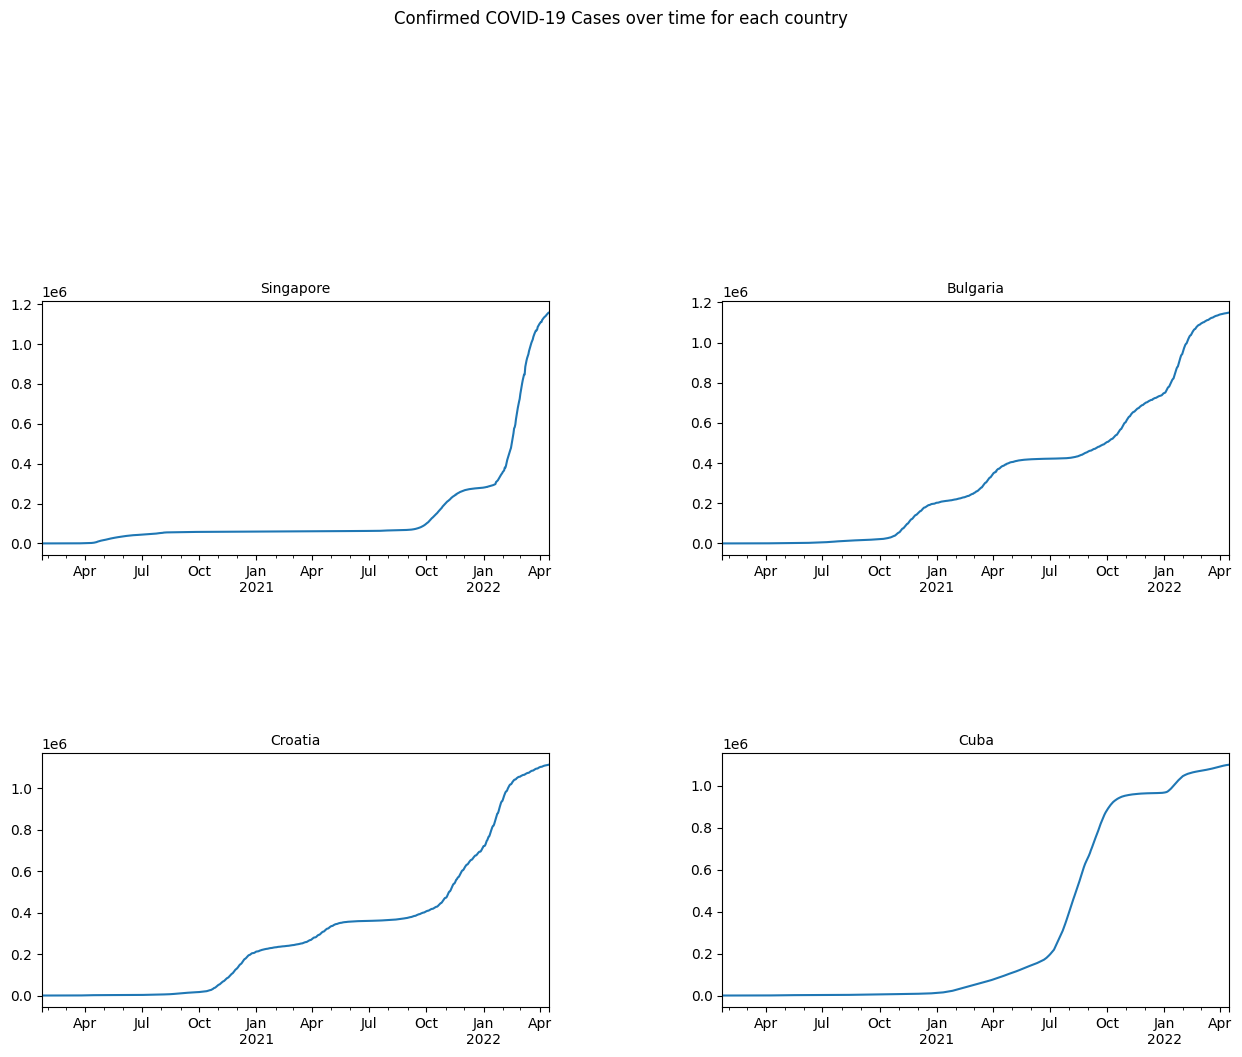

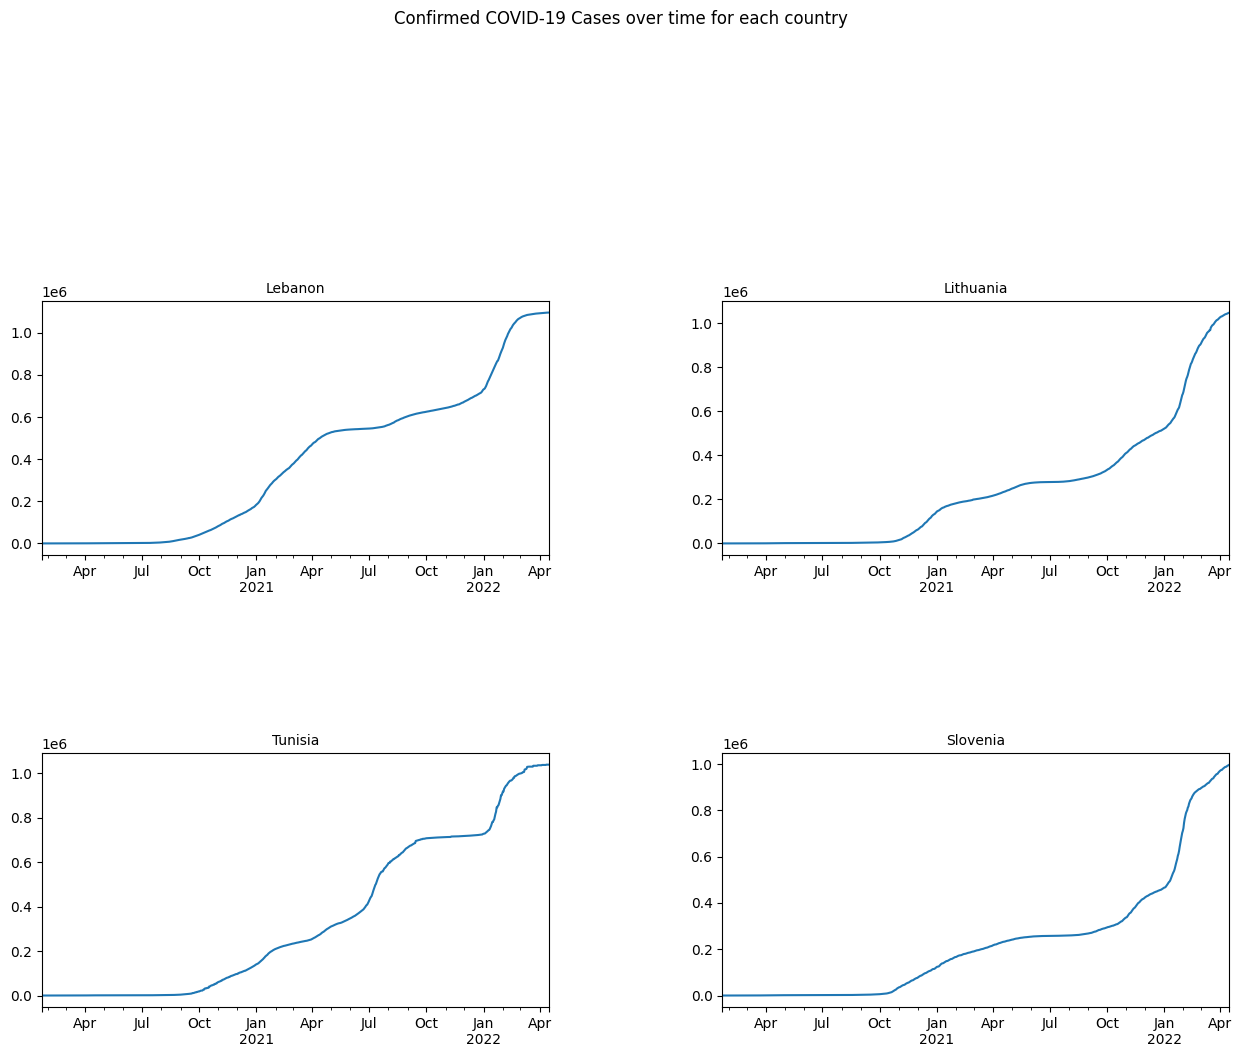

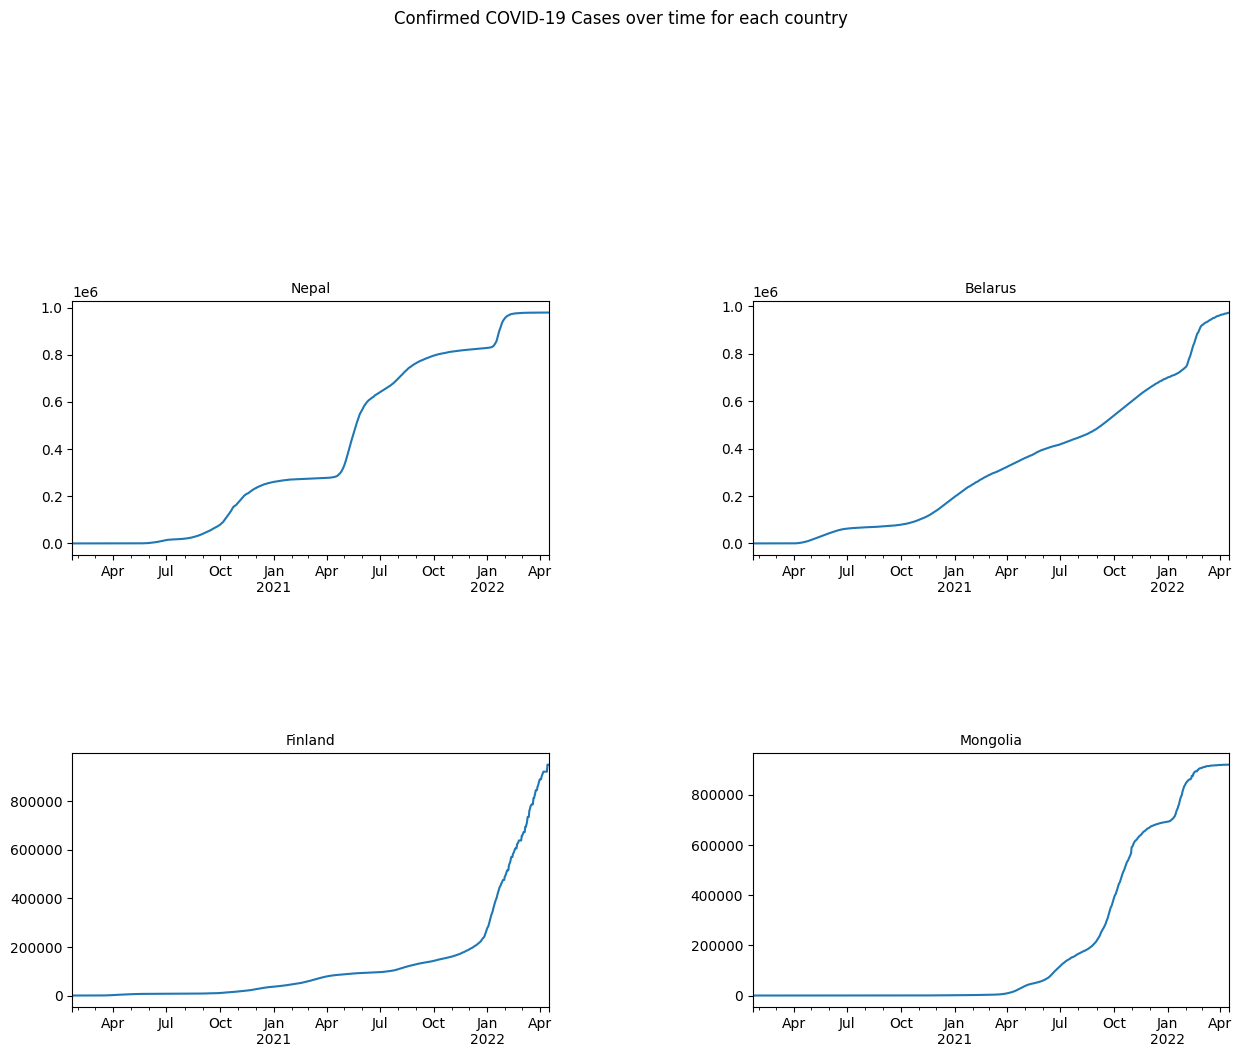

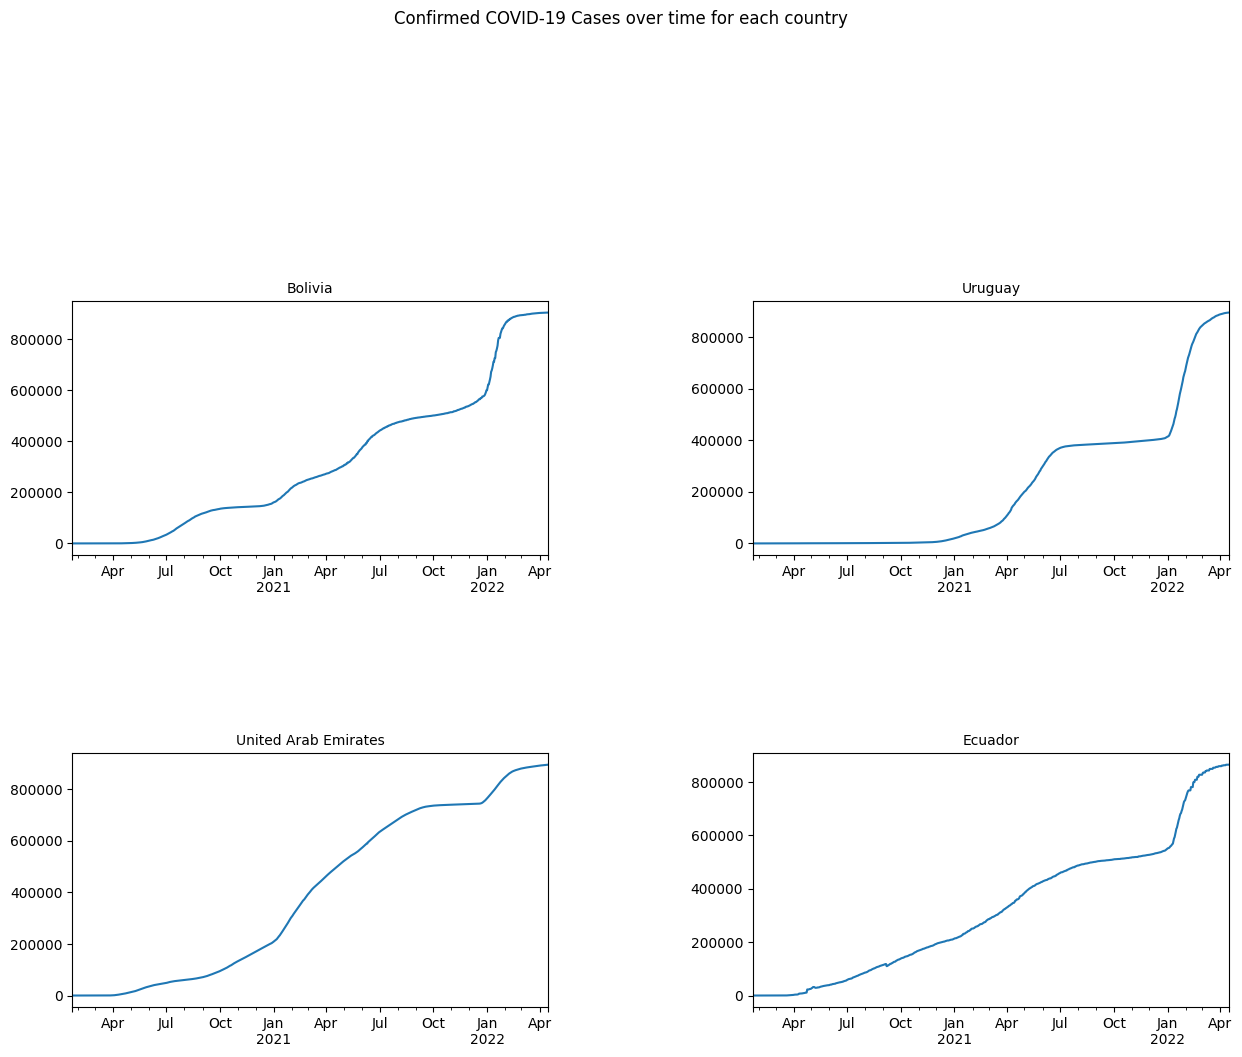

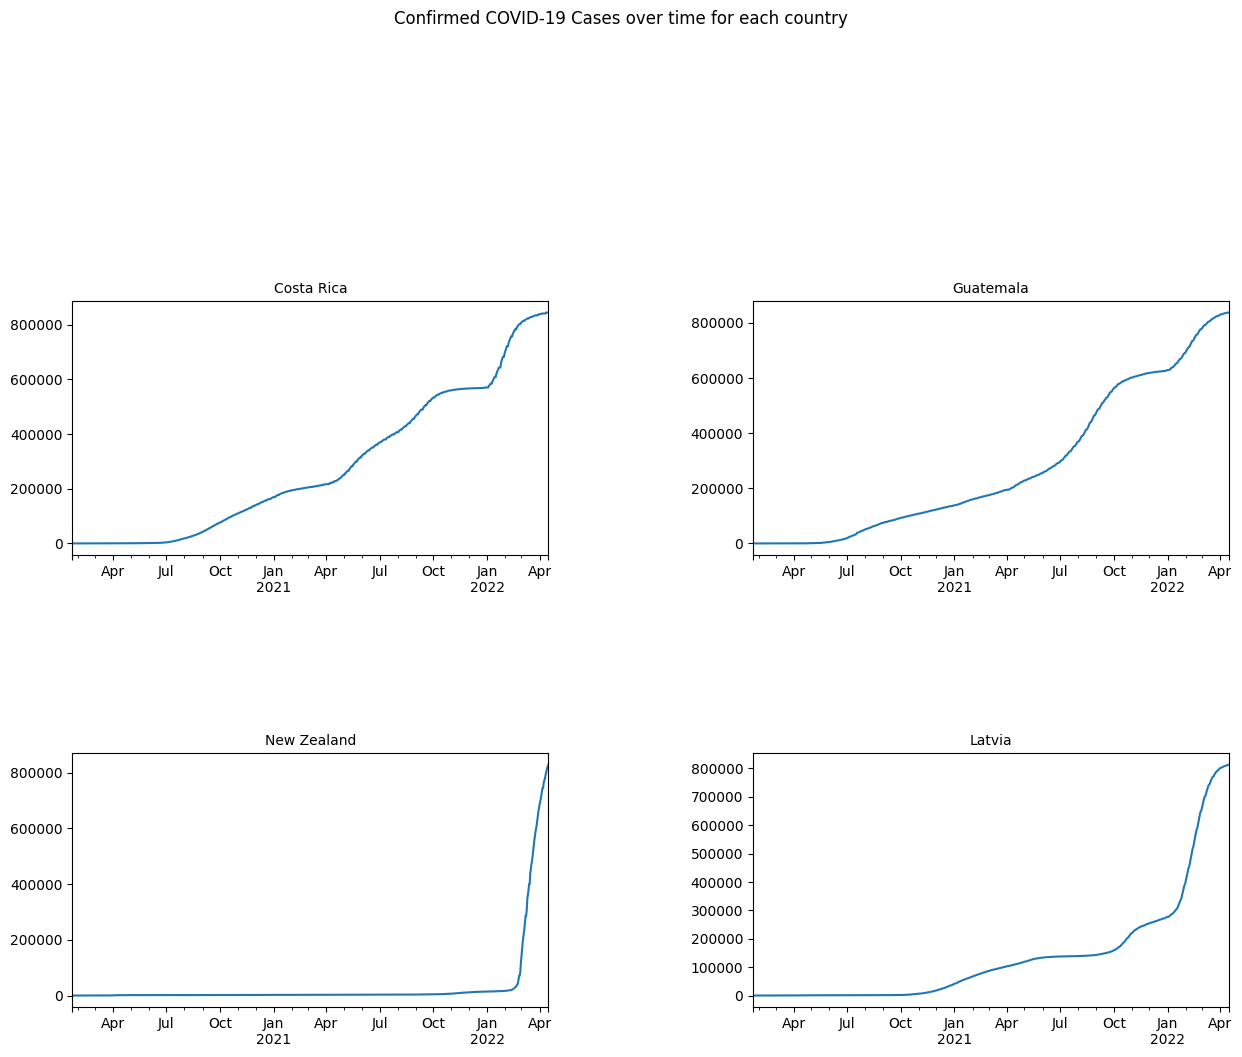

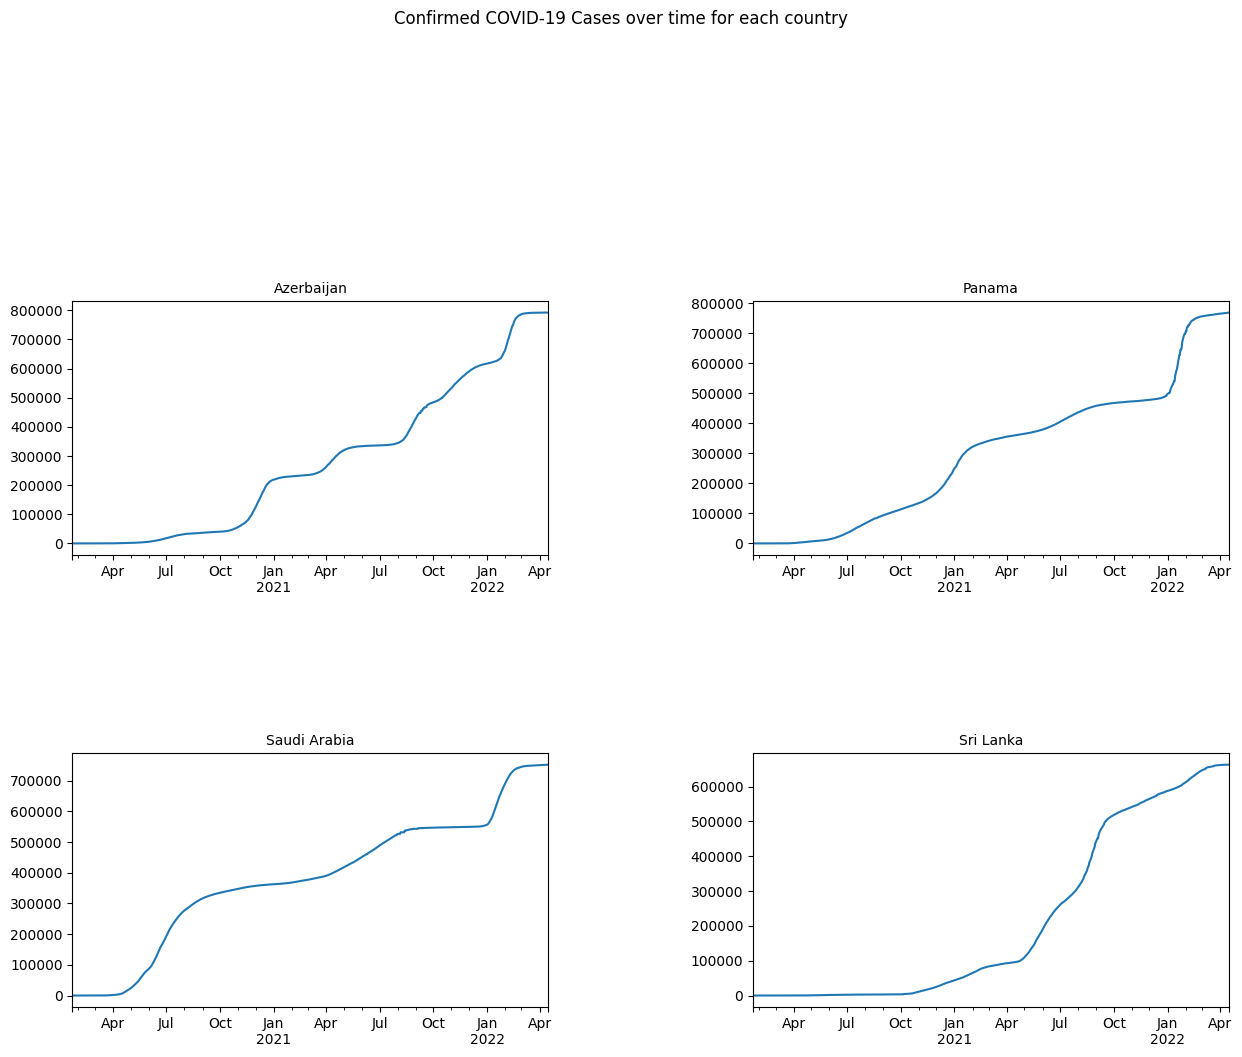

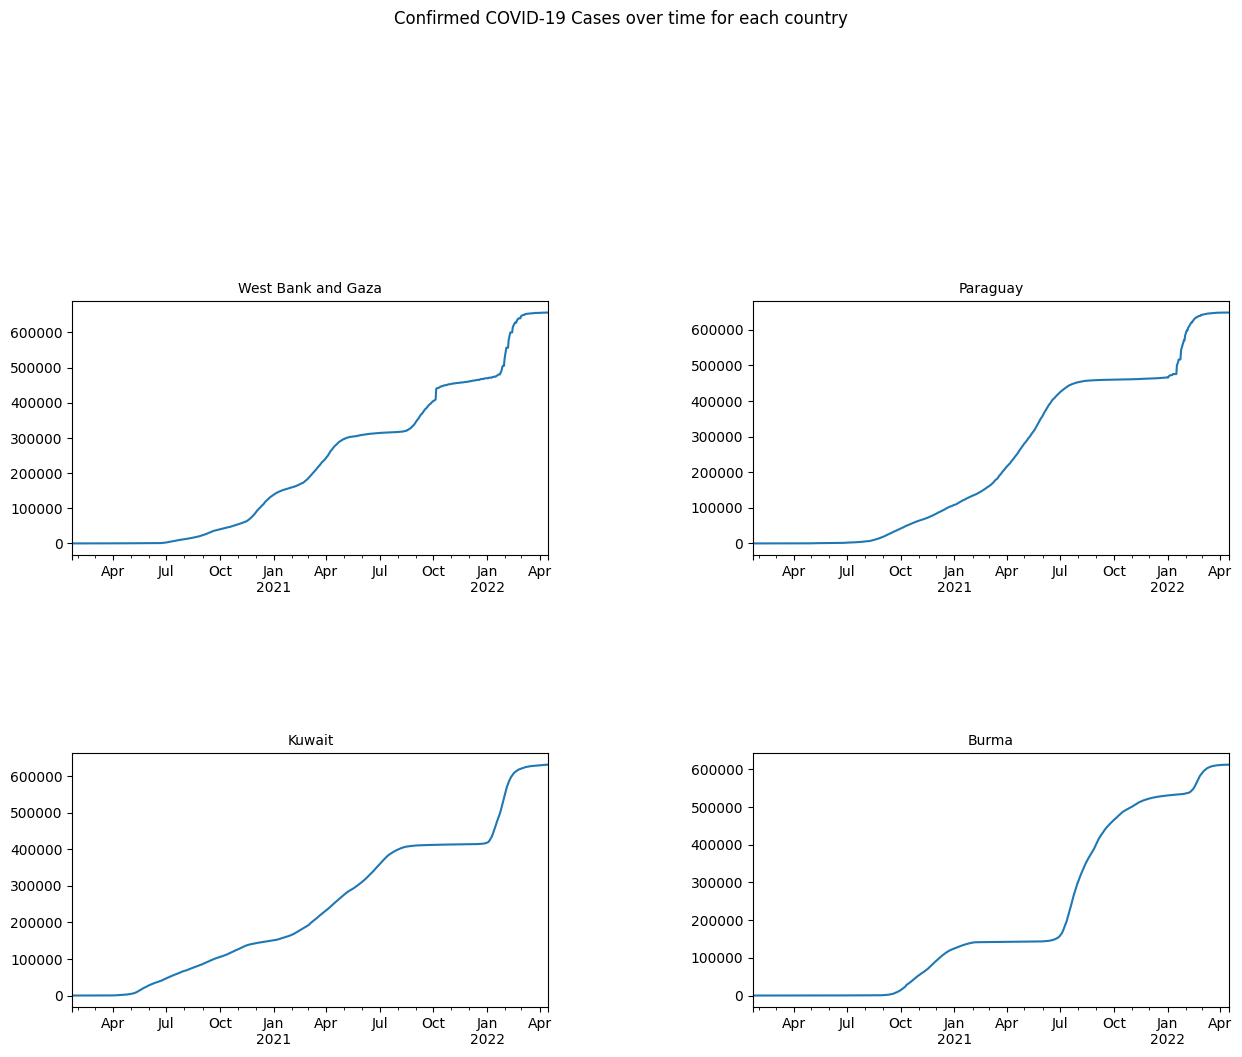

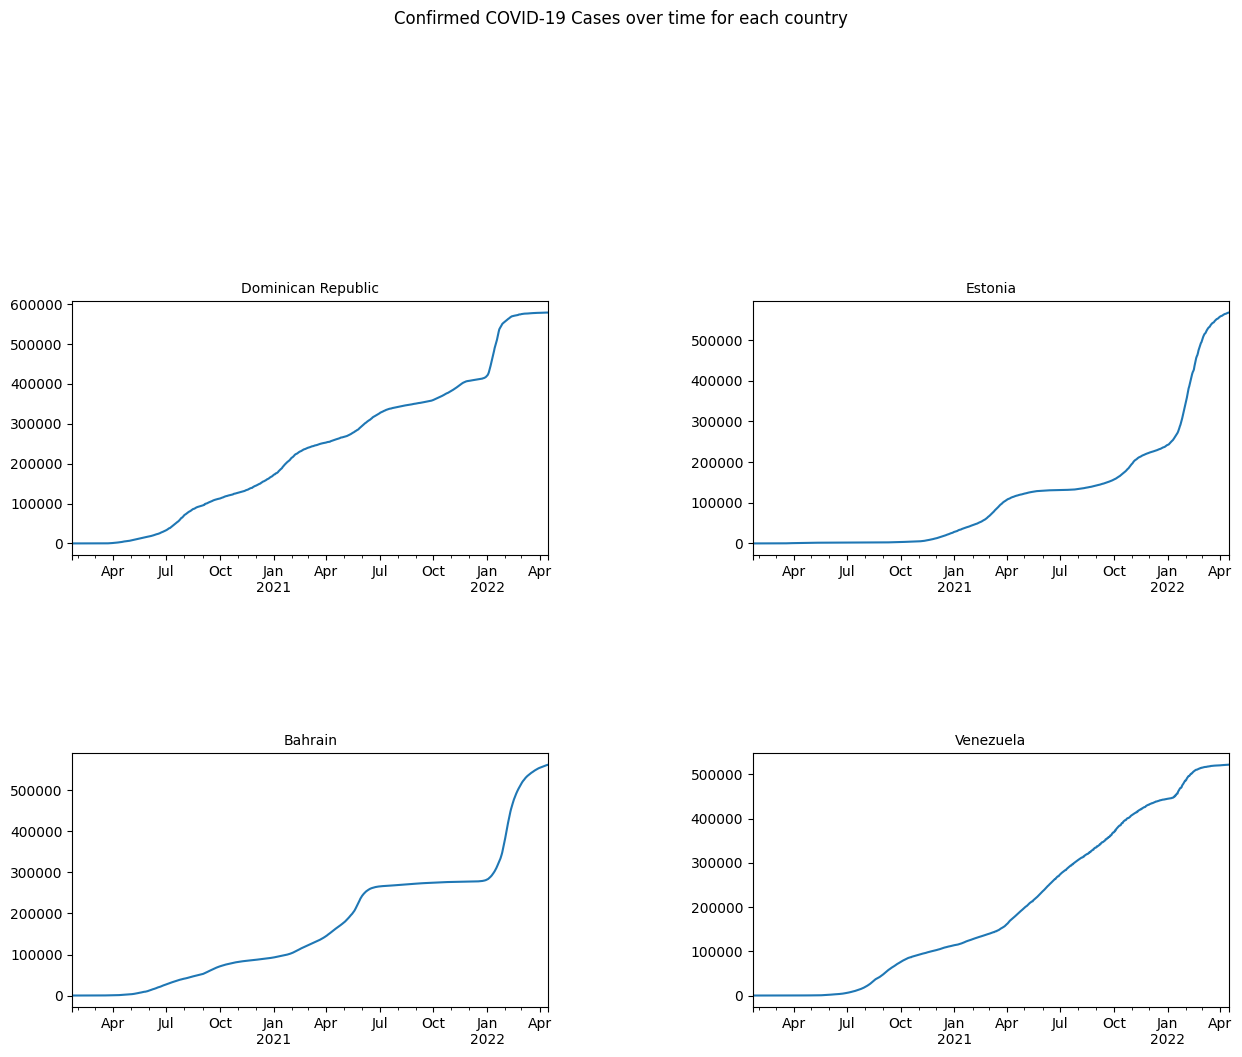

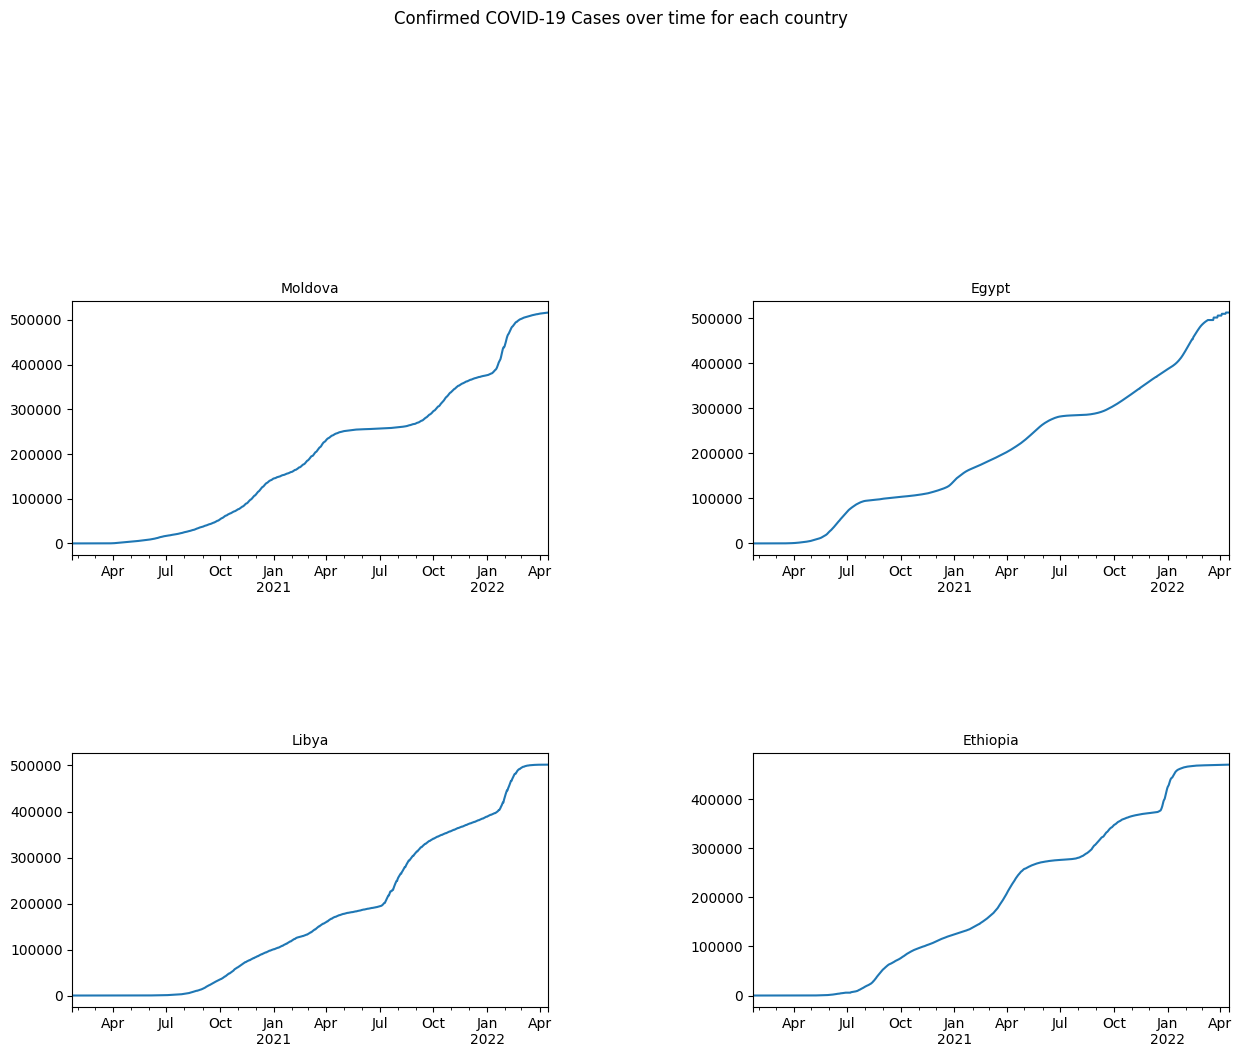

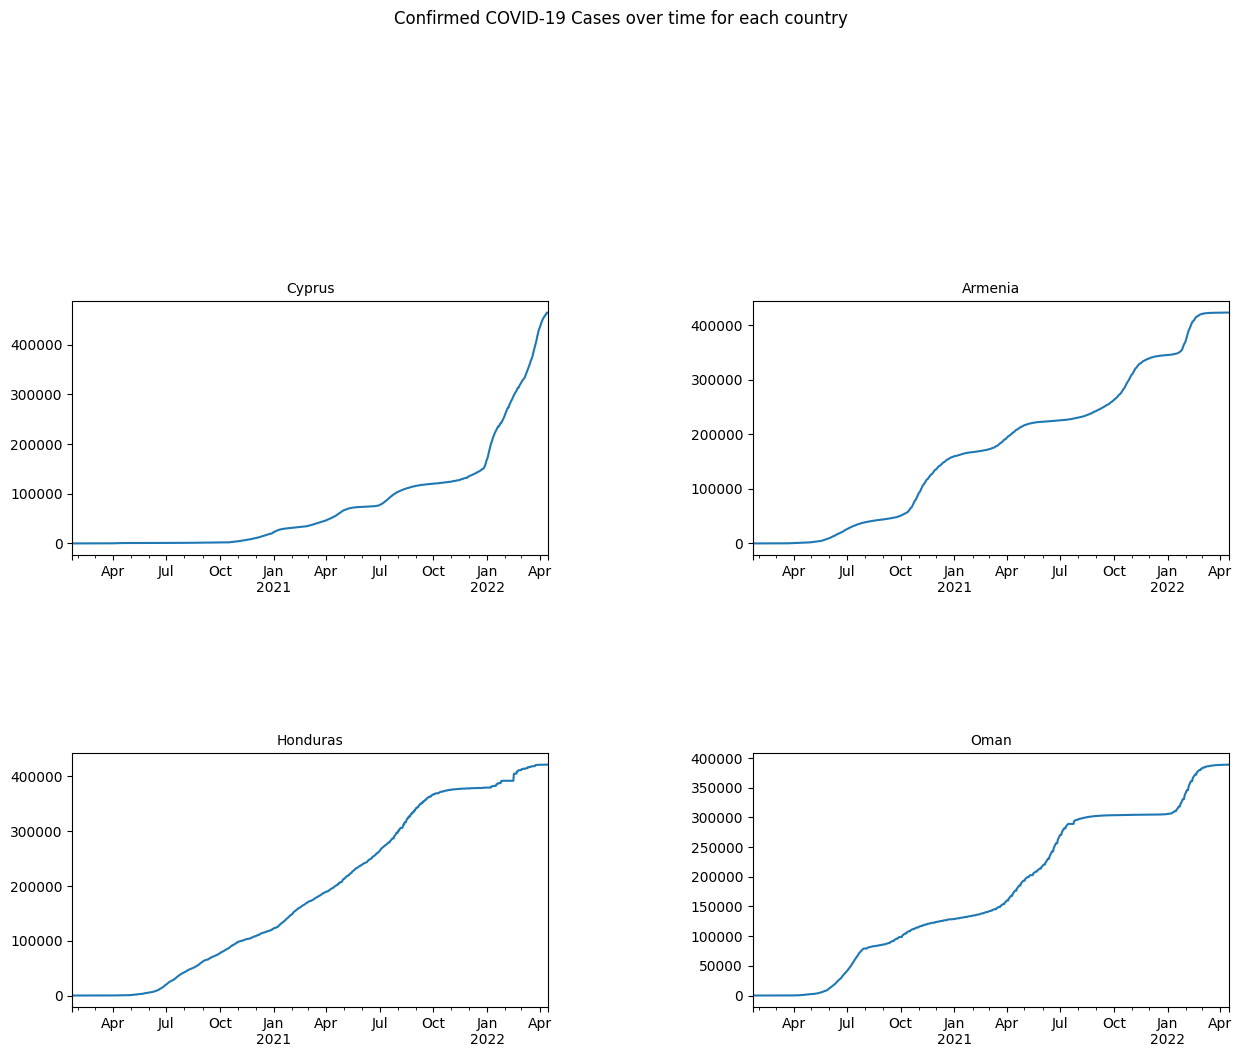

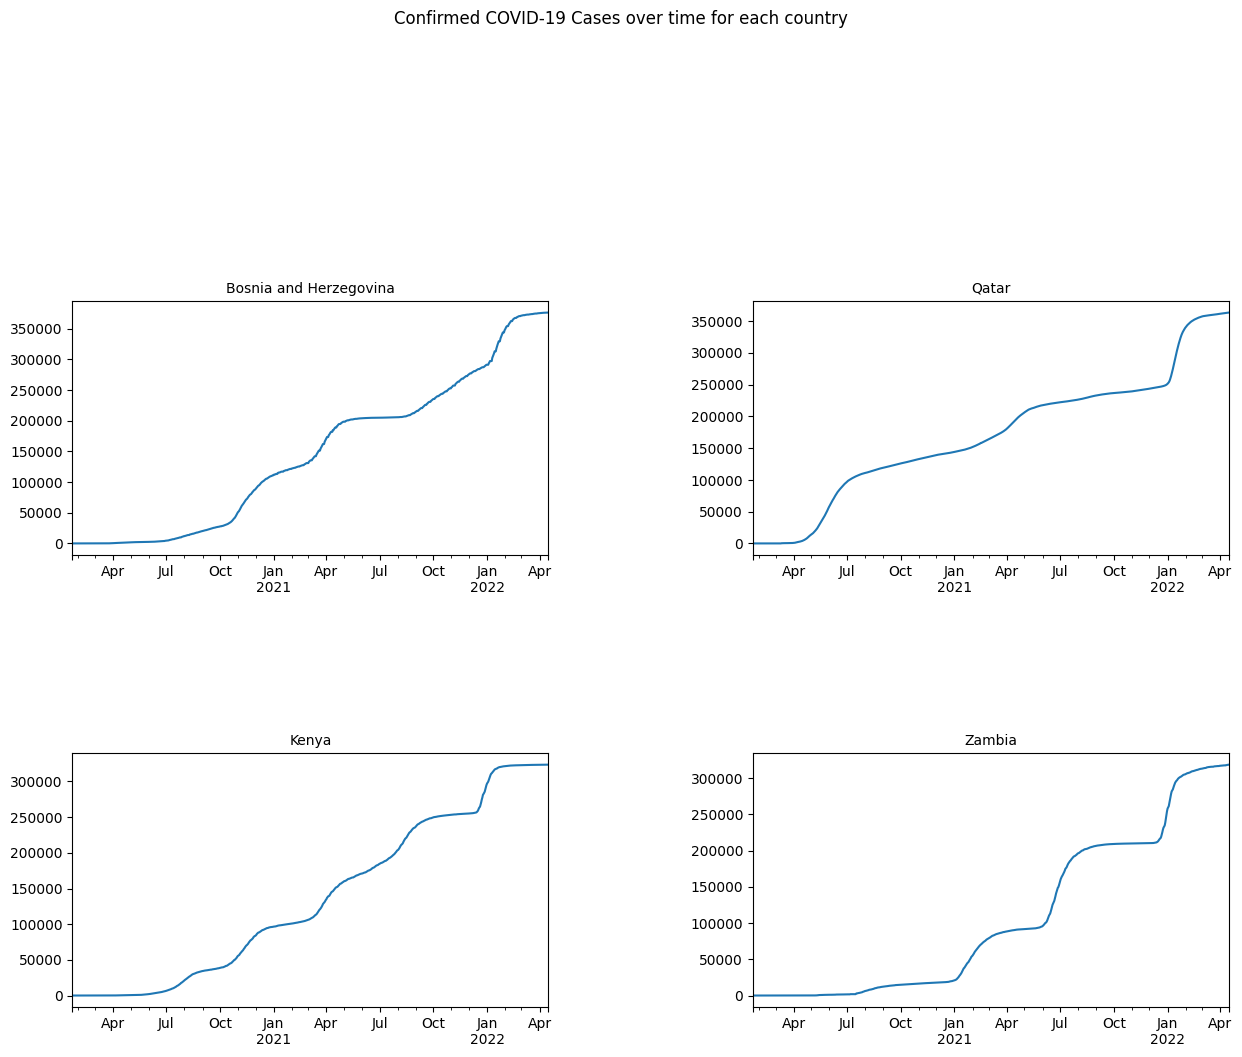

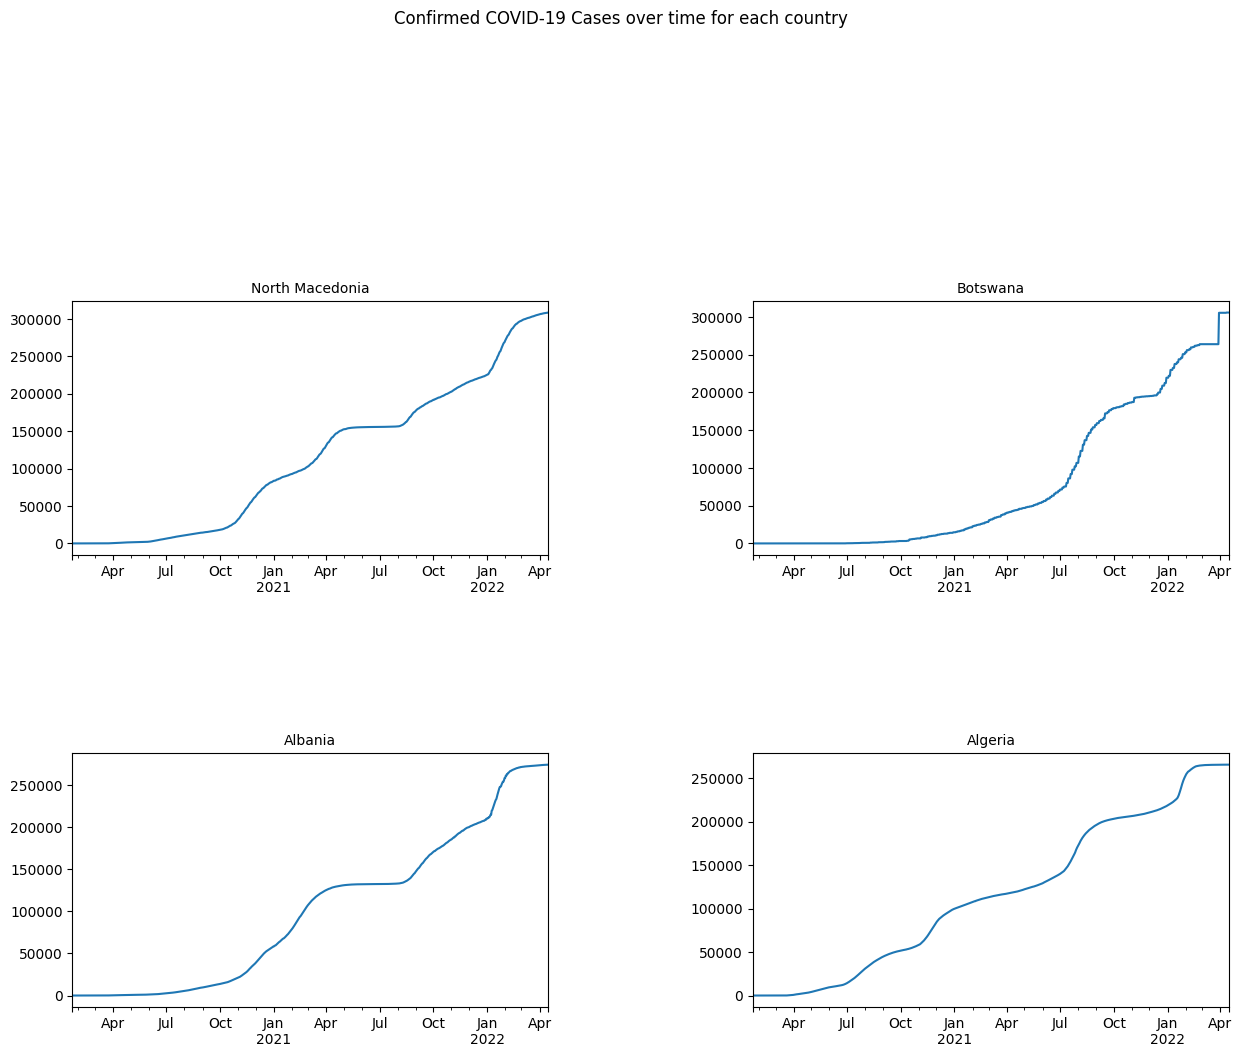

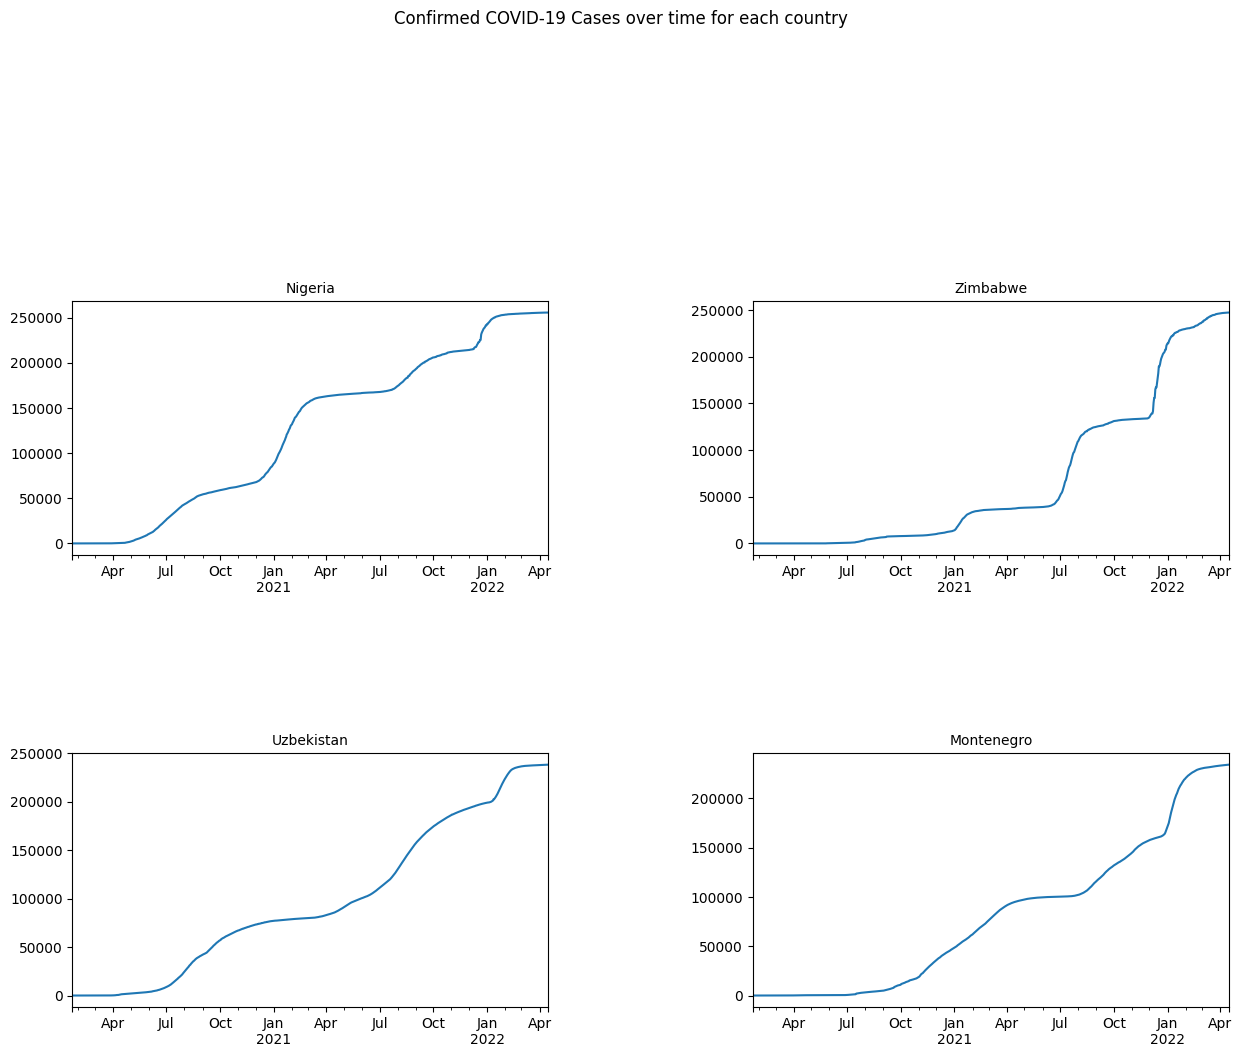

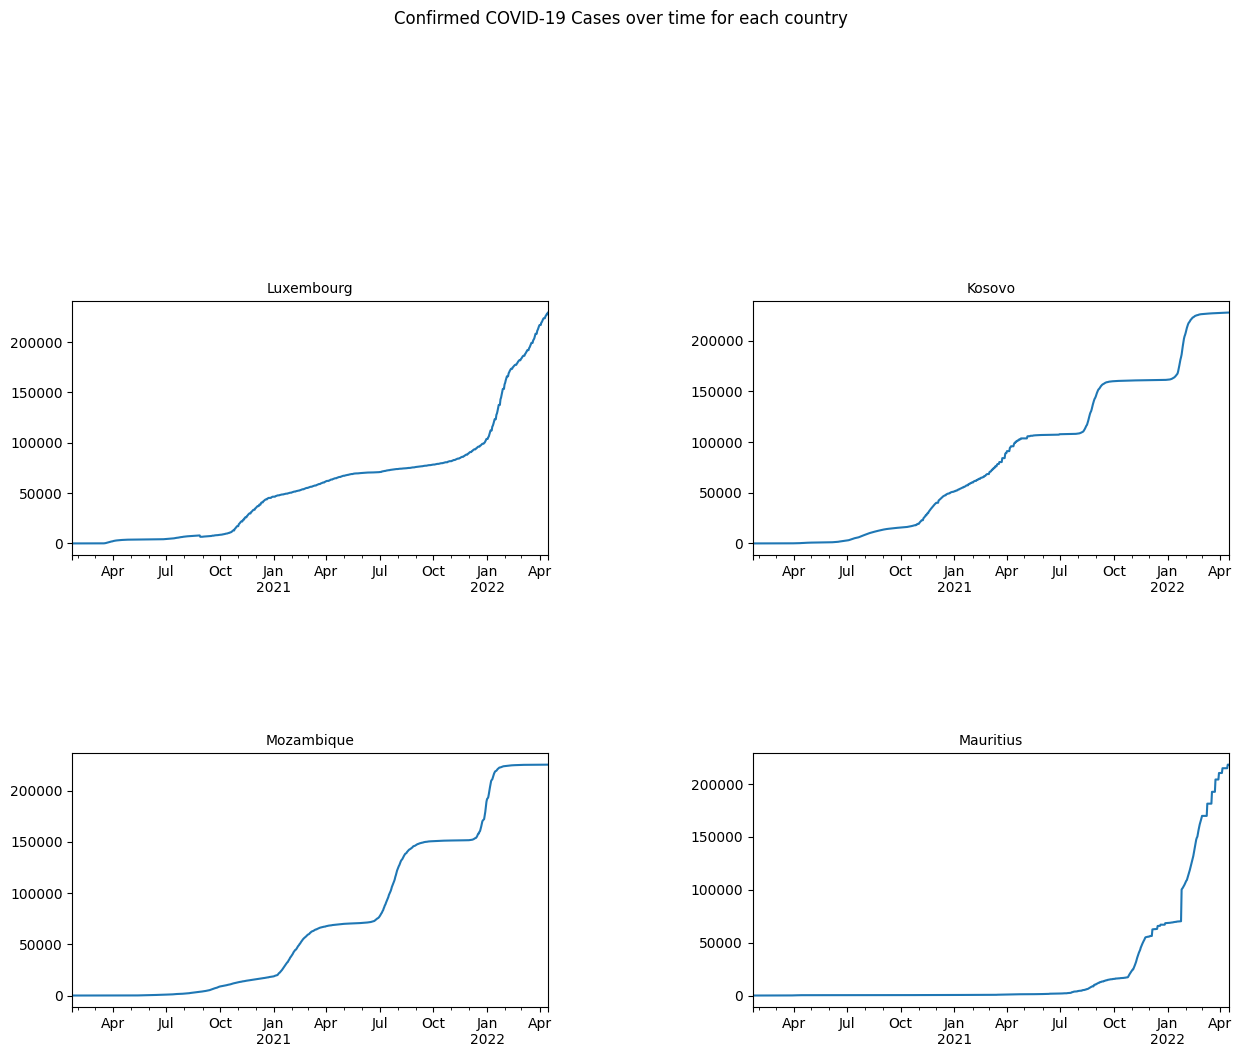

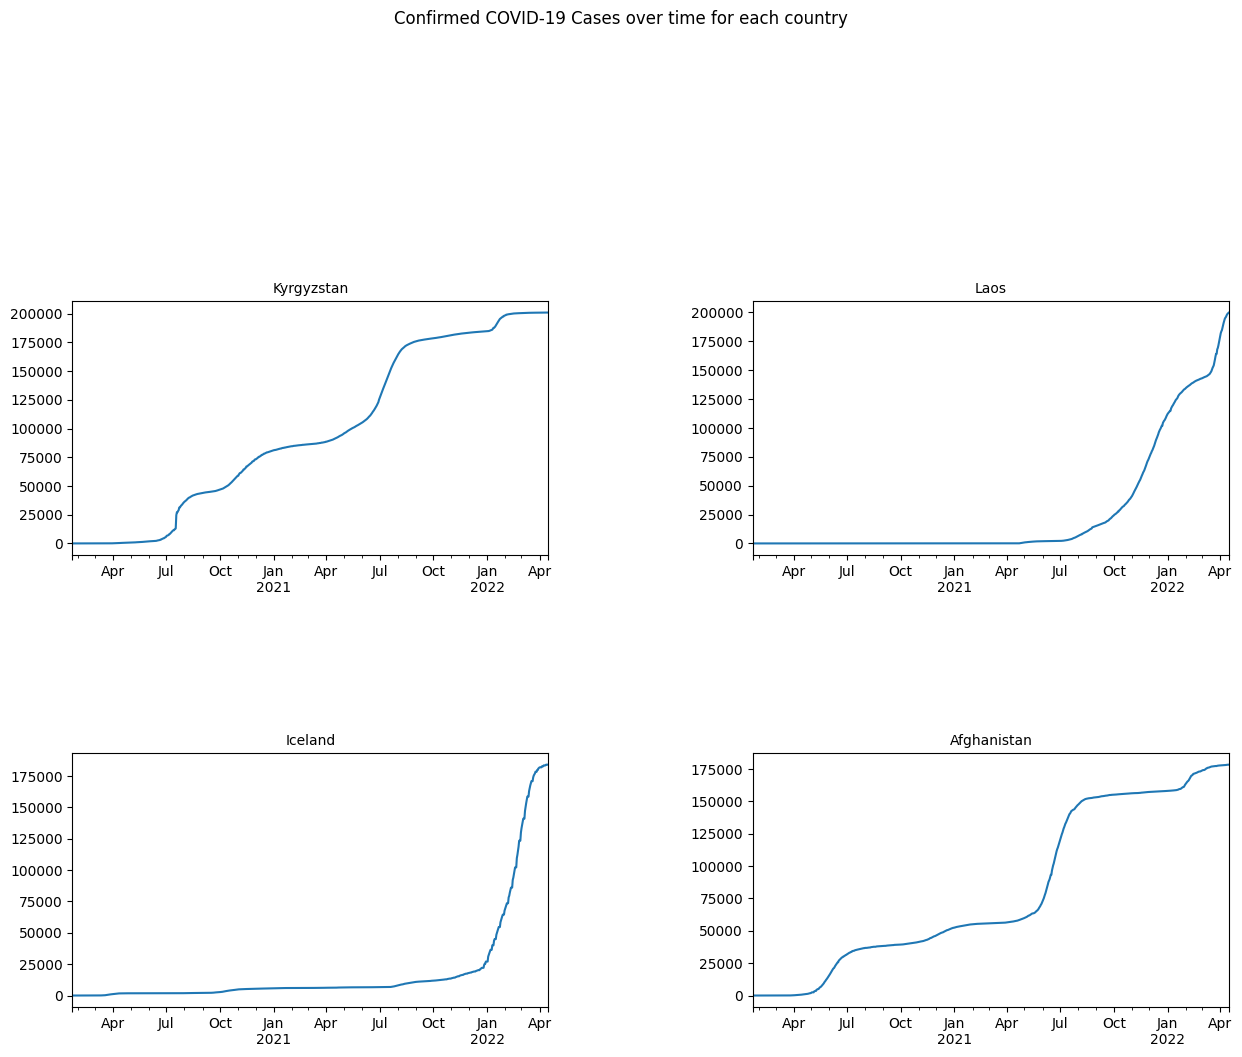

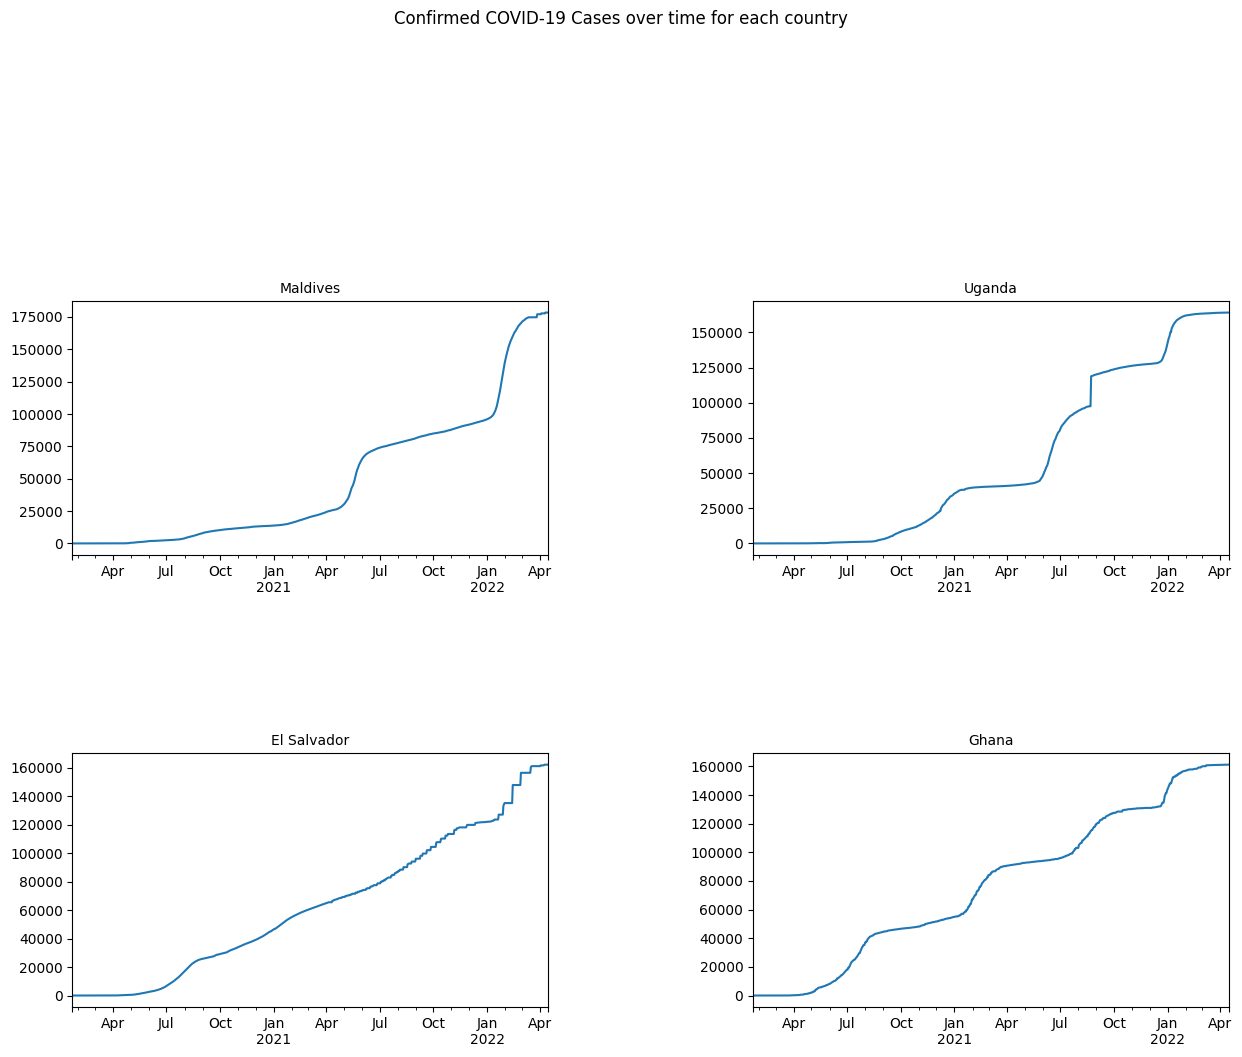

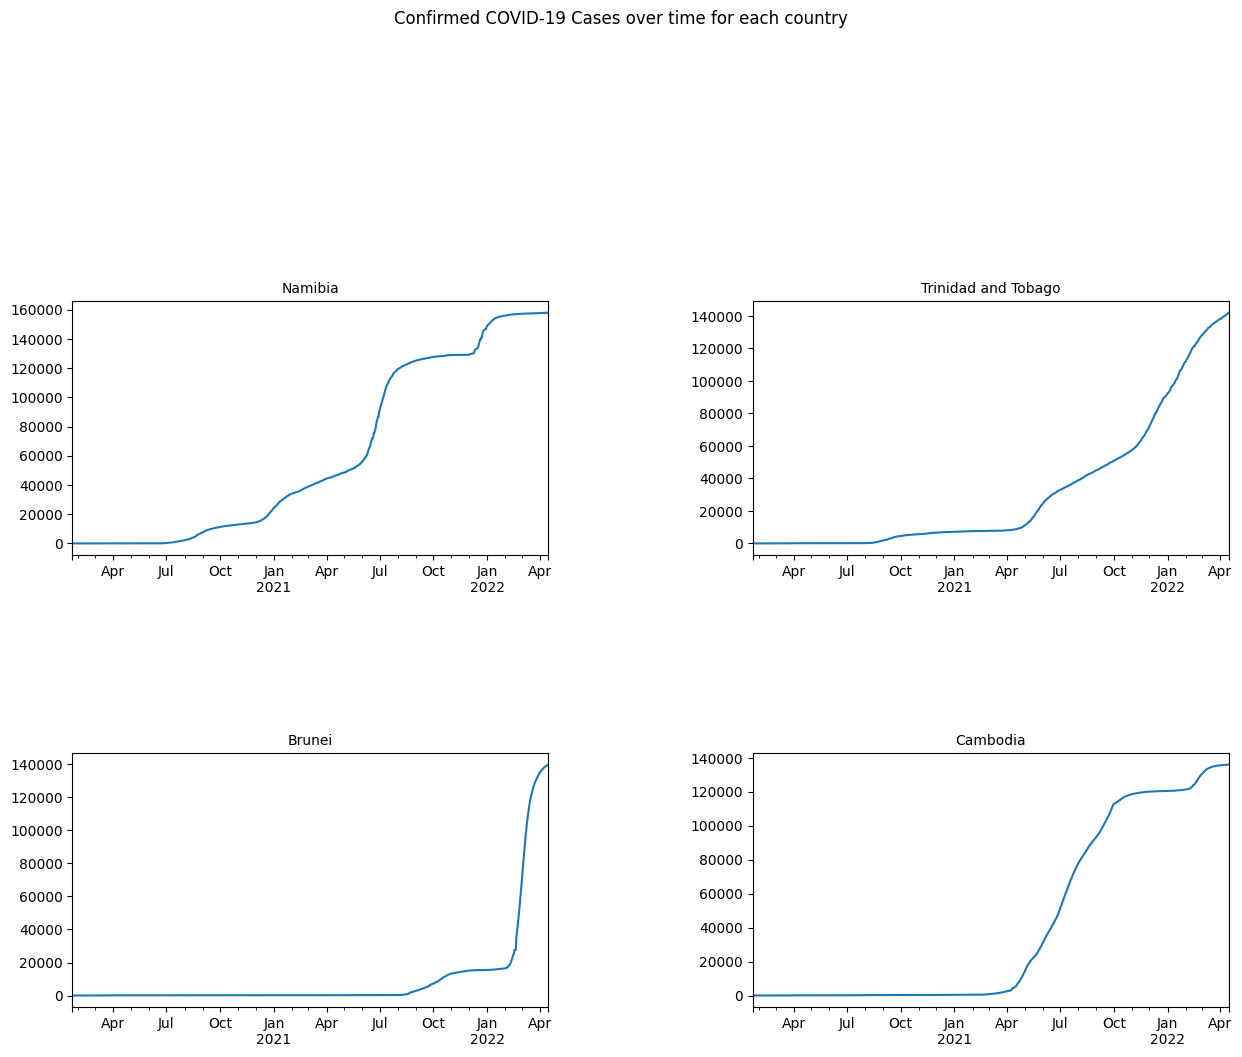

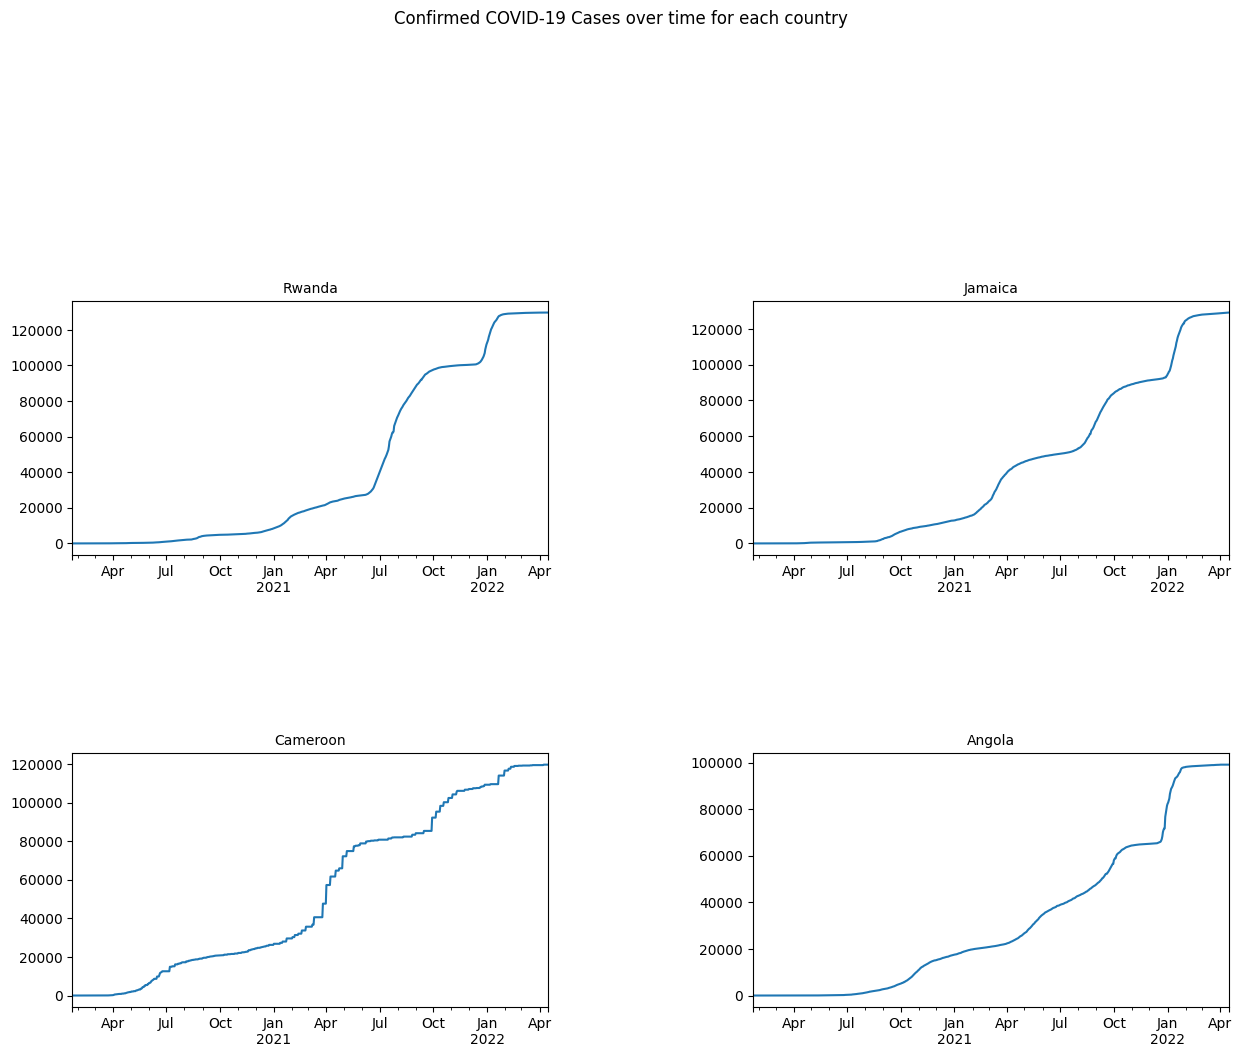

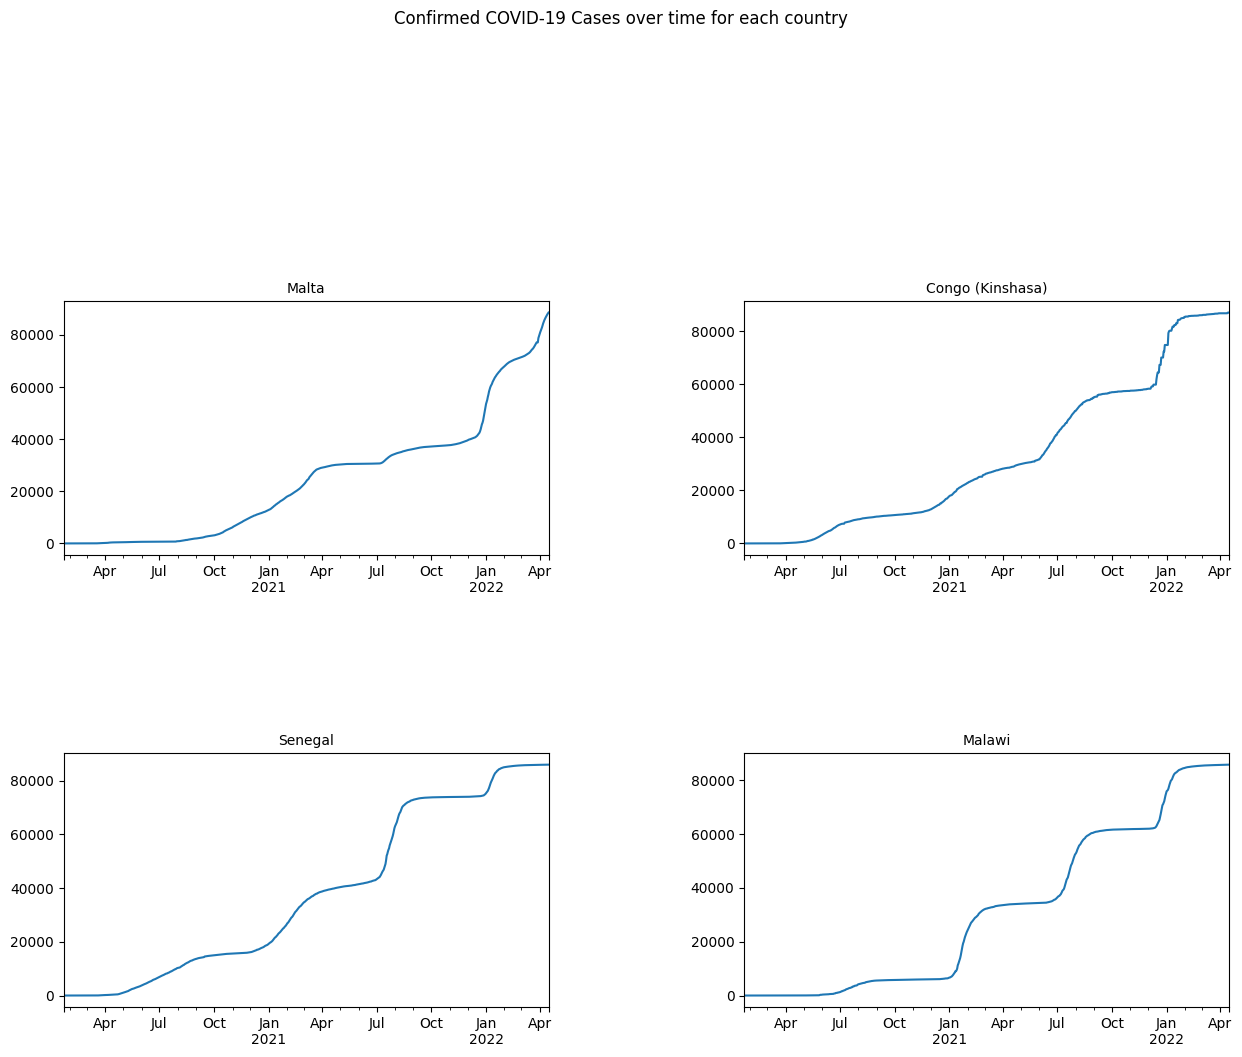

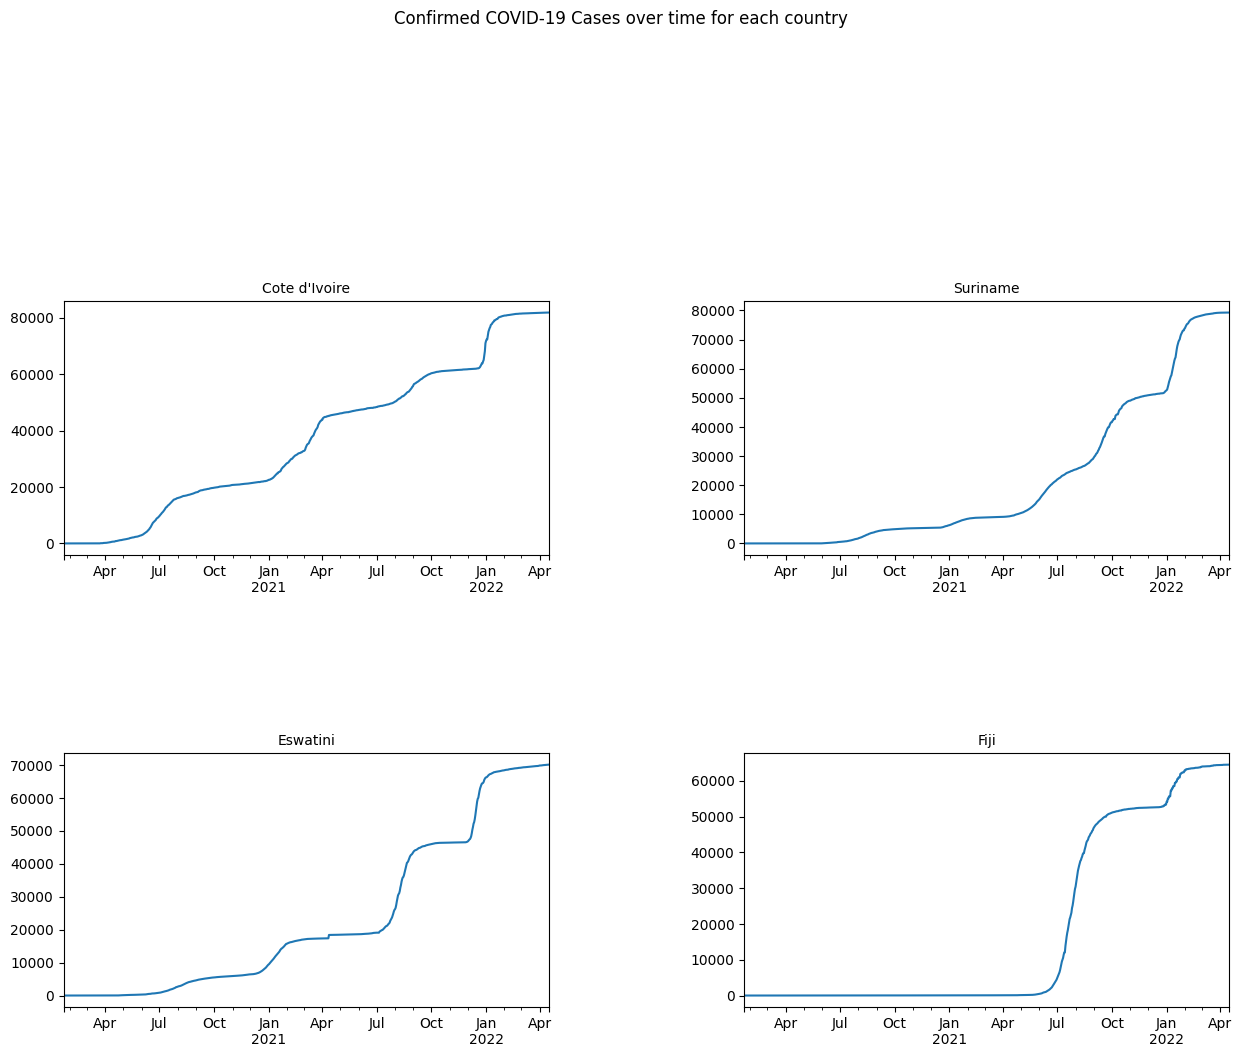

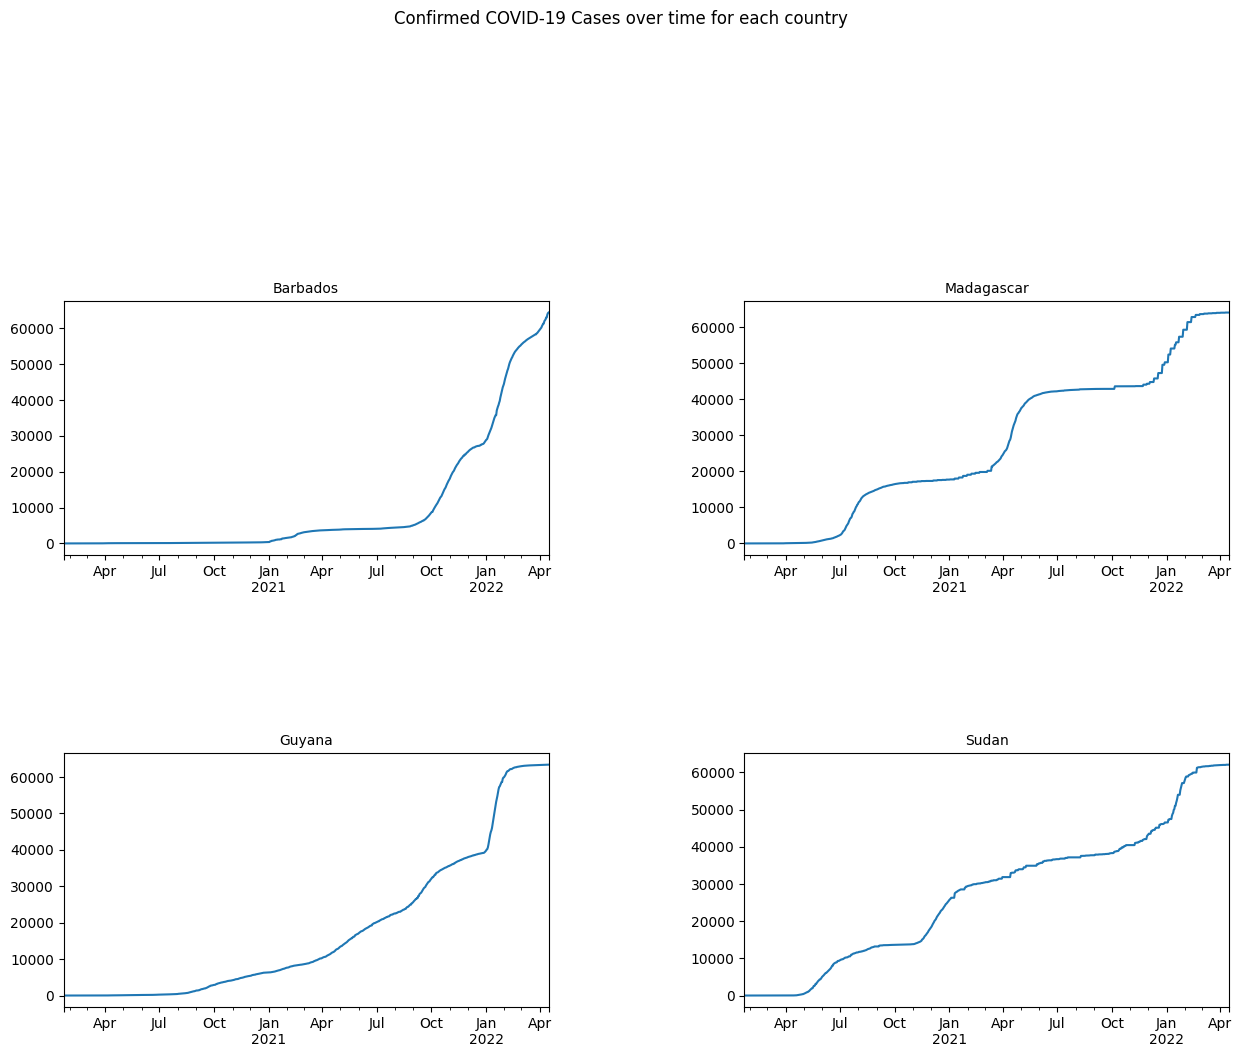

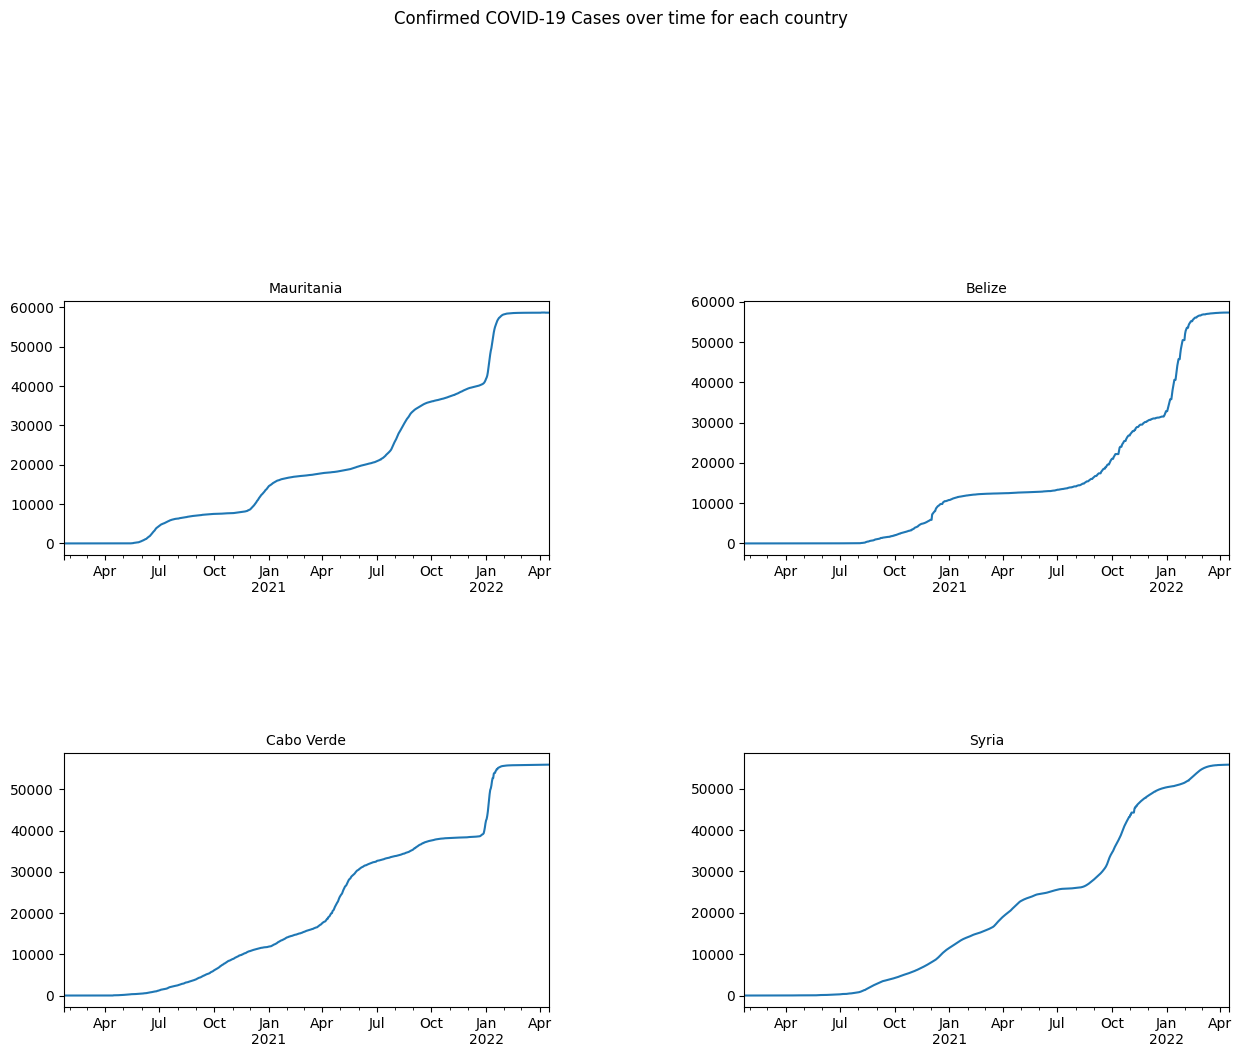

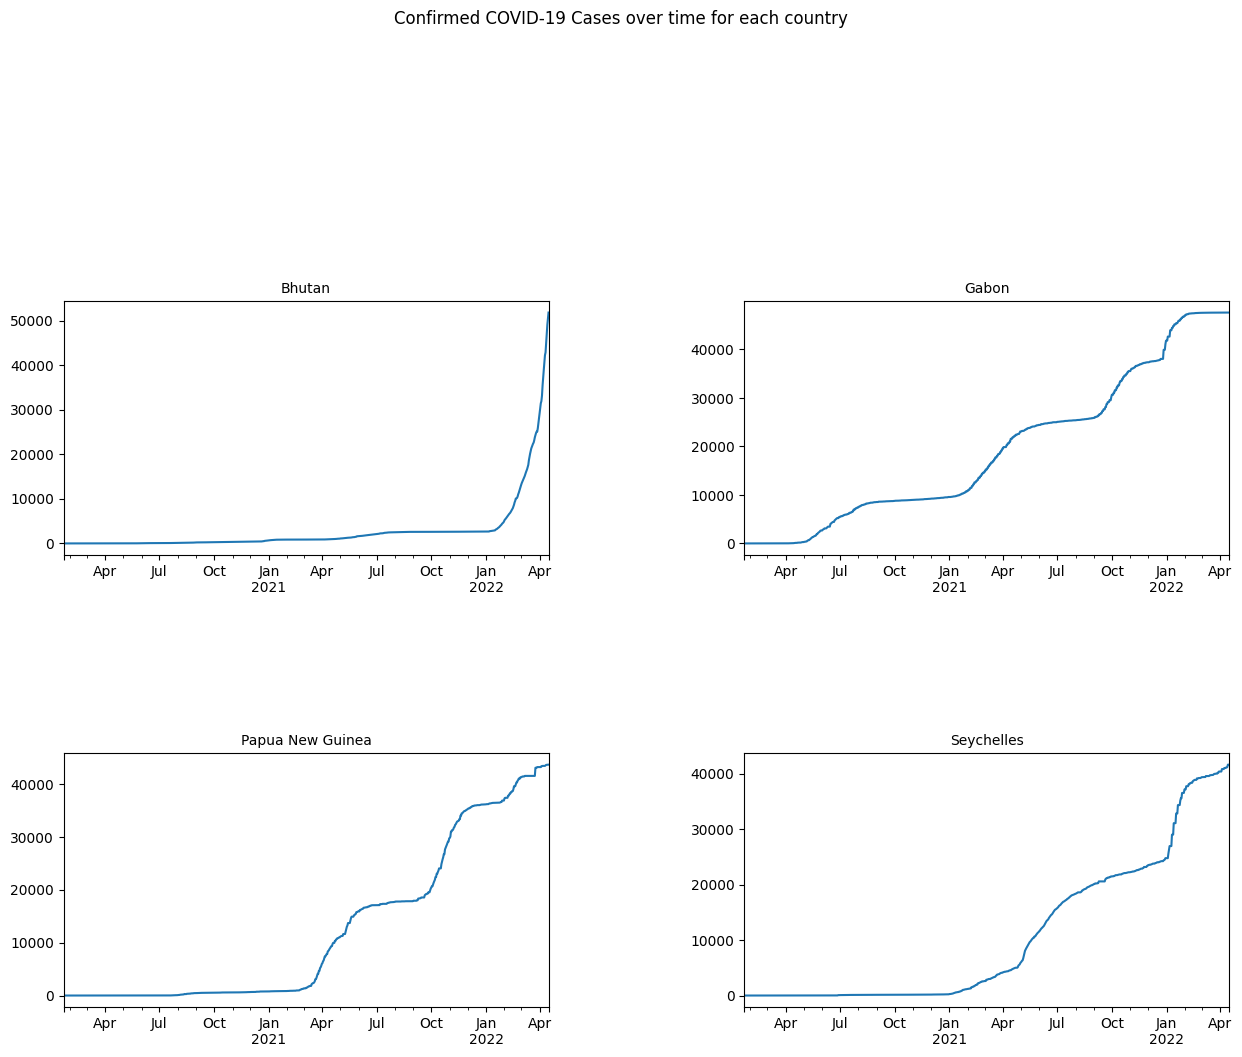

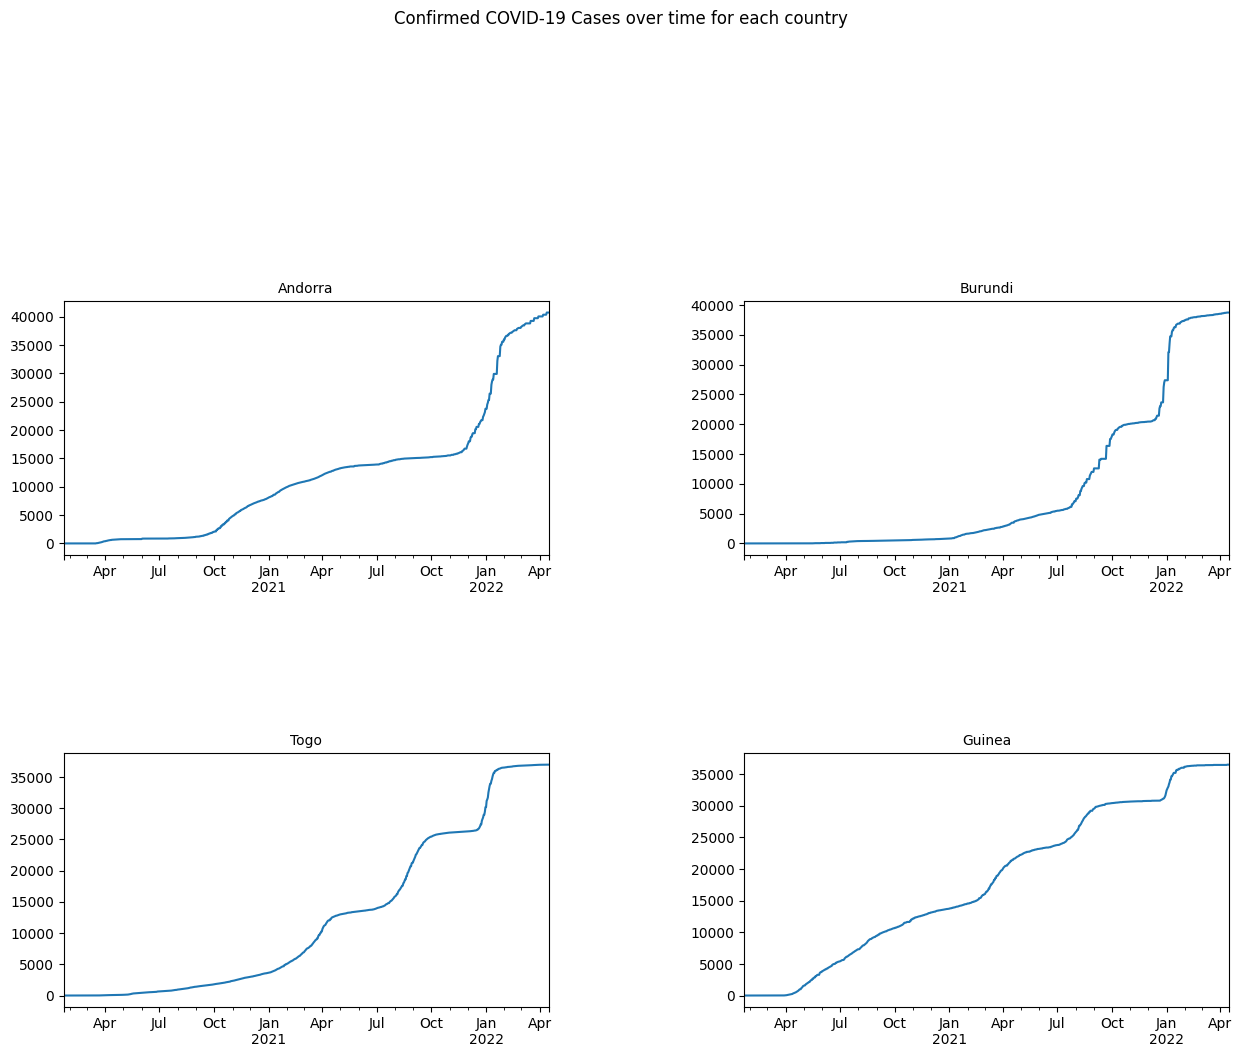

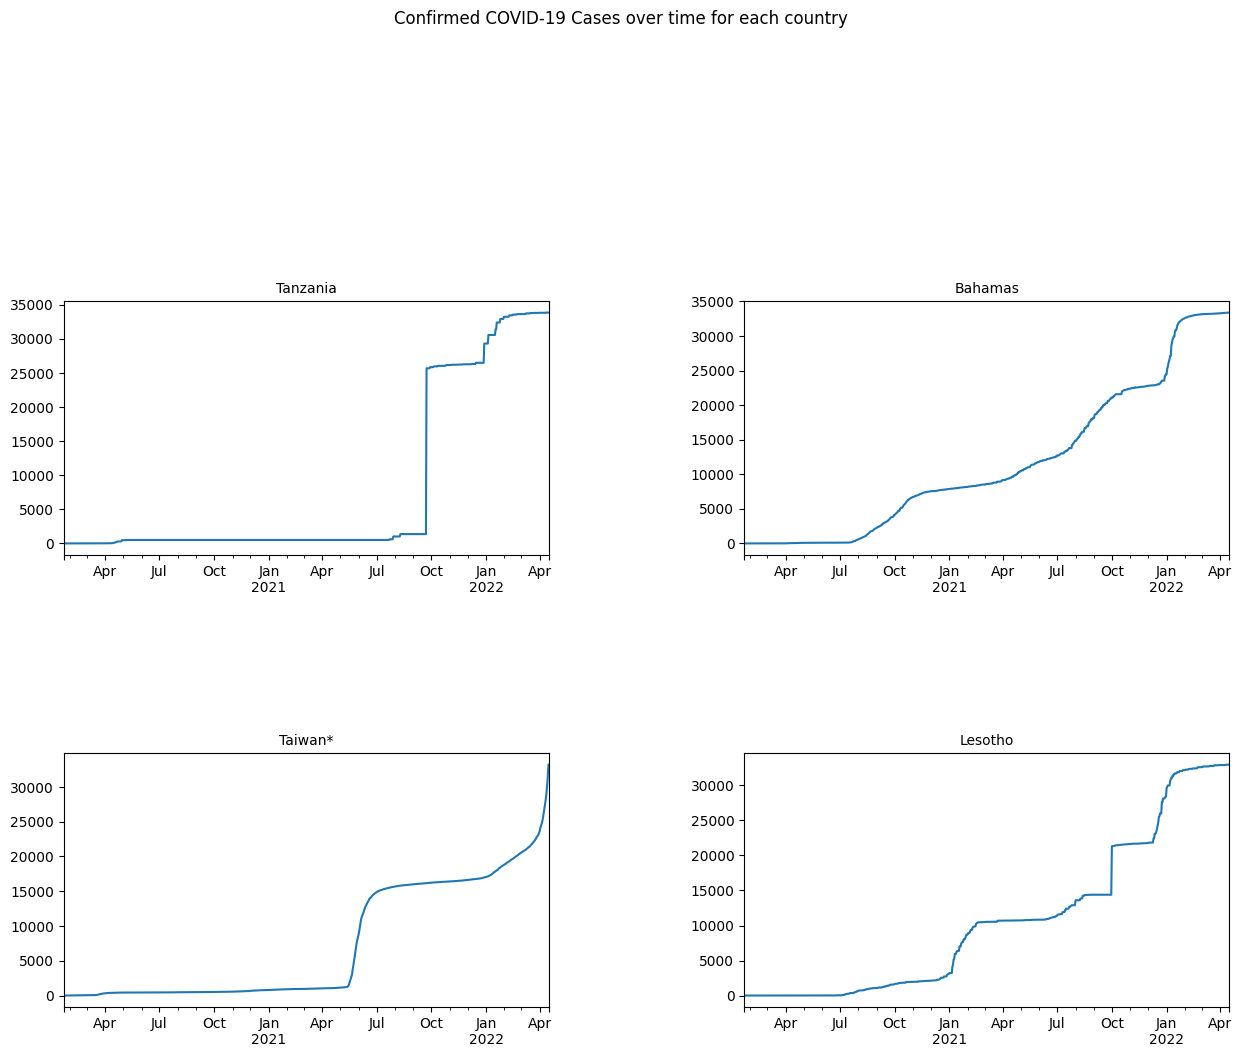

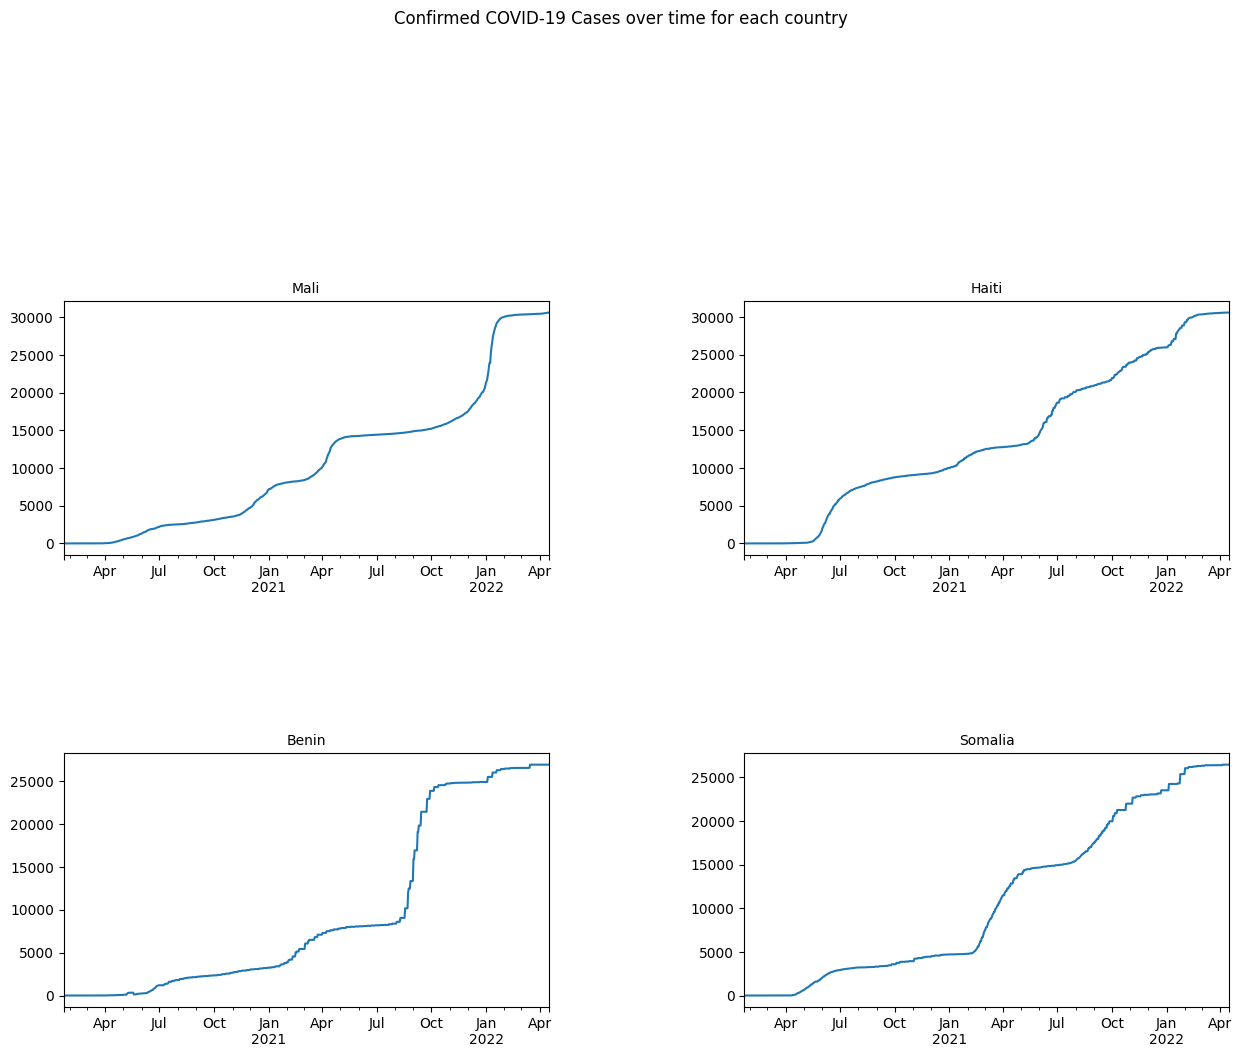

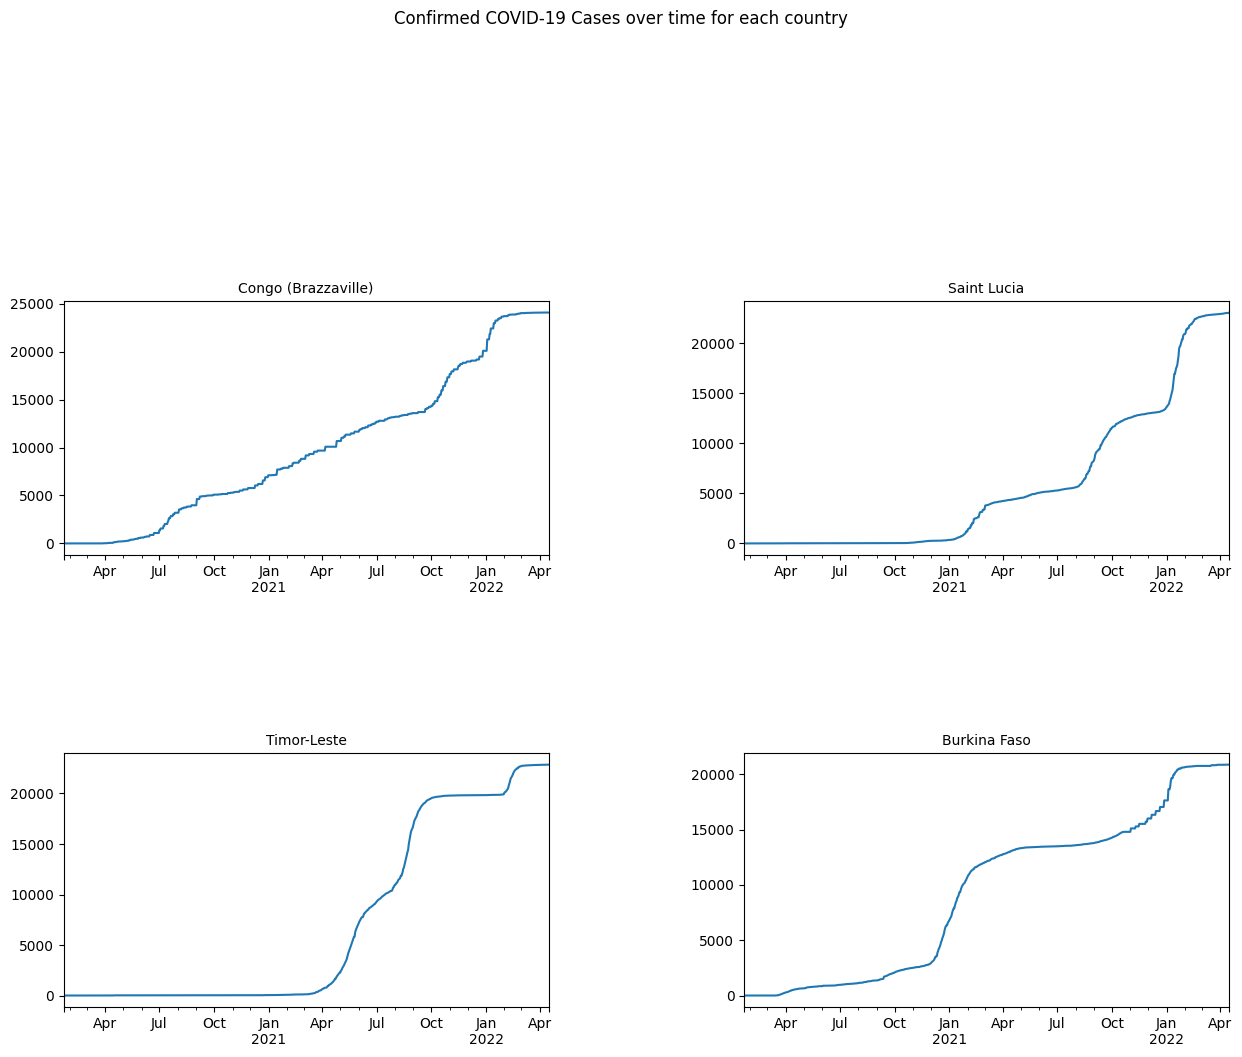

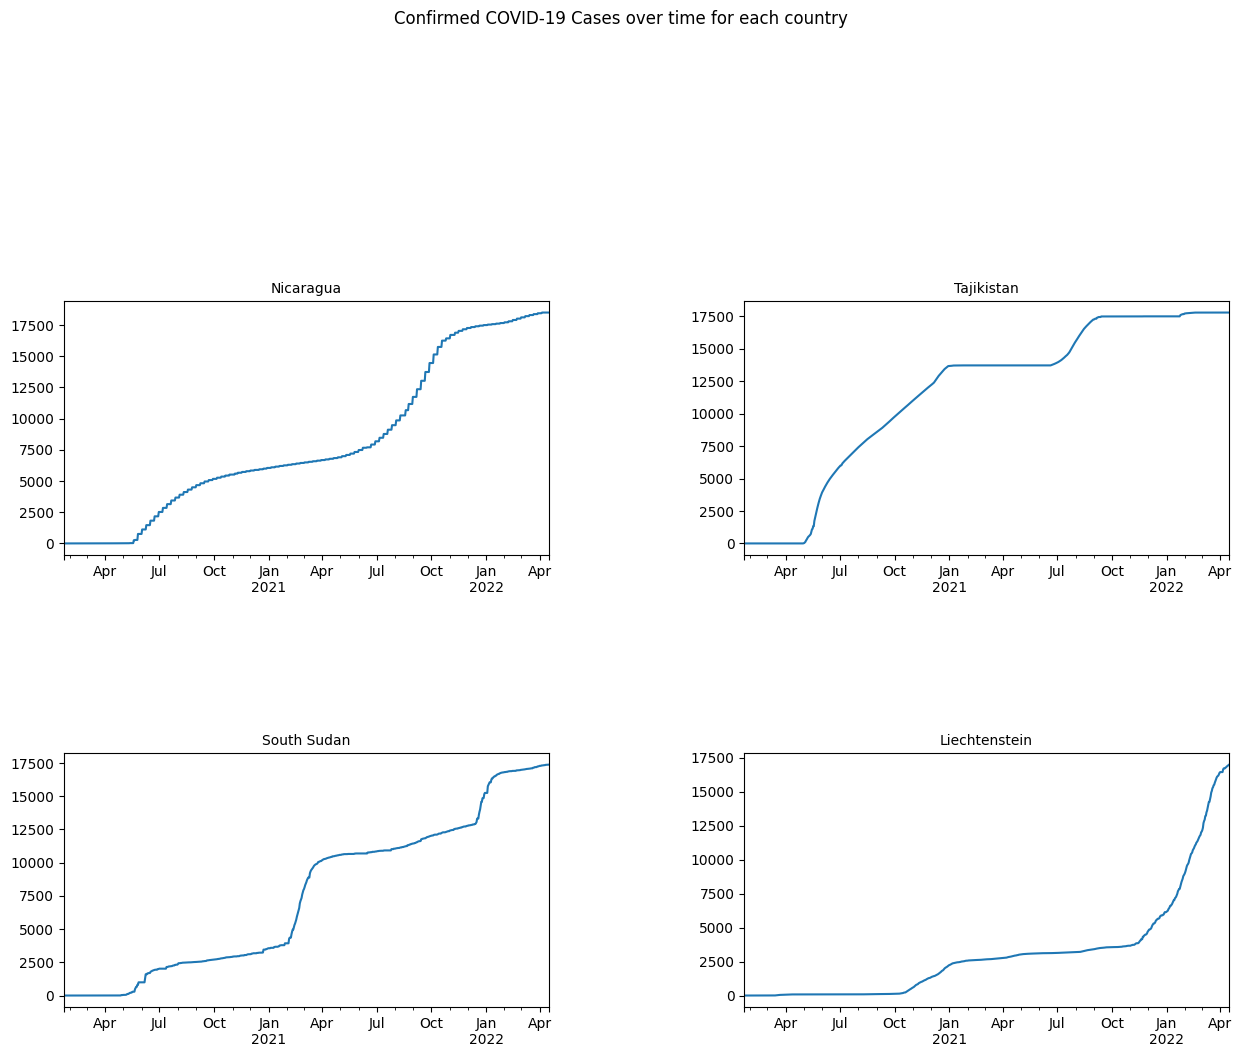

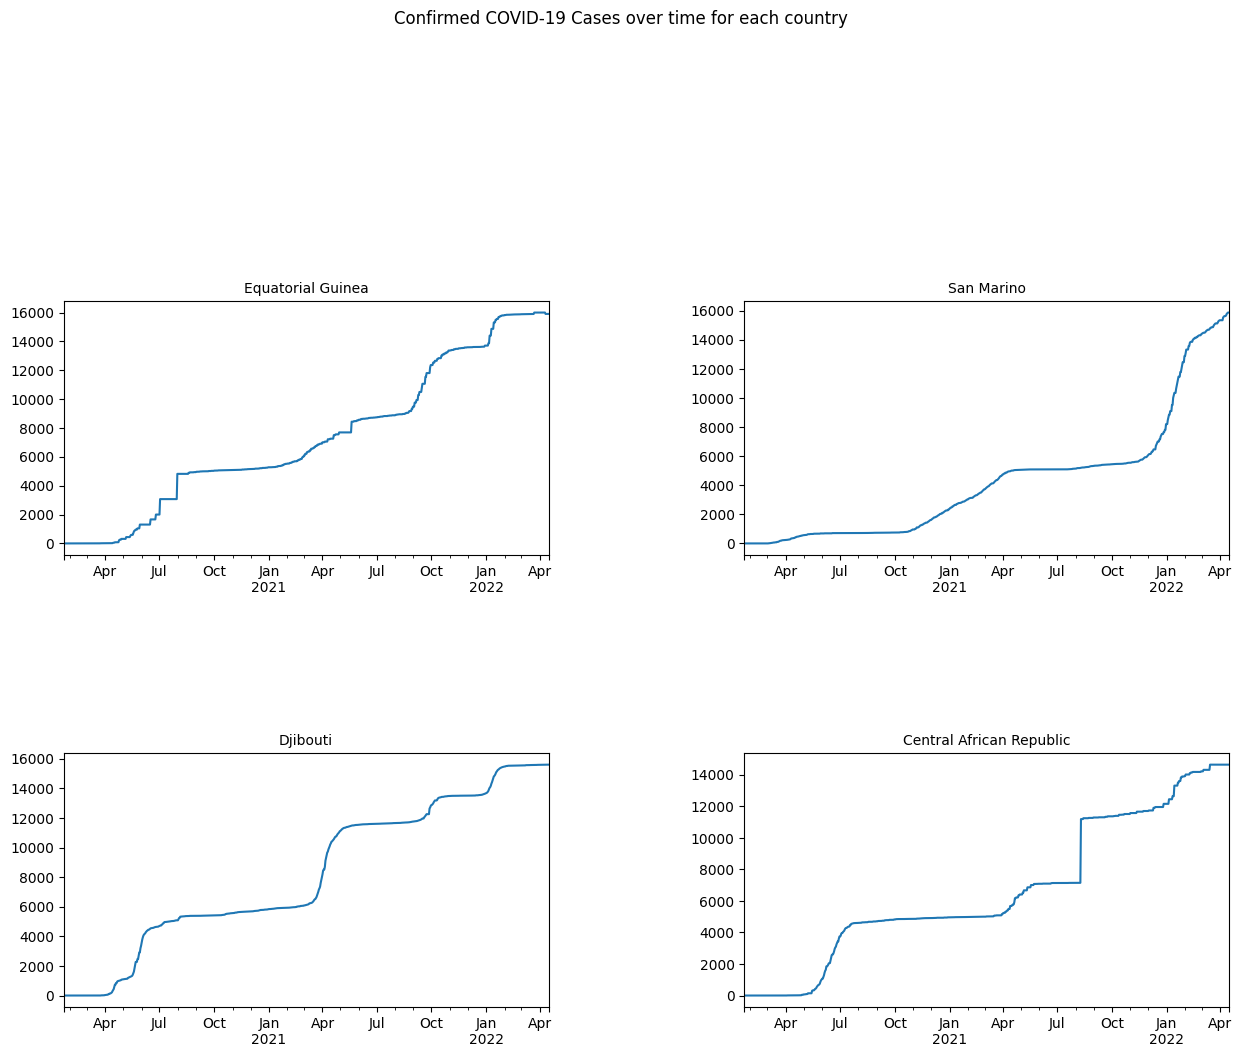

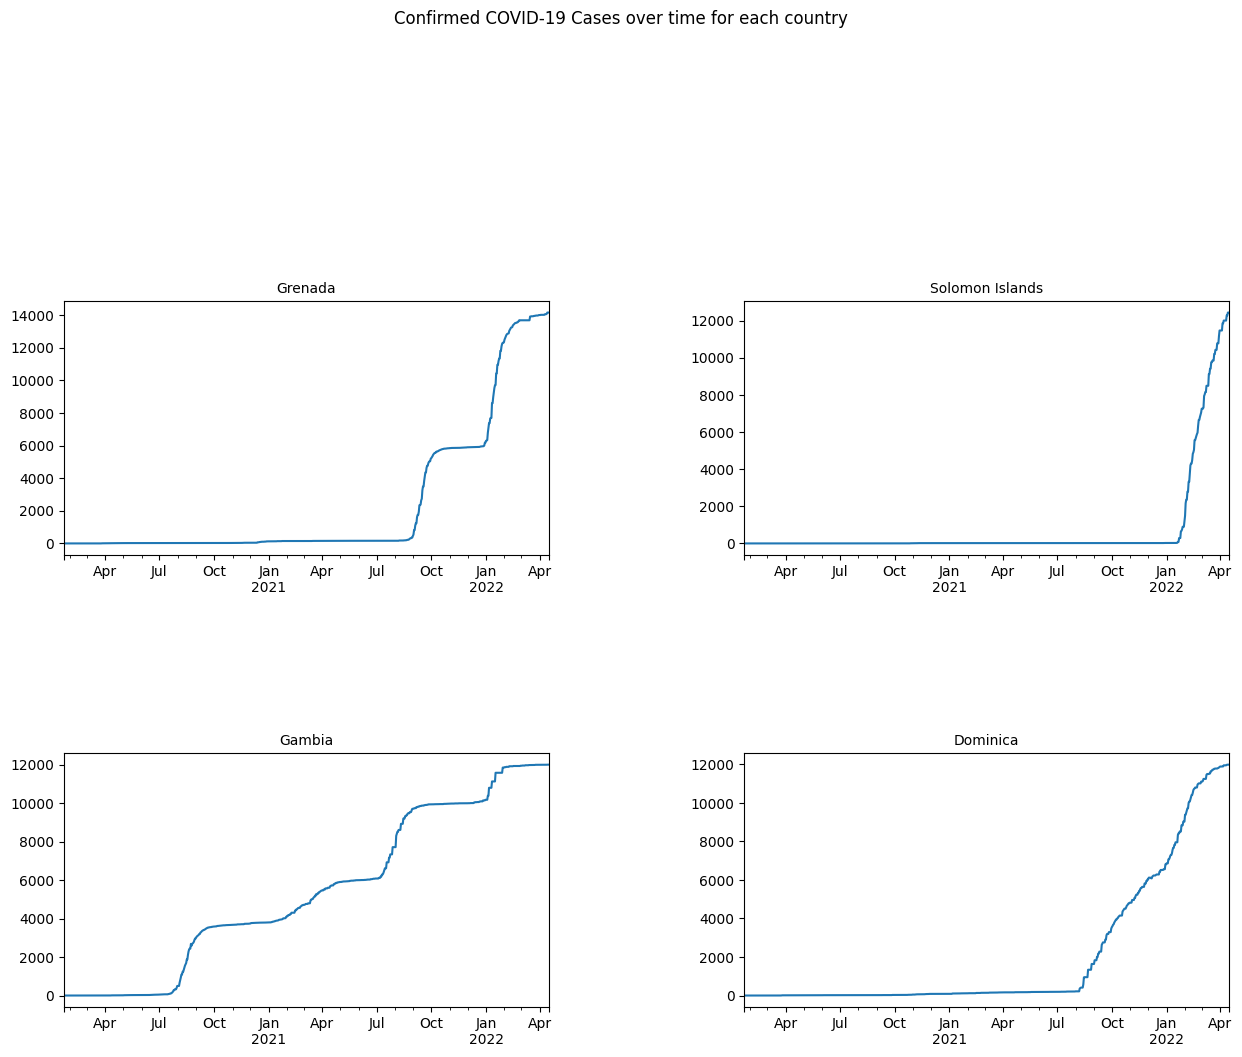

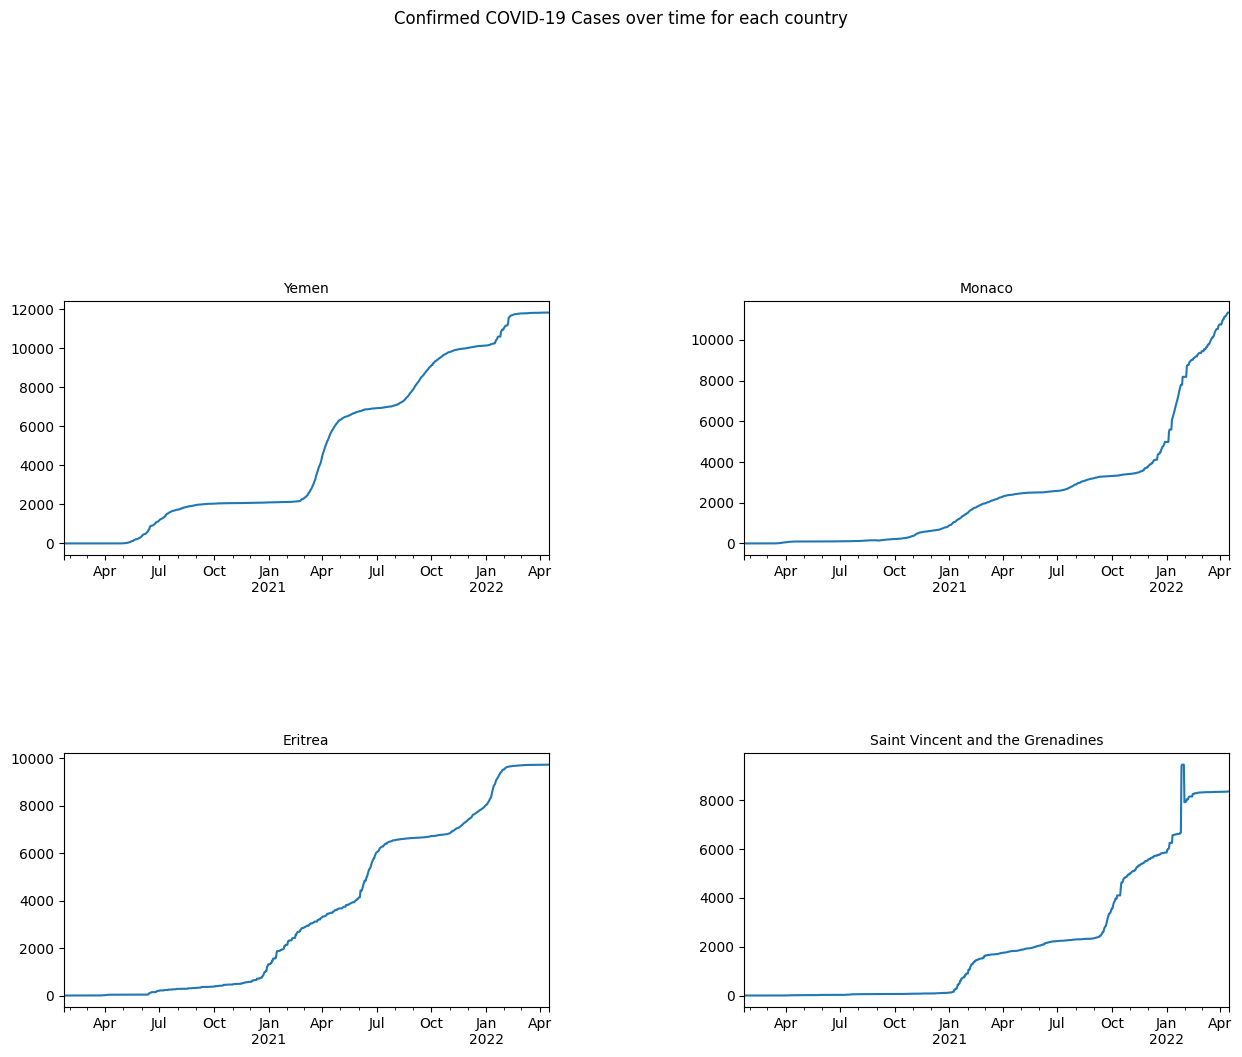

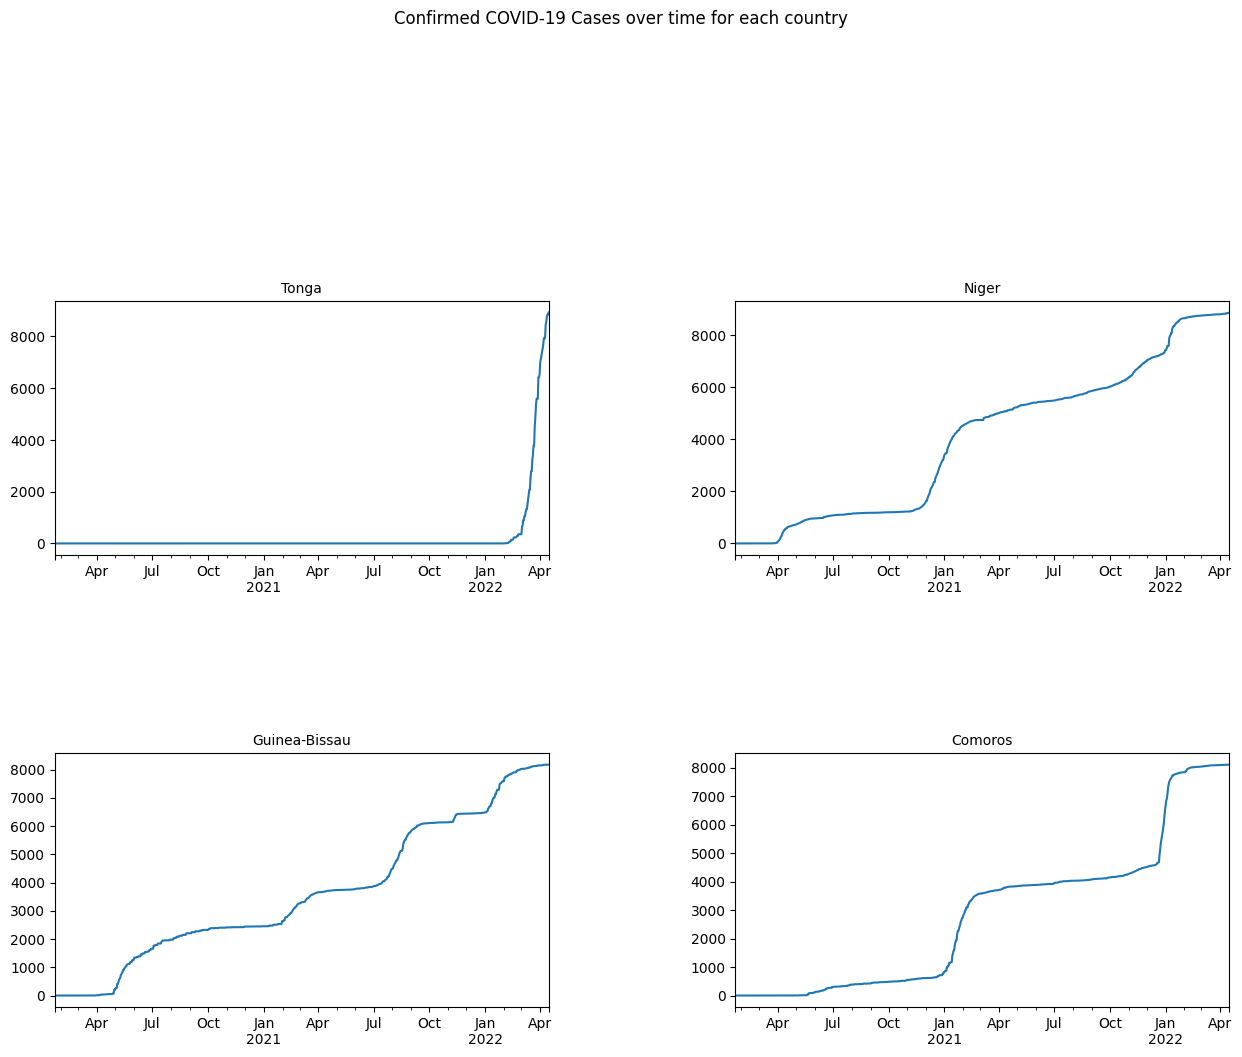

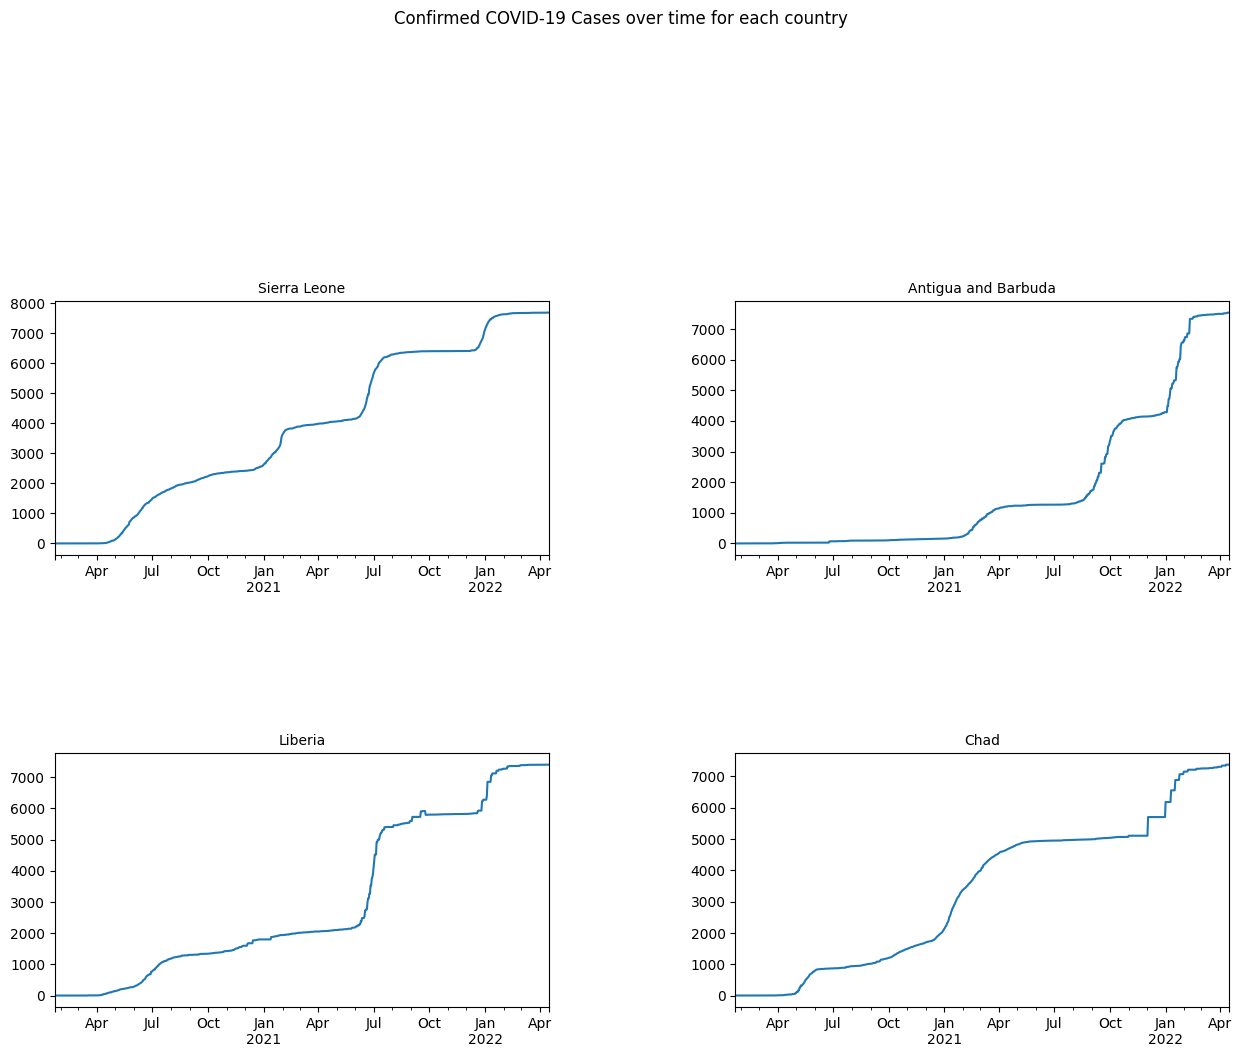

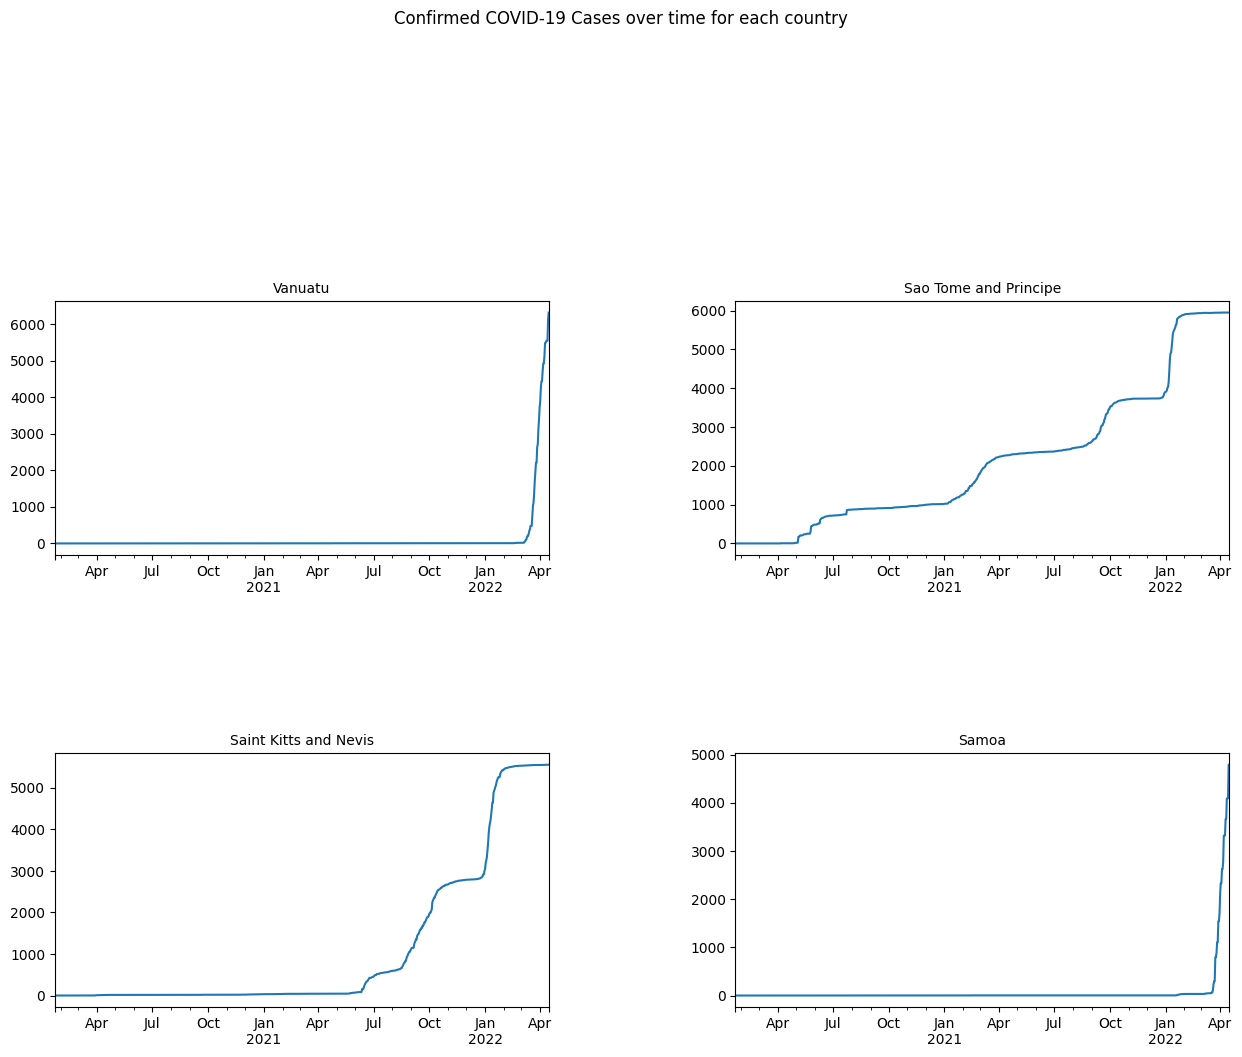

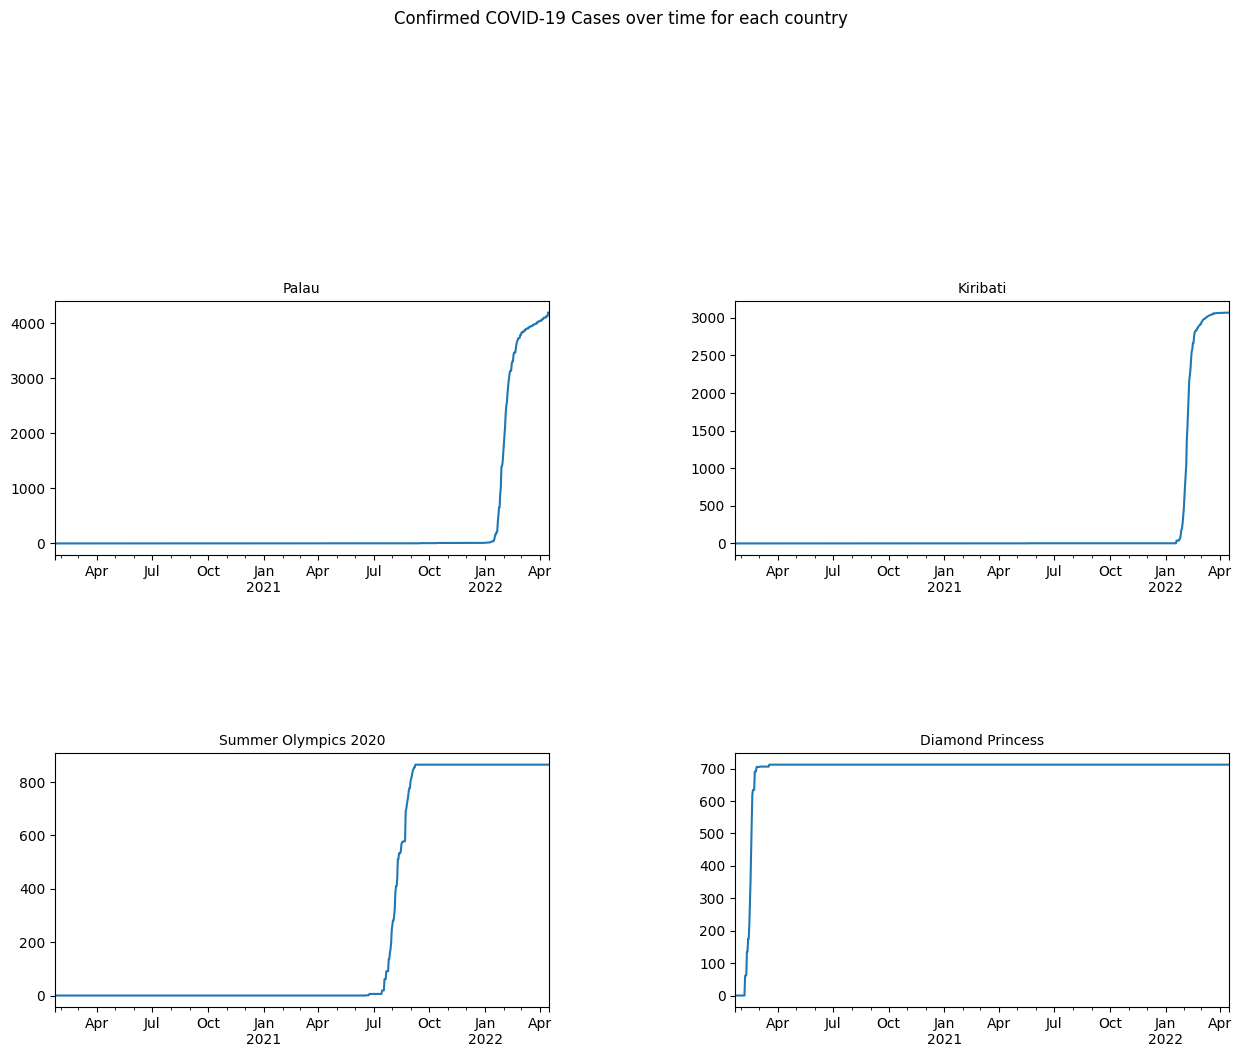

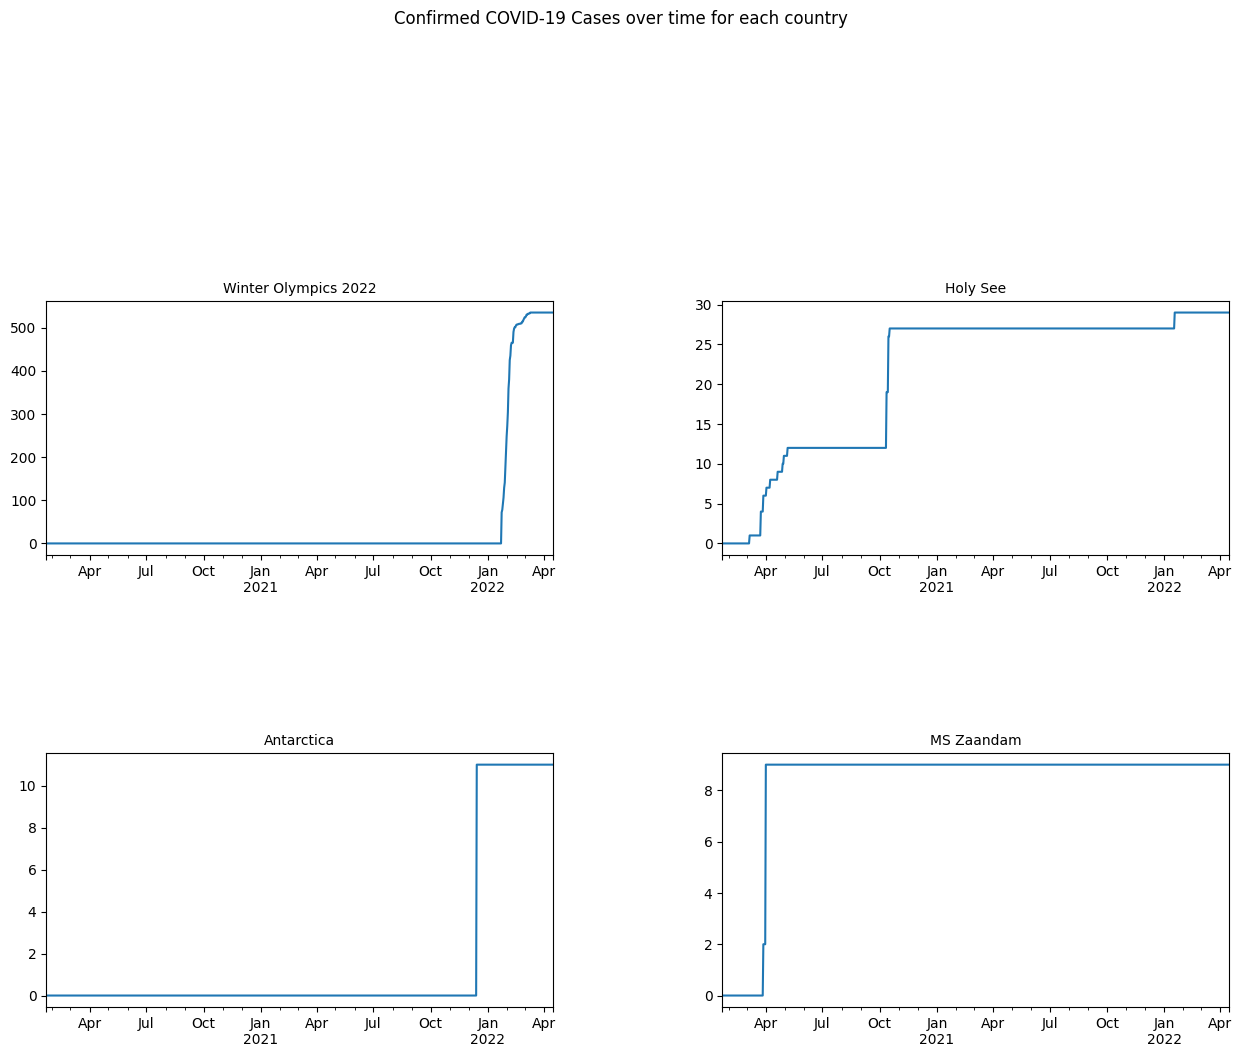

In [7]:
# Graph of number of confirmed cases over time for each country
countries = confirmed_cases.index.tolist()
covid19_graph = covid19_data_grouped['Confirmed']

x = 0
y = 4
for i in range(49):
  f = 1
  fig, ax = plt.subplots(figsize=(15, 12))
  for country in countries[x:y]:
    plt.subplot(2, 2, f)
    covid19_graph[country].plot()
    plt.suptitle('Confirmed COVID-19 Cases over time for each country')
    plt.title(country, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    fig.tight_layout(pad=10.0)
    f += 1
  x += 4
  y += 4

<ipython-input-8-1efe7628afad>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '2%', '4%', '6%', '8%'])


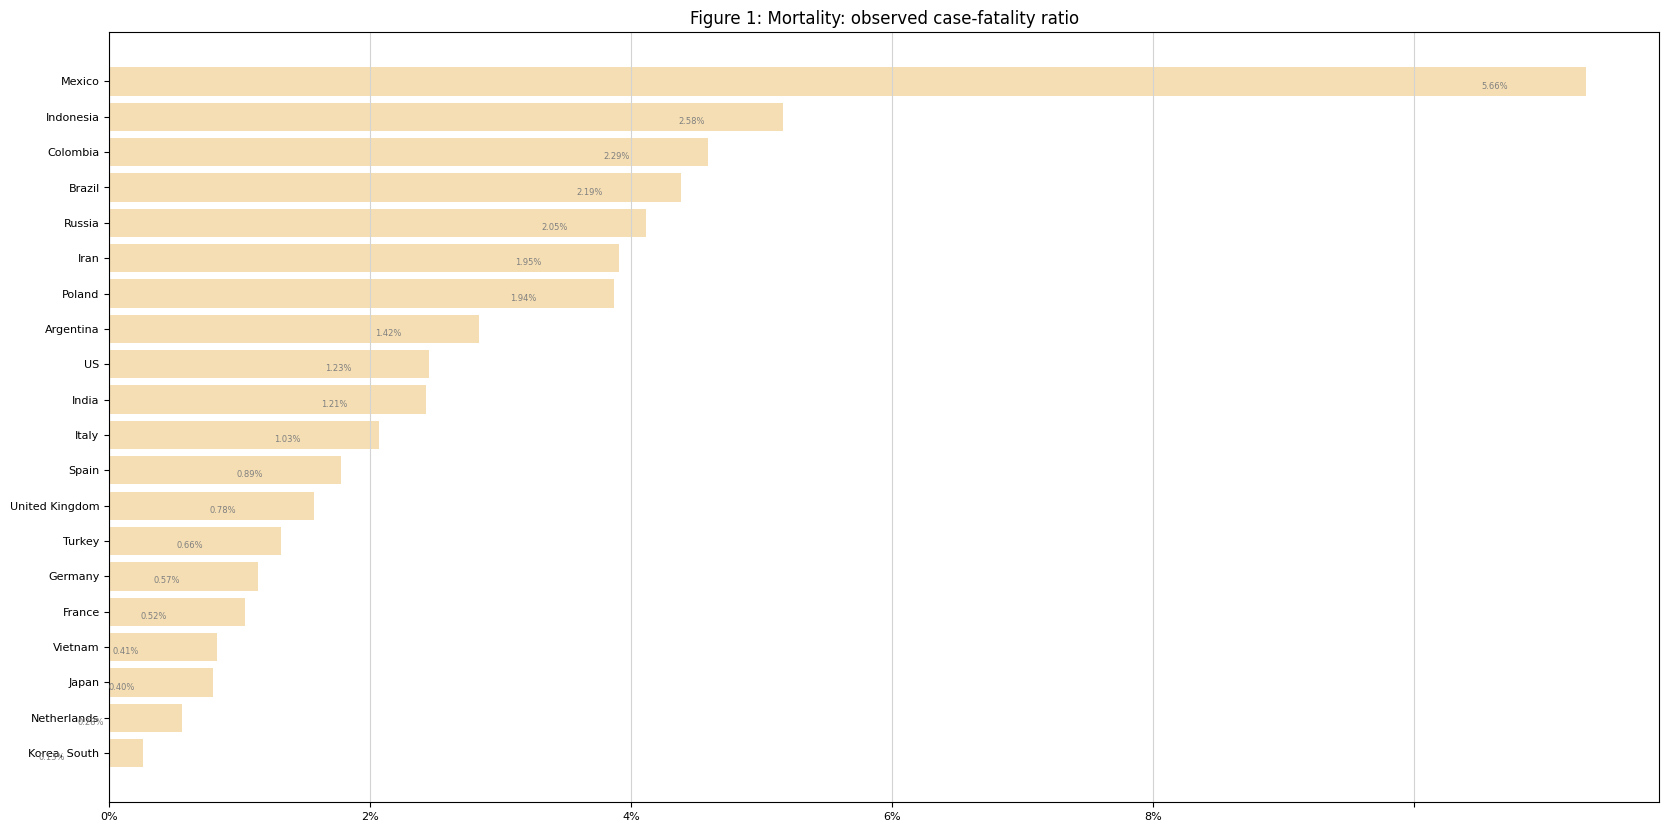

In [8]:
# Case fatality ratio for 20 most affected countries
top20_case_fatality = latest_day.nlargest(20, 'Confirmed')
top20_case_fatality['Case Fatality Ratio'] = (top20_case_fatality['Deaths'] / top20_case_fatality['Confirmed']) * 100
top20_case_fatality = top20_case_fatality.sort_values('Case Fatality Ratio')
top20_countries = top20_case_fatality.index.to_list()

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(top20_countries, top20_case_fatality['Case Fatality Ratio'], color='wheat')
plt.title('Figure 1: Mortality: observed case-fatality ratio')
plt.yticks(fontsize='8')
plt.xticks(fontsize='8')
plt.grid(axis='x', color='lightgray')
ax.set_xticklabels(['0%', '2%', '4%', '6%', '8%'])
for bar in ax.patches:
  plt.text(bar.get_width() - 0.4, bar.get_y() + 0.2,
           str(format(bar.get_width(), '.2f') + '%'),fontsize=6, color='gray')

In [9]:
# Ratio between total number of confirmed cases and population size of each country
population = pd.read_json('worldpopulation.json')
country_names = {'U.S.': 'US',
                 'U.K.': 'United Kingdom',
                 'Czechia': 'Czech Republic',
                 'Burma': 'Myanmar',
                 'Eswatini': 'Swaziland',
                 'Viet Nam': 'Vietnam',
                 'DR Congo': 'Congo (Kinshasa)',
                 'Myanmar': 'Burma',
                 'South Korea': 'Korea, South',
                 'Côte d\'Ivoire': 'Cote d\'Ivoire',
                 'Czech Republic': 'Czechia',
                 'Congo': 'Congo (Brazzaville)',
                 'TFYR Macedonia': 'North Macedonia',
                 'St. Vincent & Grenadines': 'Saint Vincent and the Grenadines'}

population.rename(columns={'country': 'Country/Region'}, inplace=True)
for country, value in country_names.items():
  population.loc[population['Country/Region'] == country, 'Country/Region'] = value

per_capita = pd.merge(confirmed_cases, population, how='left', left_index=True, right_on='Country/Region')
per_capita['Confirmed Cases Per Capita'] = per_capita['Confirmed'] / per_capita['population']

print('Top 10 countries with the highest number of confirmed COVID-19 cases per capita:')
print(per_capita.nlargest(10, 'Confirmed Cases Per Capita')[['Country/Region',
                                                             'Confirmed',
                                                             'population',
                                                             'Confirmed Cases Per Capita']])


Top 10 countries with the highest number of confirmed COVID-19 cases per capita:
      Country/Region  Confirmed  population  Confirmed Cases Per Capita
185.0        Andorra      40709     68728.0                    0.592320
111.0        Denmark    3143644   5711837.0                    0.550374
171.0        Iceland     183974    334303.0                    0.550321
190.0     San Marino      15874     32104.0                    0.494456
96.0          Israel    4029066   8323248.0                    0.484074
144.0       Slovenia     996832   2071252.0                    0.481270
65.0     Netherlands    8194946  17032845.0                    0.481126
169.0       Maldives     178320    375867.0                    0.474423
94.0         Austria    4045809   8592400.0                    0.470859
115.0       Slovakia    2505968   5432157.0                    0.461321


<ipython-input-10-71c72726b2fe>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(c)
<ipython-input-10-71c72726b2fe>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(c[:4])
<ipython-input-10-71c72726b2fe>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cases.corr(), square=True, annot=True, ax=ax3)
<ipython-input-10-71c72726b2fe>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(c)
<ipython-input-10-71c72726b2fe>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

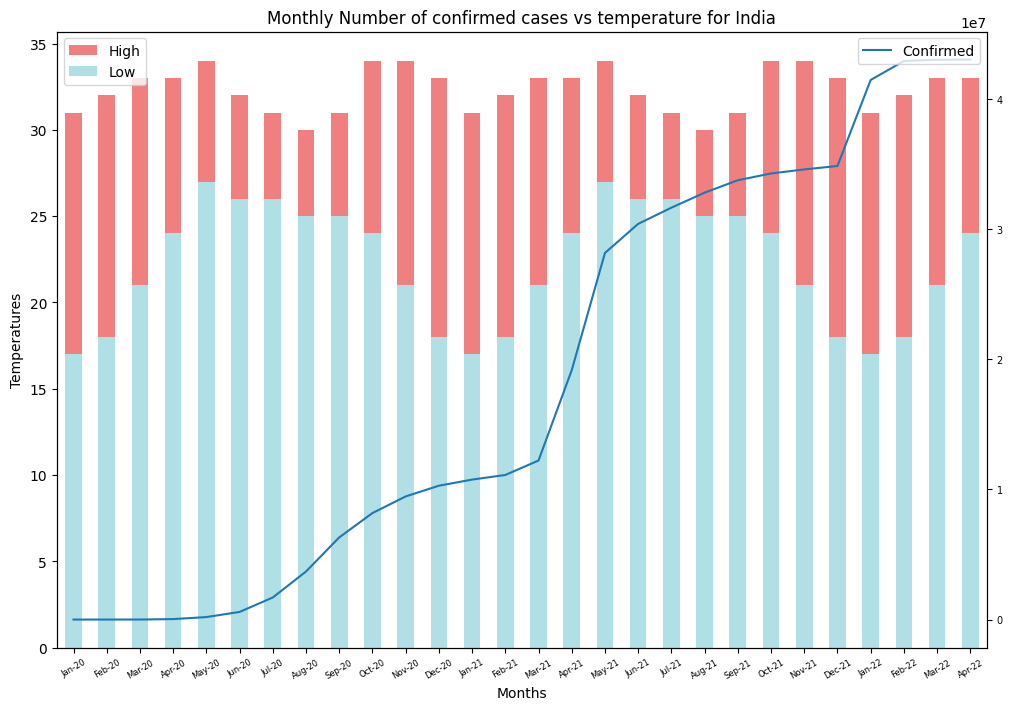

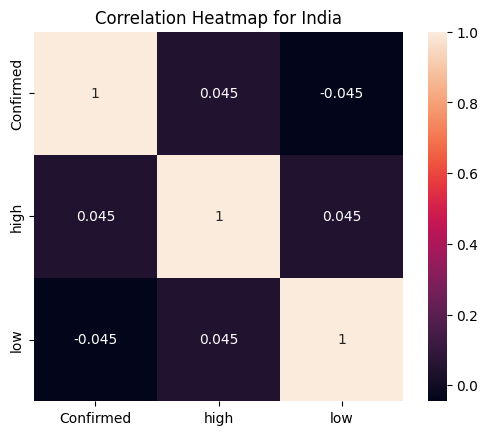

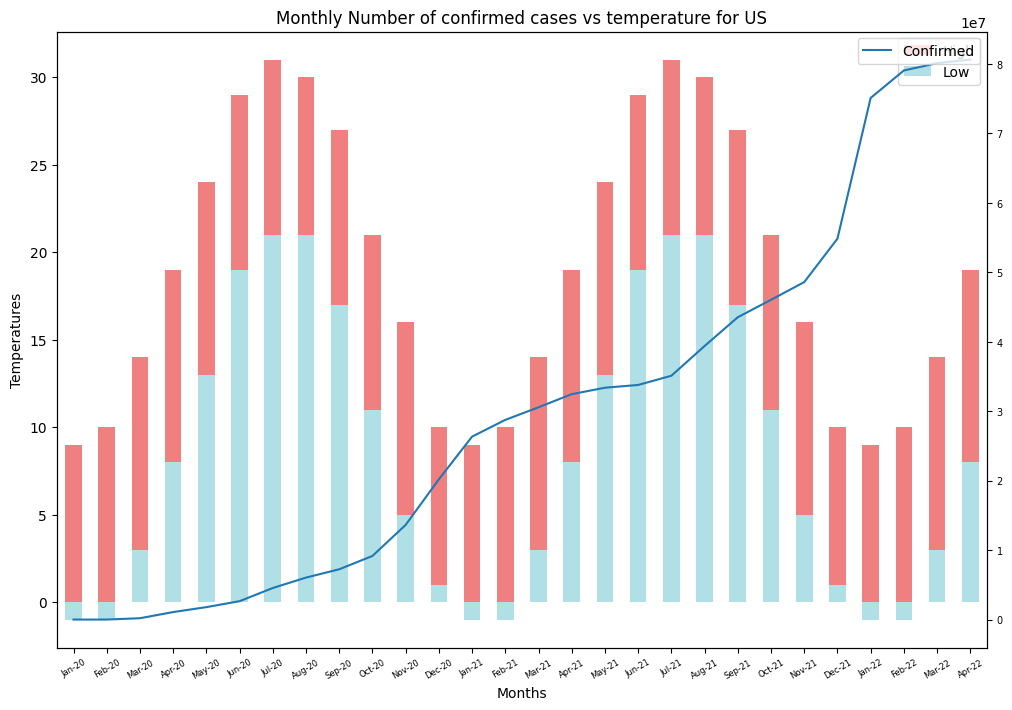

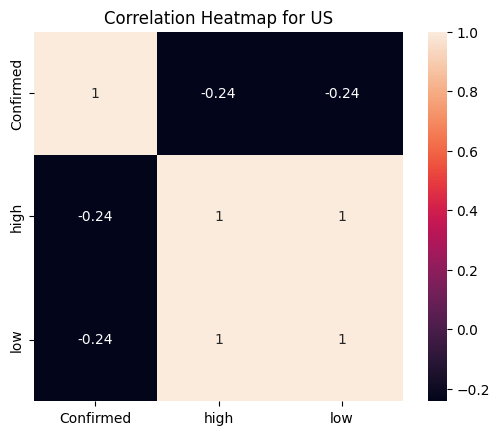

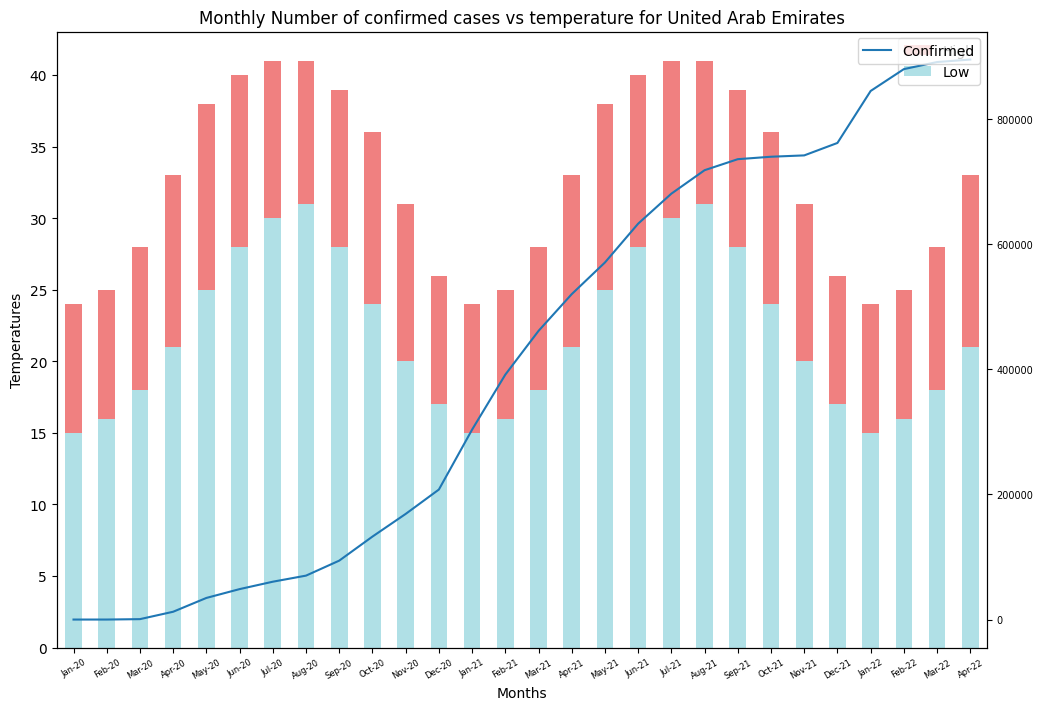

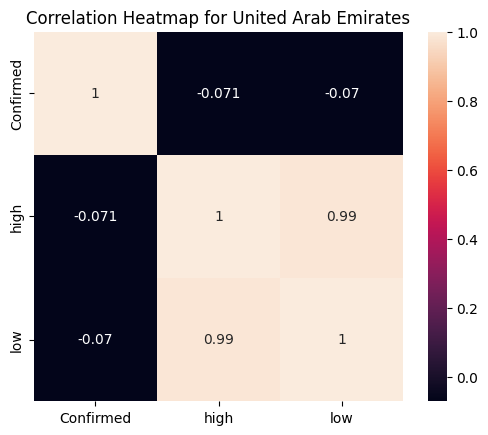

In [10]:
# Testing the correlation between temperatures and confirmed cases
with open('climate.json', 'r') as f:
  data = json.loads(f.read())
climate = pd.json_normalize(data, record_path=['monthlyAvg'], meta=['city', 'country'])
climate.loc[climate['country'] == 'United States', 'country'] = 'US'

countries_temp = ['India', 'US', 'United Arab Emirates']
cities_temp = ['Mumbai', 'Washington DC', 'Dubai']

for i, country in enumerate(countries_temp):
  c = climate.loc[(climate['country'] == country) & (climate['city'] == cities_temp[i])]
  c = c.append(c)
  c = c.append(c[:4])
  c = c.reset_index()
  cases = covid19_data_grouped.loc[country].groupby(pd.Grouper(freq='1M'))['Confirmed'].max().to_frame()
  months = pd.date_range('2020-01-01', '2022-04-30', freq='MS').strftime("%b-%y").tolist()
  cases['high'] = list(c['high'])
  cases['low'] = list(c['low'])
  cases['Months'] = list(months)
  fig1, ax1 = plt.subplots(figsize=(12, 8))
  cases.plot(kind='bar', x='Months', y='high', color='lightcoral', ax=ax1, label='High')
  cases.plot(kind='bar', x='Months', y='low', color='powderblue', ax=ax1, label='Low')
  plt.xticks(fontsize=6, rotation=30)
  plt.yticks(fontsize=10)
  plt.xlabel('Months', fontsize=10)
  plt.ylabel('Temperatures', fontsize=10)
  plt.title(f'Monthly Number of confirmed cases vs temperature for {country}')
  ax2 = ax1.twinx()
  cases.plot(kind='line', x='Months', y='Confirmed', ax=ax2, label='Confirmed')
  plt.yticks(fontsize=7)
  plt.legend(loc='upper right')
  fig2, ax3 = plt.subplots()
  sns.heatmap(cases.corr(), square=True, annot=True, ax=ax3)
  ax3.set_title(f'Correlation Heatmap for {country}')

            Confirmed  Recovered  Deaths
Date                                    
2022-04-07     1109.0        0.0    43.0
2022-04-08     1150.0        0.0    83.0
2022-04-09     1054.0        0.0    29.0
2022-04-10      861.0        0.0     6.0
2022-04-11      796.0        0.0    19.0
2022-04-12     1088.0        0.0    26.0
2022-04-13     1007.0        0.0     1.0
2022-04-14      949.0        0.0     6.0
2022-04-15      975.0        0.0     4.0
2022-04-16     1150.0        0.0     4.0


<ipython-input-11-e2cf208640ea>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-11-e2cf208640ea>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-11-e2cf208640ea>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-11-e2cf208640ea>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, f)
<ipython-input-11-e2cf208640ea>:15: MatplotlibDeprecationWarning: Auto-remov

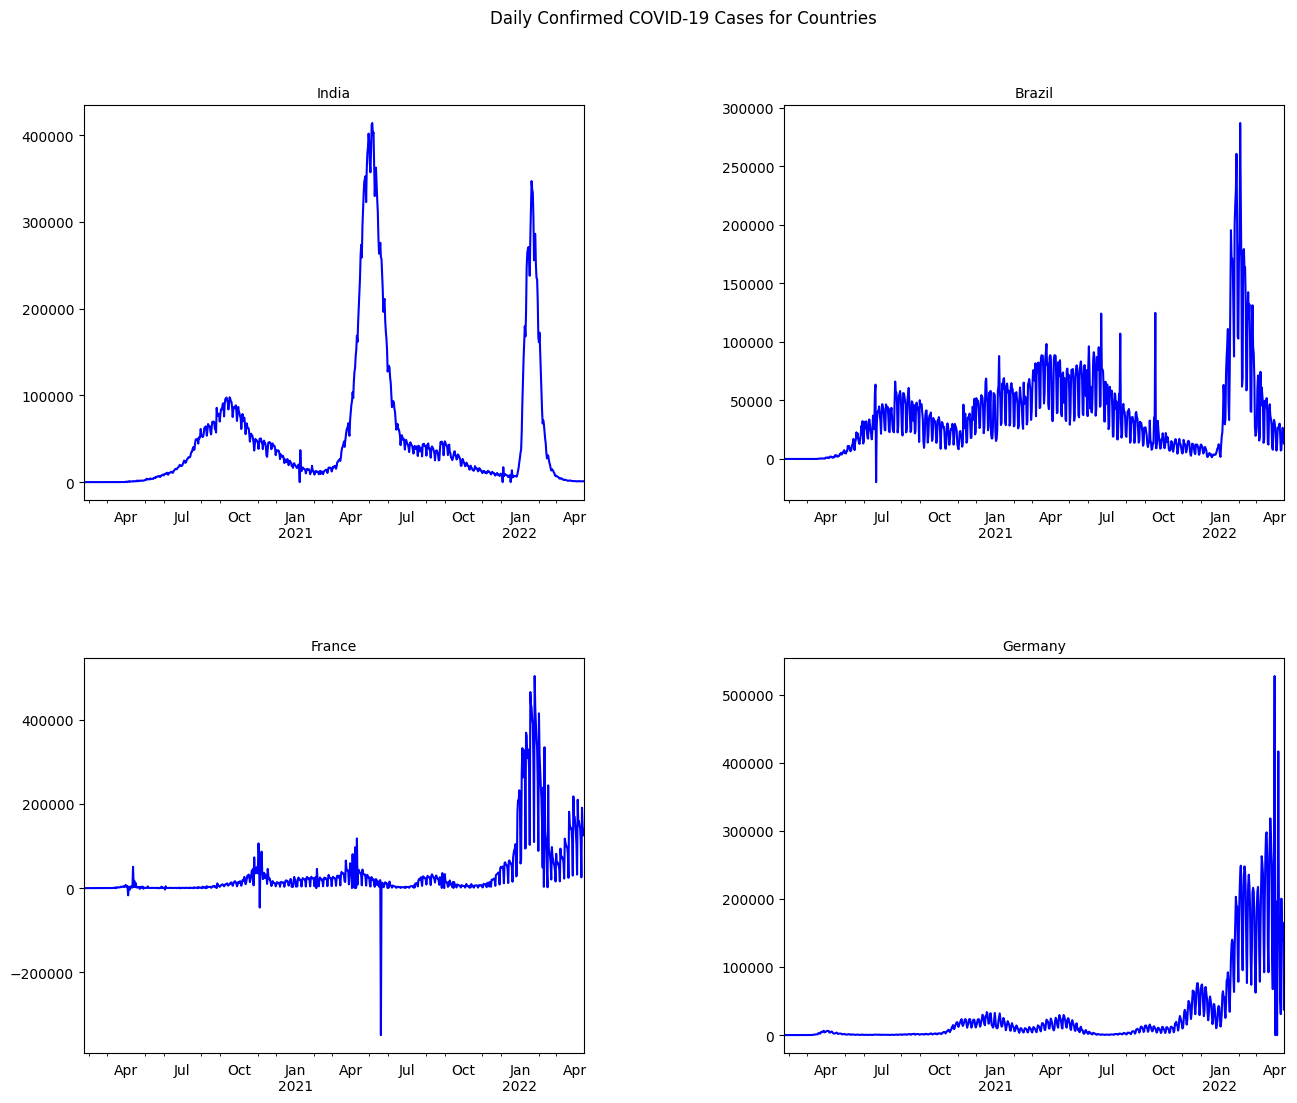

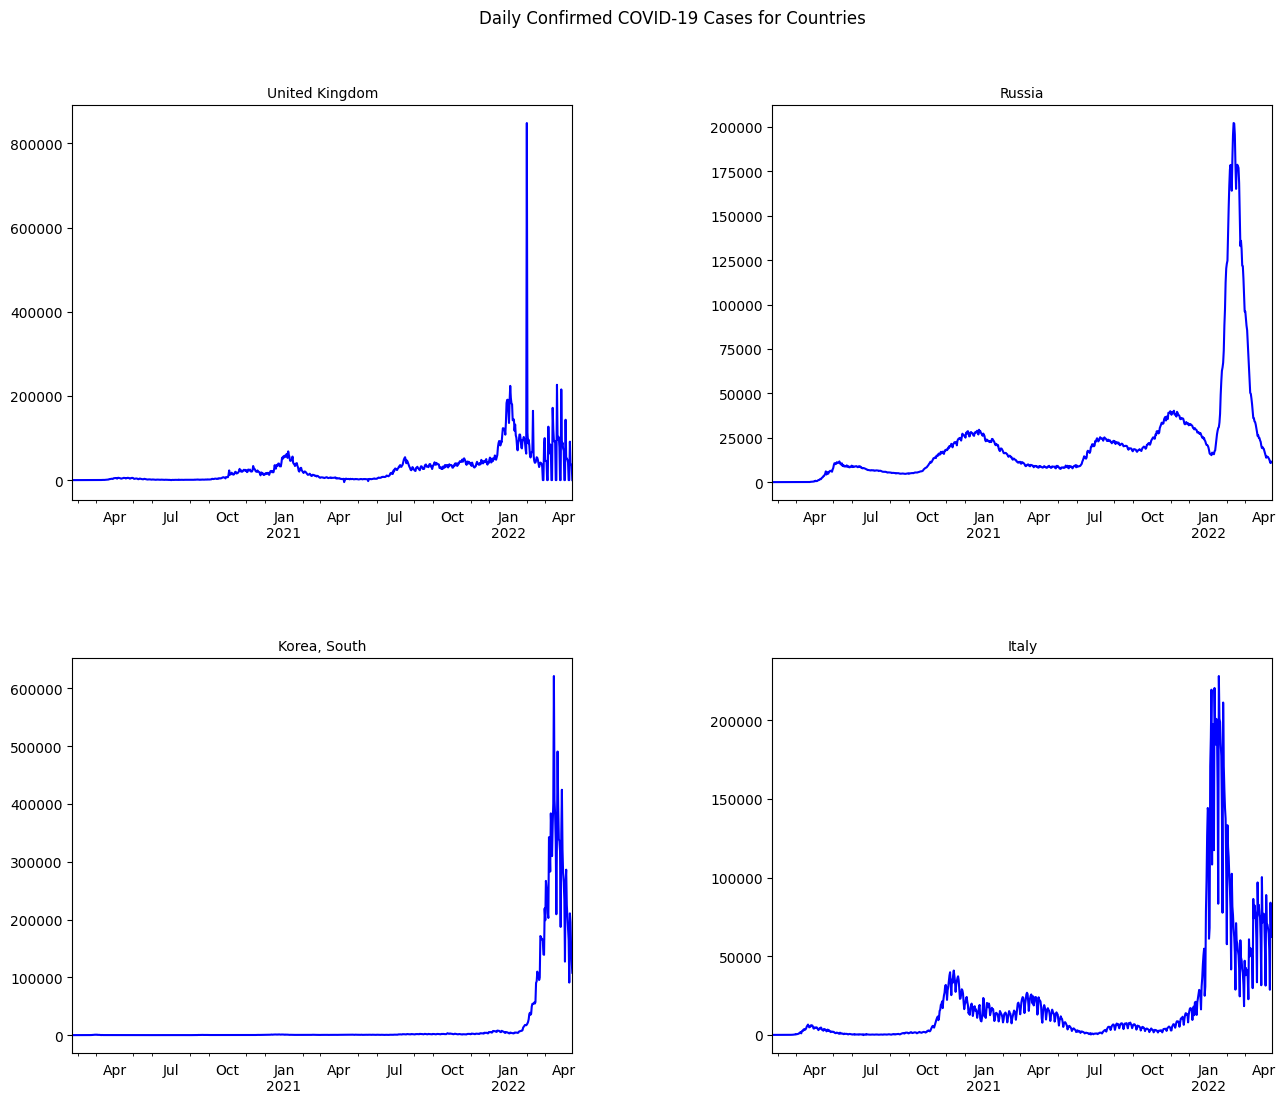

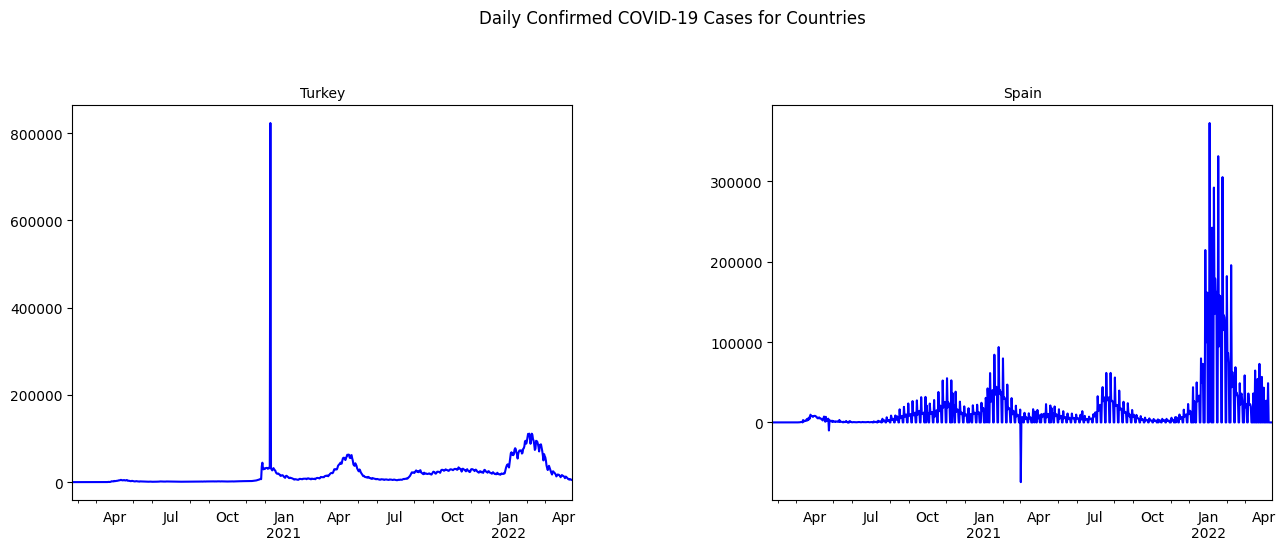

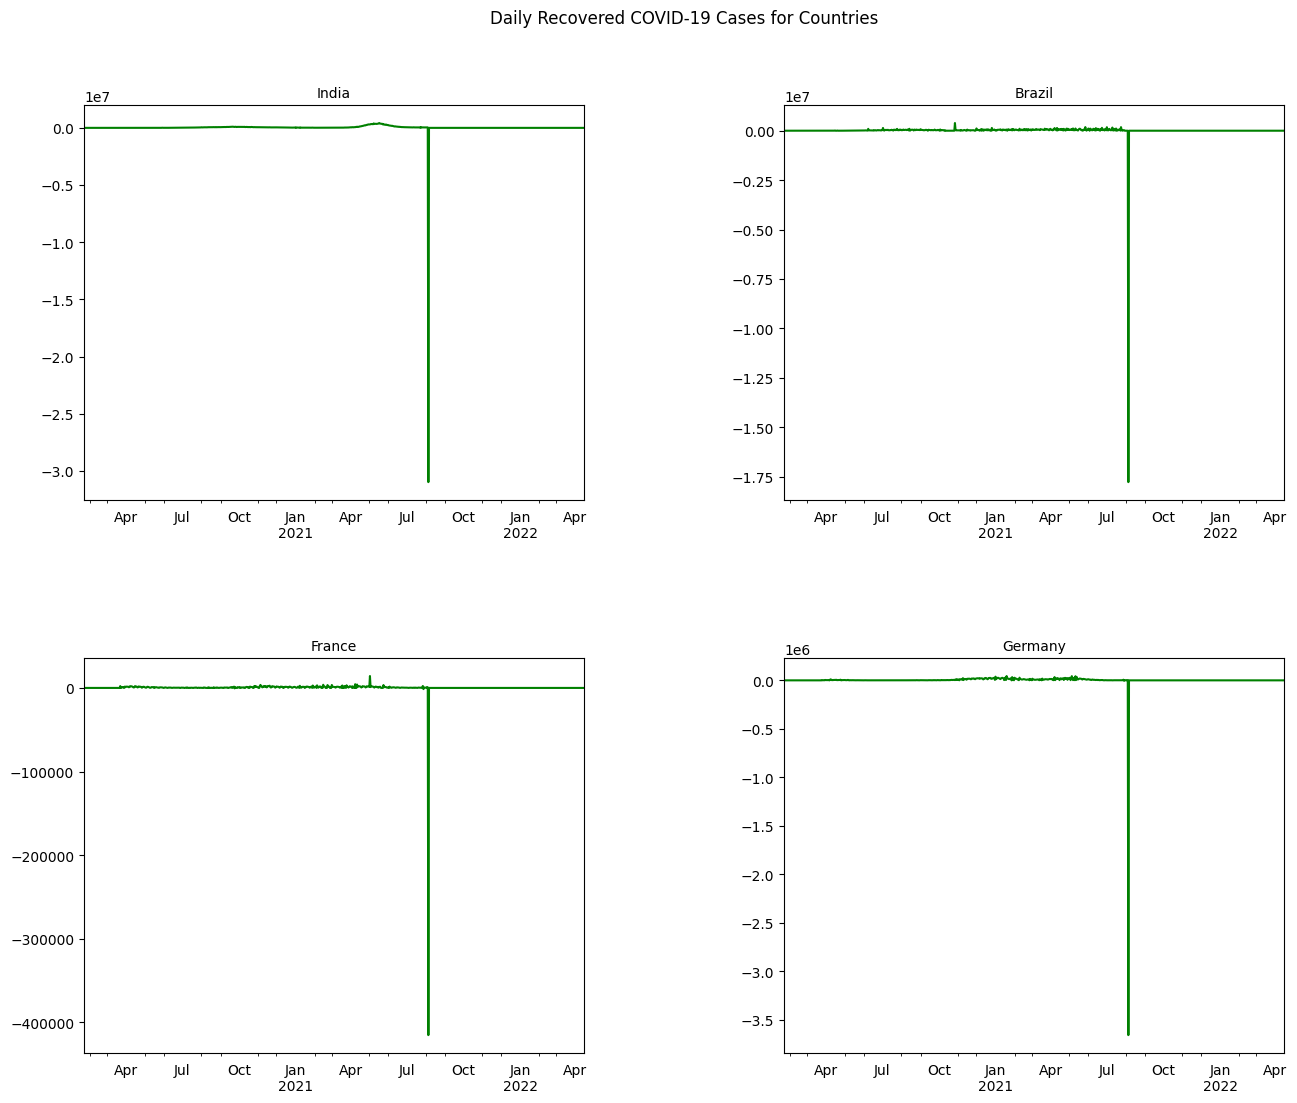

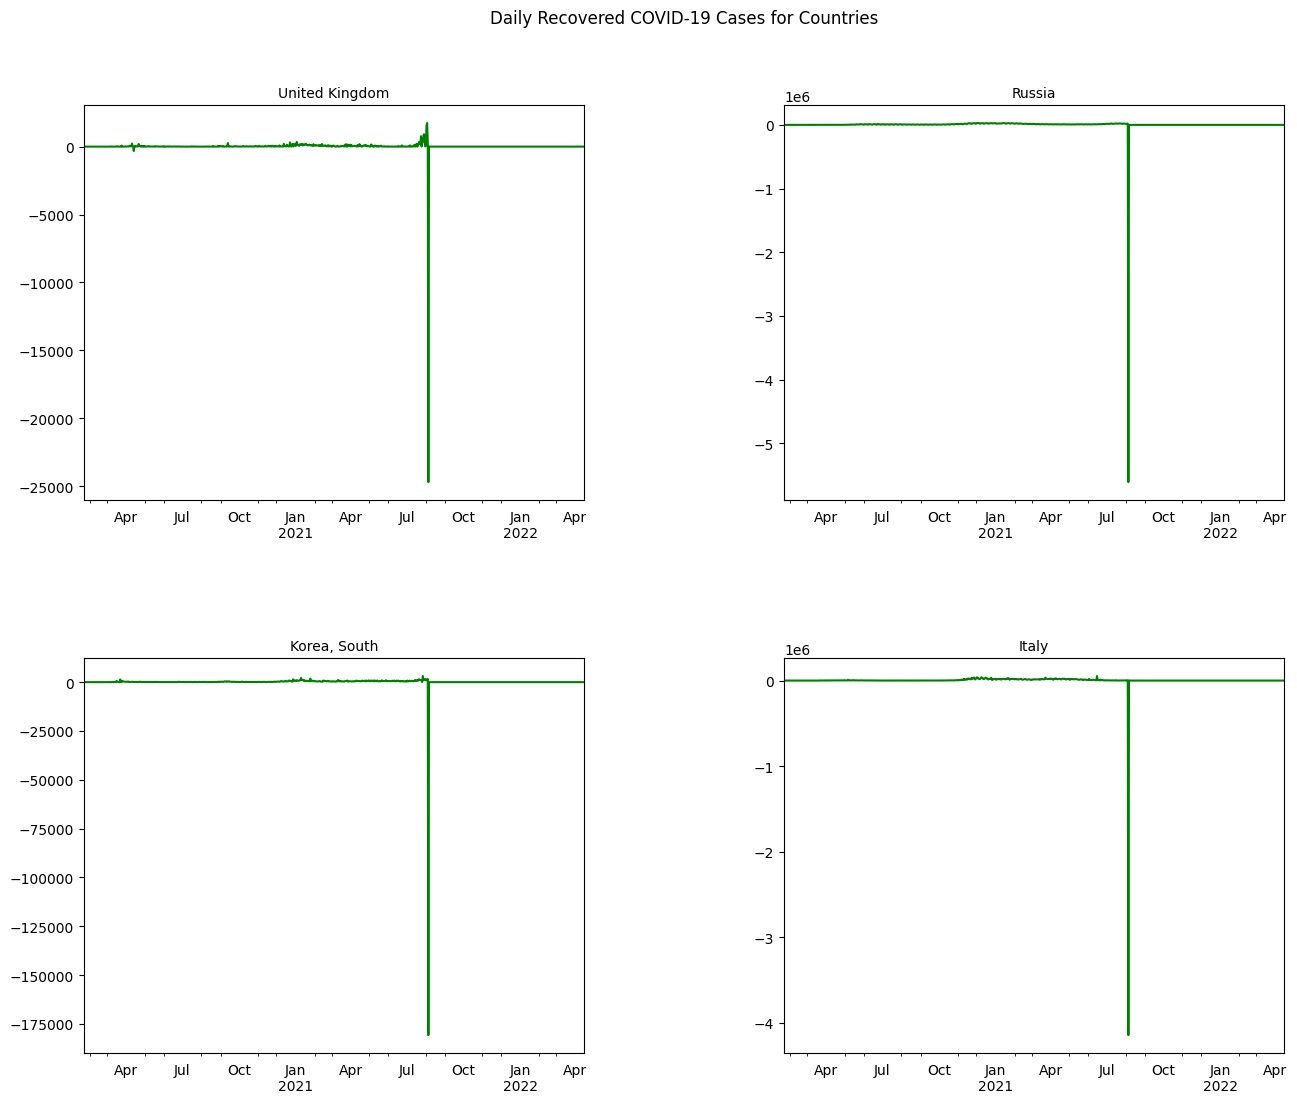

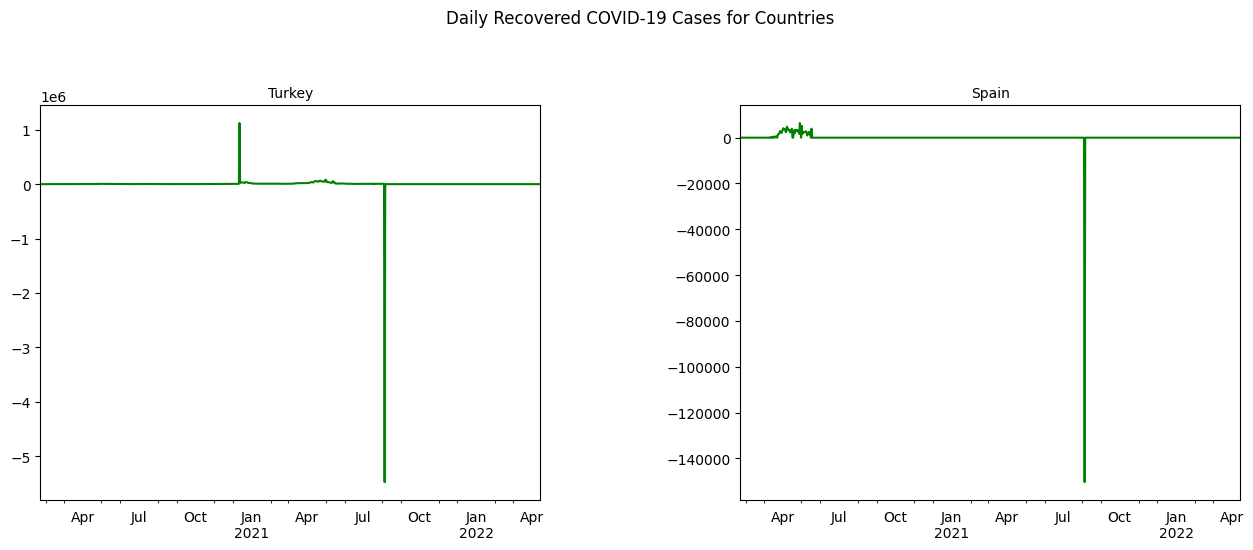

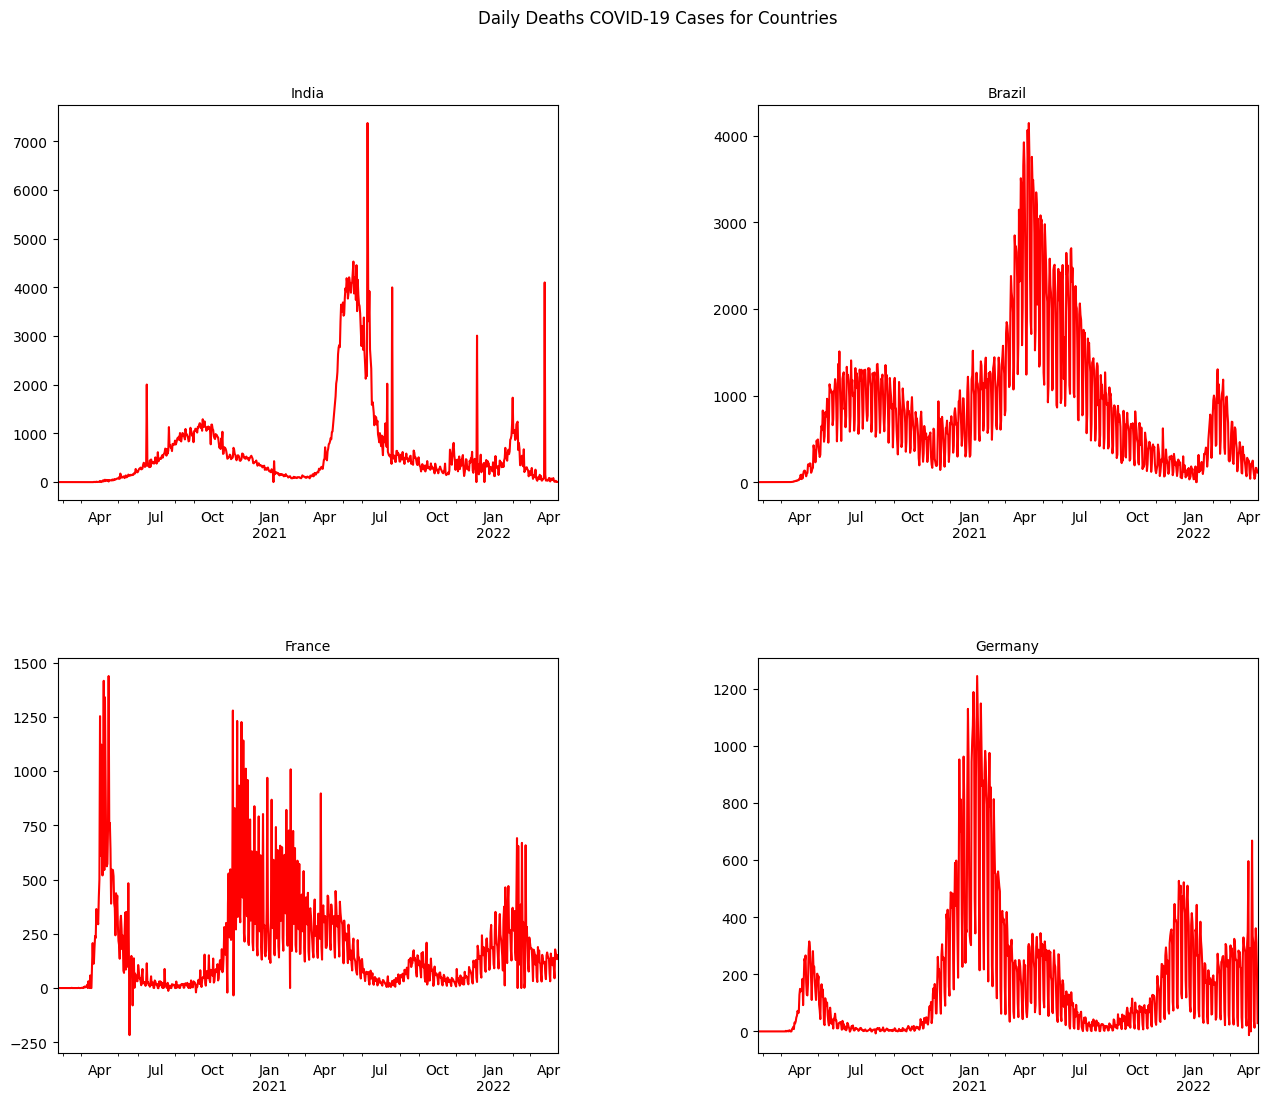

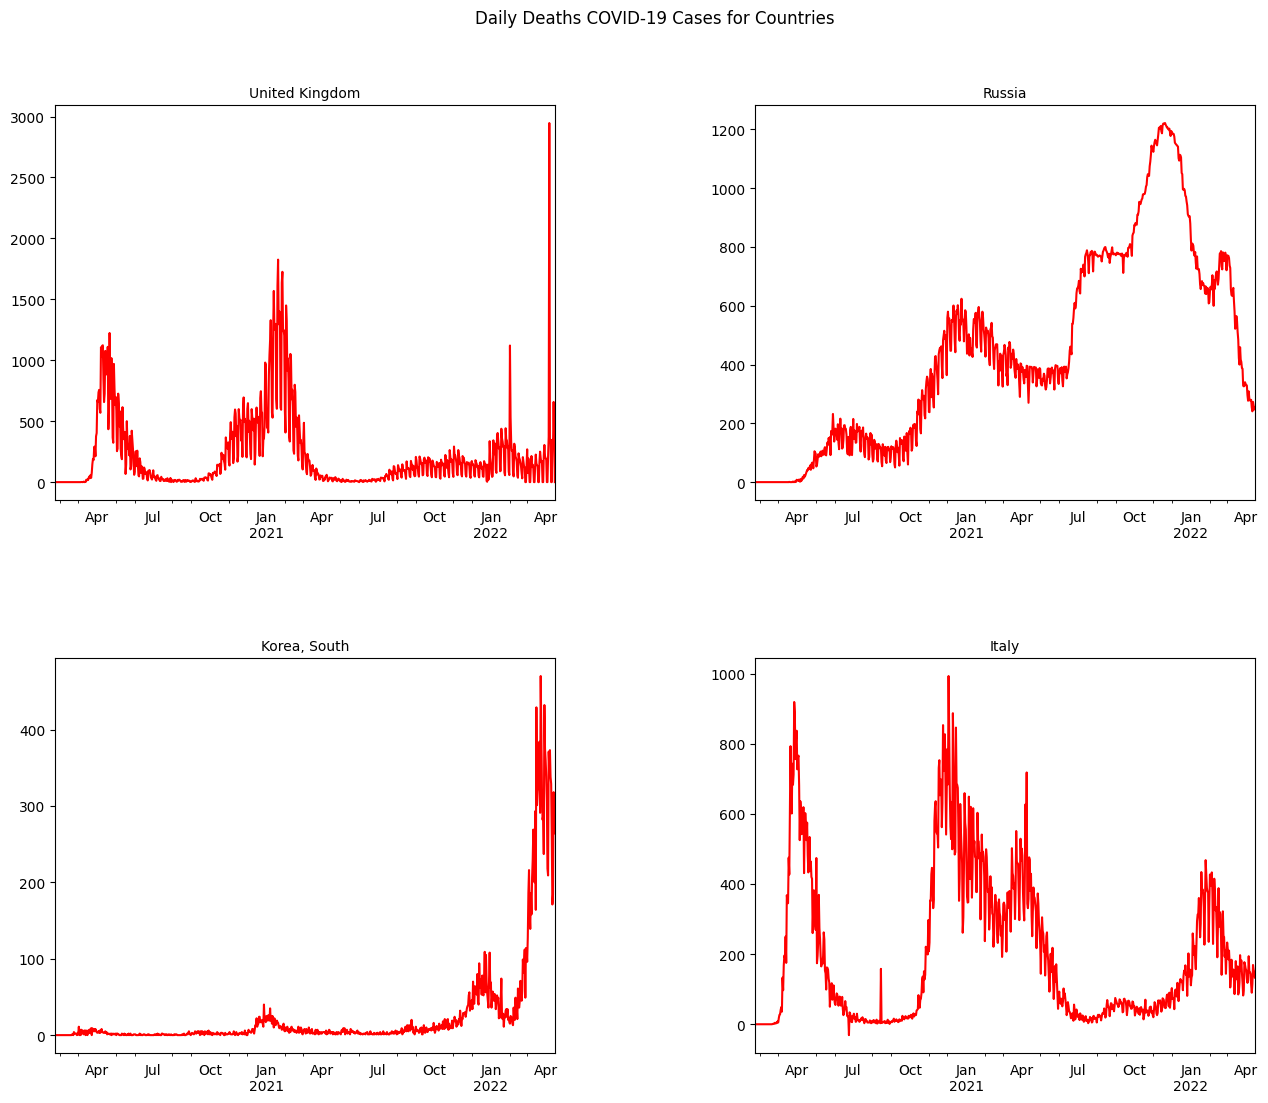

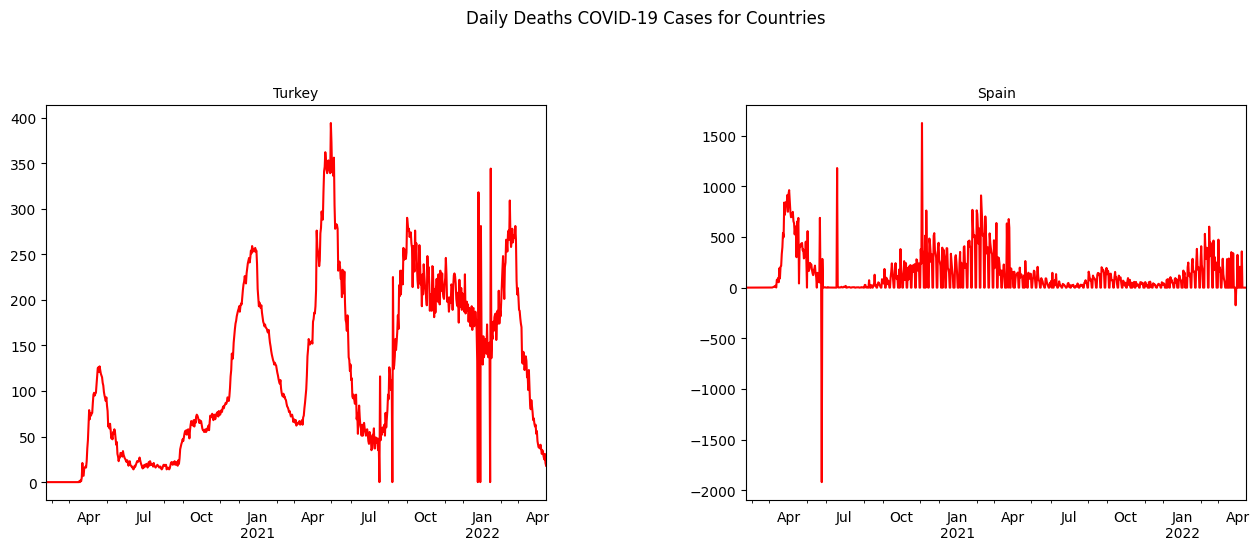

In [11]:
# Trends of confirmed and recovered cases as well deaths for a few countries
top10_countries = countries[1:11]
metrics = ['Confirmed', 'Recovered', 'Deaths']
colors = {'Confirmed': 'b', 'Recovered': 'g', 'Deaths': 'r'}
print(covid19_data_grouped.diff().loc['India'][-10:])

# Plotting the graphs for daily confirmed, recovered and deaths for a few countries
for m in metrics:
  x = 0
  y = 4
  for i in range(3):
    f = 1
    fig4, ax4 = plt.subplots(figsize=(15, 12))
    for country in top10_countries[x:y]:
      plt.subplot(2, 2, f)
      covid19_data_grouped.diff().loc[country][m][1:-1].plot(color=colors[m])
      fig4.suptitle(f'Daily {m} COVID-19 Cases for Countries')
      plt.title(country, fontsize=10)
      plt.xticks(fontsize=10)
      plt.tick_params(bottom=False)
      plt.yticks(fontsize=10)
      plt.xlabel('')
      plt.subplots_adjust(left=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
      f += 1
    x += 4
    y += 4

plt.show()